# TA Instructions

Hello! Welcome to Team 11's report. The checkpoints are labeled as such in the headers to make it easier for you to run, but everything has been commented out that is not necessary. The data access information is available in the "Data" section, and all dependencies / necessary downloads are show in code.  

An uncommented version is available at: https://colab.research.google.com/drive/1F3eBXWQ6stkkQPVzLg1ktKFqbhXbxbRZ?usp=share_link

Our github repo can be accessed here: https://github.com/LoganB99/DL4H-SP24-Local-Explanations-For-Cervical-Cancer


Our video overview can be accessed here: https://drive.google.com/file/d/1VbnpcCaYxyATlkzQZPA5bLop64rc6XSg/view?usp=sharing

# Mount Notebook to Google Drive

---


To clear up clutter, the original FAQ and Attentions are in https://colab.research.google.com/drive/1MGxB_J2TvhAANcQG8VNMvQp1QdQrcxWb?authuser=1

In [1]:
# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
# #Testing
# !pip install gspread google-auth
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)

# Introduction

*   Background of the problem
  
  Cervical Cancer prediction is a prevalent and necessary problem within today's healthcare system. Specifcally, researchers are working towards identifying risk factors and potential causes for cervical cancer. Current models, however, cannot explain why a decision is made. Local explainability techniques have been developed aiming to the causes and effects of changes within a model and explain the decision-making process at an individual prediction level, but may not be applicable in every scenario, and the explanations are not always consistent or faithful. Consequently, clinicians cannot explain why a model selected a patient as low or high risk through black-box magic models.
*   Paper explanation

  The paper aims to combat the current problem of ambiguity in explainability across scenarios and analyze the existing local interpretability methods to propose methods to help clinicians determine which type of explanation models to use in a given context. Specifically, the researchers tested 5 different ML algorithms to identify the model with the highest disease predition accuracy, and then applied explainability methods to the model to identify the best practice for disease prediction. The paper then uses the predictions of the best model to generate explanations for each model across popular interpretability methods. These methods include LIME, SHAP, Diverse Counterfactual Explanations, Tree Interpreter, and Local Surrogates. Finally, each of the interpretability methods are evaluated on a set of metrics. The model found that LIME is the most robust explainability method, but no single explaination performance optimally across all metrics. Therefore, the researches suggest that clinicians should choose a method based on the setting or choose a weighted sum of metrics. This approach helps satisfy the desired explainability properties when determining patient risk in cervical cancer. As a result, the paper also recommends and influences future models to consider interpetability methods in their analysis to improve trust in the new world of generative and predictive models.


# Scope of Reproducibility:

We aim to reproduce the results of the model using the UCI dataset and suggested models. We will use ADASYN to balance the dataset and remove and retrain features as one of our ablations. As another ablation, we want to test the model on the unbalanced dataset.

1.   Hypothesis 1: Random Forest is the most performing model in predicting cervical cancer in terms of AUC.
2.   Hypothesis 2: LIME is the most robust explainability model shown by the ROAR (remove and retrain) faithfulness metric.



# Methodology


Python version in notebook: 3.10.12

## Checkpoint: Dependencies

Note: because of conflicting pandas versions, please cancel/ignore any warnings. the code will still run.

In [3]:
# # External package installation
# !pip install pandas
# !pip install kaleido
# !pip install gdown==4.6.0
# !pip install shap
# !pip install lime
# !pip install interpret-community
# !pip install alibi
# !pip install treeinterpreter
# !pip install SALib
# !pip install dice-ml
# !pip install pip install spectralcluster
# !pip install kaleido
# !pip install requests
# !pip install scikit-learn==1.2.2
!pip install pandas kaleido gdown==4.6.0 shap lime interpret-community alibi treeinterpreter SALib dice-ml spectralcluster requests scikit-learn==1.2.2


  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached shap-0.44.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (533 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: shap
    Found existing installation: shap 0.45.0
    Uninstalling shap-0.45.0:
      Successfully uninstalled shap-0.45.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 

In [4]:
# import sklearn
# print(sklearn.__version__)
# print(sklearn.__version__)

In [5]:
# download files and models
import gdown
import pickle
import requests

# Basic data handling and scientific computing
import numpy as np  # Numerical computing library
import pandas as pd  # Data manipulation and analysis
import random
from numpy import arange


# Visualization libraries
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Basic plotting library
import plotly.express as px  # Interactive plotting library
import plotly.graph_objects as go  # For creating custom plots with Plotly
from plotly.subplots import make_subplots  # For creating subplots with Plotly

# Data preprocessing and model evaluation tools
from sklearn.impute import SimpleImputer  # For handling missing data
from sklearn.model_selection import StratifiedShuffleSplit  # For creating stratified splits
from sklearn.preprocessing import RobustScaler, StandardScaler  # Data scaling methods
from sklearn.decomposition import PCA  # Principal Component Analysis
from sklearn.pipeline import Pipeline  # For creating modeling pipelines
from sklearn.metrics import accuracy_score, confusion_matrix  # Model evaluation metrics
from sklearn.metrics import precision_recall_fscore_support  # Precision, recall, and F1 score
from sklearn.metrics import roc_auc_score # AUC score

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Ensemble models
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors model
from sklearn.svm import SVC  # Support Vector Machine model
from sklearn.neural_network import MLPClassifier

# Model selection and hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning

# Data balancing techniques
from imblearn.over_sampling import SMOTE, ADASYN  # Over-sampling techniques
from imblearn.over_sampling import RandomOverSampler  # Random over-sampling

# Additional utilities
from typing import List  # For type hints
from google.colab import drive  # Google Colab drive integration (if using Google Colab)
import warnings  # For controlling warning messages
warnings.filterwarnings('ignore')  # Suppress warning messages for cleaner output
# Plotly setup for notebooks
from plotly.offline import plot, iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# Local explainability
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from interpret_community.mimic.mimic_explainer import MimicExplainer
from interpret_community.mimic.models import LinearExplainableModel
from interpret.blackbox import MorrisSensitivity
import shap
import lime
from lime import lime_tabular
from treeinterpreter import treeinterpreter as ti


Checkpoint: Project Files

In [6]:

gdown.download(id='16b5PkipuAA9zuzGvyWBSlu7VDlEaGD8g', output="project_files2.tgz")
!tar -xzf project_files2.tgz 2>/dev/null

Downloading...
From: https://drive.google.com/uc?id=16b5PkipuAA9zuzGvyWBSlu7VDlEaGD8g
To: /content/project_files2.tgz
100%|██████████| 10.3M/10.3M [00:00<00:00, 55.3MB/s]


In [7]:
root = 'DL4H_Sp24_Final_Project'

##  Data


The raw dataset comes and can be downloaded from from UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors

Fernandes,Kelwin, Cardoso,Jaime, and Fernandes,Jessica. (2017). Cervical Cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset contains demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values represented as '?').

The missing values certainly make some of the columns less accurate. Time since STD Diagnosis is largely unknown, followed by presence of an IUD. So there is not a perfect correlation to be determined for every feature.

We load the raw data, place it in our project directory, and display statistics, showing how many patients are without cancer and with cancer. We display the number of unknowns before we clean our data.

To clean and process the data, we convert numerical 'object' columns to integers. We replace '?'s with the median of that column. We rerun the overall statistics to confirm there are no "unknown" values and the number of cancer patients remained the same. We create a new age_category column that stratifies the ages.

We run statistics on the age category to gain context. For example, we can see things like just over 2% of the dataset is diagnosed with cancer, but 44% of those diagnosed with cancer are in their 30's, and 20% of patients who are in their 50's have cancer. (We must remember the dataset is small, which is why we sample using ADASYN). There are only 4 patients 70 or older, and they all happen to not have cancer. This does not mean age is not important.

### Processing and Statistics

#### Checkpoint: Load Data Function

In [8]:
def load_data(data_dir):
  # implement this function to load raw data to dataframe/numpy array/tensor
    return pd.read_csv(data_dir, delimiter=',', encoding='utf-8')

#### Checkpoint: Load Raw Data

In [9]:
# root = '/content/drive/My Drive/DL4H_Sp24_Final_Project/'
# # dir and function to load raw data
# have_access = True


# try:
#   data_dir = '/content/drive/My Drive/DL4H_Sp24_Final_Project/risk_factors_cervical_cancer.csv'
#   raw_risk_factor_df = load_data(data_dir)
#   have_access = True
# except:
have_access = False
data_dir = 'risk_factors_cervical_cancer.csv'
# gdown.download('https://drive.google.com/file/d/13Co6aIxBU4KXMNH56TDyQd70pkk_b4l2/view?usp=sharing', data_dir, format='csv', fuzzy=True,quiet=True)
raw_risk_factor_df = load_data('DL4H_Sp24_Final_Project/risk_factors_cervical_cancer.csv')
# https://drive.google.com/drive/folders/1AUr8BgW16UU-7XjFf8O77XAgjA27gISV?usp=sharing
raw_risk_factor_df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
0                                  ?                               ?   
1                                  ?                               ?   
2                                  ?                               ?   
3                                  ?                               ?   
4                                  ?                               ?   
..                               ...                             ...   
853                                ?                               ?   
854                                ?                               ?   
855                                ?                               ?   
856                                ?                               ?   
857                                ?                               ?   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0           0      0      0  0          0        0        0      0  
1           0      0      0  0          0        0        0      0  
2           0      0      0  0          0        0        0      0  
3           1      0      1  0          0        0        0      0  
4           0      0      0  0          0        0        0      0  
..        ...    ...    ... ..        ...      ...      ...    ...  
853         0      0      0  0          0        0        0      0  
854         0      0      0  0          0        0        0      0  
855         0      0      0  0          0        0        1      0  

#### Checkpoint: Define Statistics methods

In [10]:
# calculate dataset statistics
def calculate_dataset_stats(df):
  print(len(df), " total patients")
  print(df['Dx:Cancer'].value_counts()[0], " patients without Cancer")
  print(df['Dx:Cancer'].value_counts()[1], " patients with Cancer")
  print(df.applymap(lambda x: x == "?").sum().sum(), " unknown values")
  specified_value = '?'  # Replace with the value you're interested in
  max_count = -1
  column_with_most = None

  for column in df.columns:
    if column == "STDs: Time since last diagnosis" or column == "STDs: Time since first diagnosis":
      continue
    value_counts = df[column].value_counts()
    if specified_value in value_counts:
      if value_counts[specified_value] > max_count:
          max_count = value_counts[specified_value]
          column_with_most = column

  print(f"Column with the most '{specified_value}': {column_with_most} (Count: {max_count})")
  dataset_size = df.shape[0] * df.shape[1]
  print(100 * df.applymap(lambda x: x == "?").sum().sum()/dataset_size, " percent of the dataset is unknown")

  # Formatting to match the style: dtypes: float64(2), int64(2), object(1)
  formatted_summary = ", ".join([f"{k}: {v}" for k, v in df.dtypes.value_counts().items()])
  print("dtypes:", formatted_summary)

In [11]:
# NOTE: this is a deviation from the source code. In the source code, category_percent
# summed up to 100 across the diagnosis, we also wanted to show the percent for each category

def col_stats(df, diagnosis_column, category_column):
    """
    Calculates statistics for diagnosis distributions across categories.

    Parameters:
    - df (DataFrame): The input data frame containing the relevant data.
    - diagnosis_column (str): The name of the column containing diagnosis information.
    - category_column (str): The name of the column containing category labels (e.g., age groups).

    Returns:
    - DataFrame: A pivot table presenting the calculated statistics.
    """

    # Calculate the overall percentage of each diagnosis-category combination.
    overall_percentages = df[[diagnosis_column, category_column]] \
        .value_counts(normalize=True) \
        .mul(100) \
        .round(decimals=4) \
        .reset_index(name='Overall_Percent')

    # Count the occurrences within each category for a diagnosis.
    diagnosis_by_category_counts = df.groupby([diagnosis_column, category_column]) \
        .size() \
        .reset_index(name='Count_in_Category')

    # Count the total occurrences within each category.
    total_in_category = df.groupby(category_column) \
        .size() \
        .reset_index(name='Total_in_Category')

    # Calculate the percentage of each diagnosis within specific categories.
    category_percentages = pd.merge(diagnosis_by_category_counts, total_in_category, on=category_column)
    category_percentages['Category_Percent'] = category_percentages['Count_in_Category'] \
        .div(category_percentages['Total_in_Category']) \
        .mul(100) \
        .round(decimals=4)

    # Count occurrences of each diagnosis and calculate the percentage within the diagnosis.
    diagnosis_counts_and_percentages = pd.merge(
        df.groupby([diagnosis_column, category_column]).size().reset_index(name='Individual_Count'),
        df.groupby(diagnosis_column).size().reset_index(name='Total_in_Diagnosis'),
        on=diagnosis_column
    )
    diagnosis_counts_and_percentages['Diagnosis_Percent'] = diagnosis_counts_and_percentages['Individual_Count'] \
        .div(diagnosis_counts_and_percentages['Total_in_Diagnosis']) \
        .mul(100) \
        .round(4)

    # Merge the overall percentages with category-specific percentages.
    temp_merged = pd.merge(
        overall_percentages,
        category_percentages[[diagnosis_column, category_column, 'Category_Percent']],
        on=[diagnosis_column, category_column]
    )

    # Merge with the diagnosis percentage data.
    final_merged = pd.merge(
        temp_merged,
        diagnosis_counts_and_percentages[[diagnosis_column, category_column, 'Diagnosis_Percent']],
        on=[diagnosis_column, category_column]
    )

    # Create a pivot table for better presentation.
    final_pivot_table = final_merged.pivot(index=category_column, columns=diagnosis_column).reset_index()
    final_pivot_table.fillna(0.000, inplace=True)
    return final_pivot_table

def print_unique_values_df(df: pd.DataFrame):
    for col in list(df):
        print("Number of Unique Values for "'{}'": {}".format(str(col), len(risk_factor_df[col].unique())))
        print("dtype for {} is :{}".format(str(col), risk_factor_df[col].dtypes))
        print("-" * 150)

#### Checkpoint: Define Processing Method

In [12]:
# process raw data
def process_data(raw_data):
    # implement this function to process the data as you need
  #these columns are not of type object, but are of type numeric
  cols_to_convert = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                    'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                    'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                    'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                    'STDs:HPV', 'STDs: Time since first diagnosis',
                    'STDs: Time since last diagnosis']

  std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

  test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]

  to_int_and_beyond = {"total_tests",
                     "total_std",
                     "Smokes",
                     "Biopsy",
                     "Dx:Cancer",
                     "Num of pregnancies",
                     "Number of sexual partners",
                     "First sexual intercourse",
                     "Hormonal Contraceptives",
                     "IUD",
                     "STDs",
                     "STDs (number)",
                     "STDs: Number of diagnosis",
                     "Dx:CIN",
                     "Dx:HPV",
                     "Dx",
                     "Hinselmann",
                     "Schiller",
                     "Biopsy",
                     "Citology"}

  to_int_and_beyond = to_int_and_beyond.union(std_cols)

  # convert object columns to numeric and replace with nan
  raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(pd.to_numeric, errors="coerce")
  raw_data[cols_to_convert].fillna(np.nan, inplace=True)
  # replace nan values with the median of the column
  imp = SimpleImputer(strategy="median")
  X = imp.fit_transform(raw_data)
  risk_factor_df = pd.DataFrame(X, columns=list(raw_data.columns))

  # make new columns
  risk_factor_df["Age"] = risk_factor_df["Age"].astype(int)
  risk_factor_df["age_cat"] = risk_factor_df["Age"].apply(age_cat)
  risk_factor_df["total_std"] = risk_factor_df[list(std_cols)].sum(axis=1)
  risk_factor_df["total_tests"] = risk_factor_df[test_cols].sum(axis = 1)
  for col in to_int_and_beyond:
    risk_factor_df[col] = risk_factor_df[col].astype(int)

  # Aggregate the STD counts by age categories
  std_agg = risk_factor_df.groupby("age_cat", as_index=False)[list(std_cols)].sum()
  return risk_factor_df, std_agg

# categorize the age ranges
def age_cat(age):
    if age < 12:
        return "Child"
    elif age < 20:
        return "Teen"
    elif age < 30:
        return "20's"
    elif age < 40:
        return "30's"
    elif age < 50:
        return "40's"
    elif age < 60:
        return "50's"
    elif age < 70:
        return "60's"
    else:
        return "70+"

def save_data(df, path):
  if have_access:
    print("Save checkpoint granted")
    df.to_csv(path, index=False)
  else:
    print("You have no access to save data, skipping save checkpoint")

#### Checkpoint: Calculate Raw Data Stats

In [13]:
print('RAW DATA STATS')
calculate_dataset_stats(raw_risk_factor_df)

RAW DATA STATS
858  total patients
840  patients without Cancer
18  patients with Cancer
3622  unknown values
Column with the most '?': IUD (Count: 117)
11.726236726236726  percent of the dataset is unknown
dtypes: object: 26, int64: 10


#### (BEFORE ADASYN) Process Data, Calculate Processed Stats, and Save Data

In [14]:
# # process data set
# risk_factor_df, std_agg = process_data(raw_risk_factor_df)
# save_data(risk_factor_df, '/content/drive/My Drive/DL4H_Sp24_Final_Project/processed_risk_factors_cervical_cancer.csv')
# save_data(std_agg, '/content/drive/My Drive/DL4H_Sp24_Final_Project/processed_std_agg.csv')


### Checkpoint: Load Processed Data


In [15]:
root

'DL4H_Sp24_Final_Project'

In [16]:
# try:
#   data_dir = '/content/drive/My Drive/DL4H_Sp24_Final_Project/processed_risk_factors_cervical_cancer.csv'
#   risk_factor_df = load_data(data_dir)
#   unbalanced_risk_factor_df = risk_factor_df
#   data_dir = '/content/drive/My Drive/DL4H_Sp24_Final_Project/processed_std_agg.csv'
#   std_agg = load_data(data_dir)
#   have_access = True
# except:
have_access = False
data_dir = root+'/processed_risk_factors_cervical_cancer.csv'
# gdown.download('https://drive.google.com/file/d/1n-II-zTyOpjToeWmetQFrbZ4YKFjfZQU/view?usp=share_link', data_dir, format='csv', fuzzy=True,quiet=True)
risk_factor_df = load_data(data_dir)
unbalanced_risk_factor_df = risk_factor_df
data_dir = root+'/processed_std_agg.csv'
# gdown.download('https://drive.google.com/file/d/11OiEdMjfYzcMtZNh1jIWQJlIOw4iEbhG/view?usp=share_link', data_dir, format='csv', fuzzy=True,quiet=True)
std_agg = load_data(data_dir)
# print("No access, Used Gdown!")
print("-" * 150)
print('PROCESSED DATA STATS')
# print overall stats, might need to edit
calculate_dataset_stats(risk_factor_df)
print("-" * 150)
# print column specific stats
print('Dx:Cancer by age category')
dxCancerByAge = col_stats(risk_factor_df, 'Dx:Cancer', 'age_cat')
print(dxCancerByAge)

------------------------------------------------------------------------------------------------------------------------------------------------------
PROCESSED DATA STATS
858  total patients
840  patients without Cancer
18  patients with Cancer
0  unknown values
Column with the most '?': None (Count: -1)
0.0  percent of the dataset is unknown
dtypes: int64: 32, float64: 6, object: 1
------------------------------------------------------------------------------------------------------------------------------------------------------
Dx:Cancer by age category
          age_cat Overall_Percent         Category_Percent           \
Dx:Cancer                       0       1                0        1   
0            20's         45.3380  0.5828          98.7310   1.2690   
1            30's         24.7086  0.9324          96.3636   3.6364   
2            40's          6.1772  0.3497          94.6429   5.3571   
3            50's          0.4662  0.1166          80.0000  20.0000   
4         

### Checkpoint: Visualizations

#### Top features that correlate with cancer Dx

In [17]:
# Features that correlate with a cancer diagnosis
n = 7
target = label = "Dx:Cancer"
# correlate the numerical columns of the df
corr = risk_factor_df.select_dtypes(include=np.number).corr()
# find the top 7 correlations with Dx:Cancer
x = corr.nlargest(n,target).index
print(x)
# make a corr_df with only the top 7 columns
corr_df =  risk_factor_df[list(x)]
# recalculate the correlation
corr = corr_df.corr()
# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Use the mask to replace the upper triangle with np.nan
corr_masked = corr.where(~mask)

# Plot using Plotly Express
fig = px.imshow(corr_masked,
                color_continuous_scale="PuBu",
                labels=dict(x="Feature", y="Feature", color="Correlation"),
                x=corr.columns,  # Adding column names here
                y=corr.index)    # Adding row names here

# Update layout with title
fig.update_layout(title="Top "+str(n)+" Features Correlated With "+str(target).capitalize())
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
# Show plot
fig.show()



Index(['Dx:Cancer', 'Dx:HPV', 'Dx', 'STDs:HPV', 'total_tests', 'Biopsy',
       'Schiller'],
      dtype='object')


#### Distribution of age

In [18]:
# Distribution of age
age_dist = px.histogram(risk_factor_df, x="Age", marginal="box", color_discrete_sequence=["palevioletred"])
age_dist.update_layout(title="Age distribution")
age_dist.show()

#### Pregnancy Distribution by Age

In [19]:
#Pregancy Distribution by Age
age_preg_bar = px.box(risk_factor_df.sort_values(by="Age",ascending=True), x="age_cat", y="Num of pregnancies",
                      color_discrete_sequence=["darkblue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties","Sixties",
                                       "Seventy and over"])
age_preg_bar.update_xaxes(title="Age Category")
age_preg_bar.update_yaxes(title="Number of Pregnancies")
age_preg_bar.update_layout(title="Distribution of number of pregnancies per age group")
age_preg_bar.show()

#### Mayo Risk Factors (May split further)

Mayo Clinic provides many risk factors for cervical cancer, including many sexual partners, earlier sexual activity, STIs, a wekeaned immune system, smoking, and the exposure to miscarriage preventian drug DES.

We can see from the following visualizations that number of sexual partners remain fairly consistent across age ranges. We can also see a very low correlation between number of sexual partners and any relevant diagnoses.

We see a very high correlation between HPV and Cancer, but a low correlation between CIN and HPV.  This could be due to the incompletenss of this dataset, that we will try to balance alter.

In [20]:
# Mayo Risk factors - sexual partners, sexual activity, STIs, immune system, smoking, exposure to drugs

label = 'age_cat'
# Plotting a box plot to visualize the distribution of the number of sexual partners across different age groups.
# The data is sorted by age and plotted with outliers, using a blue color for the data points.
age_num_sex_partners = px.box(risk_factor_df.sort_values(by="Age", ascending=True), x="age_cat", y="Number of sexual partners",
                      color_discrete_sequence=["blue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
# Updating axis titles for better readability and clarity.
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
# Updating the layout to add a title to the plot.
age_num_sex_partners.update_layout(title="Distribution of number of sexual partners per age group")
# Displaying the plot.
age_num_sex_partners.show()

In [21]:
# Creating a scatter plot to visualize the relationship between age and number of sexual partners.
# The plot includes a trend line (ordinary least squares - OLS) to indicate the general trend.
# Opacity is set to 0.4 to handle overplotting, and color represents the number of pregnancies.
age_num_sex_partners = px.scatter(risk_factor_df, x="Age",
                                  y="Number of sexual partners",
                                  trendline="ols",
                                  opacity=0.4,
                                  color="Num of pregnancies",
                                  color_continuous_scale="rdbu")
# Updating the layout to add a title to the plot.
age_num_sex_partners.update_layout(title="Age vs Number of Sexual Partners")
# Displaying the plot.
age_num_sex_partners.show()

In [22]:


# Selecting columns related to diagnoses and number of sexual partners for correlation analysis.
diagnoses_num_partner_compare_cols = [label, 'Dx:HPV', "Number of sexual partners"]
# Calculating the correlation matrix for the selected columns.
corr_matrix = risk_factor_df[diagnoses_num_partner_compare_cols].corr(numeric_only=True)
# Printing the correlation matrix.
# print(corr_matrix)
# Visualizing the correlation matrix using a heatmap with text annotations for correlation values.
diagnoses_num_partner_heatmap = px.imshow(corr_matrix,
                                          aspect="auto",
                                          color_continuous_scale="gnbu",
                                          text_auto=True)
diagnoses_num_partner_heatmap.update_layout(title='HPV vs. Sexual Partners Heatmap')
# Displaying the heatmap.
diagnoses_num_partner_heatmap.show()

In [23]:


# Selecting columns related only to diagnoses for correlation analysis.
diagnoses_cols = [label, 'Dx:CIN', 'Dx:HPV']
# Calculating the correlation matrix for the selected diagnoses columns.
diagnoses_corr_matrix = risk_factor_df[diagnoses_cols].corr(numeric_only=True)
# Visualizing the correlation matrix using a heatmap with teal-green color scale and text annotations for correlation values.
diagnoses_heatmap = px.imshow(diagnoses_corr_matrix, aspect="auto", color_continuous_scale="tealgrn", text_auto=True)
# Displaying the heatmap.
diagnoses_heatmap.update_layout(title="Dx:CIN vs Dx:HPV HeatMap")
diagnoses_heatmap.show()

STDs

In [24]:
#data processing - to provide access of std_cols in STD graphs - do we want to add the definitions?
std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

In [25]:
#create historgram to understand Sum of STD occurences across age
fig = px.histogram(std_agg, x = "age_cat",
                   y = list(std_cols),
                   barmode = "group",
                   histfunc = "sum")
fig.update_layout(title = "Sum of STD occurrences across age categories")
fig.update_xaxes(title = "Age Category")
fig.update_yaxes(title = "Sum")
#show plot
fig.show()
#some discrepencies exist


In [26]:
#create boxplot to understand Distribution of number of sexual partners per age group
age_num_sex_partners = px.box(risk_factor_df.sort_values(by="Age",ascending=True), x="age_cat", y="total_std",
                      color_discrete_sequence=["blue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
age_num_sex_partners.update_layout(title="Distribution of number of sexual partners per age group")
#show plot
age_num_sex_partners.show()

In [27]:
#create histogram to understand Count of women across age groups who have had one or more std
fig = px.histogram(risk_factor_df.query("total_std>=0").sort_values(by=["total_std", label], ascending=True),
                   x="age_cat",
                   facet_col="total_std",
                   facet_row=label,
                   color_discrete_sequence=["rebeccapurple"],
                   opacity=0.7)
fig.update_layout(title="Count of women across age groups who have had one or more std")
fig.update_layout(height=1200)
#show plot
fig.show()

In [28]:
#create histogram to understand Count of women across age groups who have had one or more std
fig = px.histogram(risk_factor_df.query("total_std>=0").sort_values(by=["total_std","Dx:HPV"], ascending=True),
                   x="age_cat",
                   facet_col="total_std",
                   facet_row="Dx:HPV",
                   color_discrete_sequence=["dodgerblue"],
                   opacity=0.7)
fig.update_layout(title="Count of women across age groups who have had one or more std")

fig.show()

#### Tests used

Here we observe the number of tests done by patients to determine if they have Cerivcal Cancer / HPV.

In [29]:
fig = px.histogram(risk_factor_df.query("total_tests>0").sort_values(by="total_tests", ascending=True),
                   x="age_cat",
                   facet_col="total_tests",
                   facet_row=label,
                   color_discrete_sequence=["blueviolet"],
                   opacity=0.8)
fig.update_layout(title="Count of women across age groups who have had one or more test by Age Category")
fig.update_layout(height=1200)
fig.show()

In [30]:
fig = px.histogram(risk_factor_df.query("total_tests>0").sort_values(by=["total_tests","Dx:HPV"], ascending=True),
                   x="age_cat",
                   facet_col="total_tests",
                   facet_row="Dx:HPV",
                   color_discrete_sequence=["coral"],
                   opacity=0.8)
fig.update_layout(title="Count of women across age groups who have had one or more test by Dx:HPV")

fig.show()

In [31]:
fig = px.ecdf(risk_factor_df, x=["Smokes (years)",
                                 "Hormonal Contraceptives (years)",
                                 "IUD (years)"],
              color_discrete_sequence=["crimson", "deepskyblue", "chartreuse"])
fig.update_xaxes(title="Years")
fig.update_layout(title="ECDF Plot")
fig.show()

In [32]:
age_category_range = {
    "Age<12": "Child",
    "Age>=12 & Age<20": "Teen",
    "Age>=20 & Age<30": "20's",
    "Age>=30 & Age<40": "30's",
    "Age>=40 & Age<50": "40's",
    "Age>=50 & Age<60": "50's",
    "Age>=60 & Age<70": "60's",
    "Age>=70": "70+"}
age_prop_dict = {}
col = "Age"  # Just to get the count
for age_range, category in age_category_range.items():
    age_prop_dict[category] = risk_factor_df.query(age_range)[col].count() / len(risk_factor_df)

proportion_samples_df = pd.DataFrame.from_dict(age_prop_dict, orient="index",
                                               columns=[ "Sample Proportion"])
proportion_samples_df = proportion_samples_df.reset_index()
proportion_samples_df.columns = proportion_samples_df.columns.str.replace("index","Category")
fig = px.pie(proportion_samples_df,
             values='Sample Proportion',
             names="Category",
             title='Age Category proportion of women sampled',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
proportion_samples_df

Category  Sample Proportion
0    Child           0.000000
1     Teen           0.208625
2     20's           0.459207
3     30's           0.256410
4     40's           0.065268
5     50's           0.005828
6     60's           0.000000
7      70+           0.004662

In [33]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=["Cancer", "HPV"])
fig.add_trace(go.Pie(labels=risk_factor_df["age_cat"],
                     values=risk_factor_df[label],
                     name="Cancer", marker_colors=px.colors.sequential.RdBu),
              1, 1)
fig.add_trace(go.Pie(labels=risk_factor_df["age_cat"],
                     values=risk_factor_df["Dx:HPV"],
                     name="HPV", marker_colors=px.colors.sequential.RdBu),
              1, 2)

fig.update_traces(hole=.0, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Proportion of women across age categories with a diagnosis of Cancer, HPV",
)
fig.show()

Contraceptive

In [34]:
df_hormonal_compariosn = risk_factor_df.groupby(["age_cat"], as_index=False)[["IUD", "Hormonal Contraceptives"]].sum()
fig = px.histogram(df_hormonal_compariosn, x="age_cat", y=["IUD", "Hormonal Contraceptives"], barmode="group"
                   , color_discrete_sequence=["darkcyan", "mediumorchid"])

fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of women who use Contraceptives")

fig.show()


In [35]:
df_hormonal_contraceptives = risk_factor_df[
    (risk_factor_df["Hormonal Contraceptives"] == 1) & (risk_factor_df["IUD"] == 0)]
df_hormonal_contraceptives = df_hormonal_contraceptives.sort_values(by=["Smokes", label])
fig = px.histogram(df_hormonal_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col=label,
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of women who use Hormonal Contraceptives")
# fig.for_each_annotation(lambda a: a.update(text=a.text.split(":")[-1]))
fig.show()

In [36]:
df_IUD_contraceptives = risk_factor_df[(risk_factor_df["Hormonal Contraceptives"] == 0) & (risk_factor_df["IUD"] == 1)]
df_IUD_contraceptives = df_IUD_contraceptives.sort_values(by=["Smokes", label], ascending=True)
fig = px.histogram(df_IUD_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col=label,
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Sum of IUD Usage across age category")
fig.update_layout(title="Age Ranges of women who use IUD's")
fig.show()

In [37]:
df_both_contraceptives = risk_factor_df[(risk_factor_df["Hormonal Contraceptives"] == 1) & (risk_factor_df["IUD"] == 1)]
df_both_contraceptives = df_both_contraceptives.sort_values(by="Smokes")
fig = px.histogram(df_both_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col=label,
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of women who use BOTH Hormonal Contracepties and IUD's")
fig.show()

### ADASYN

In [38]:
# test=risk_factor_df[['Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes','Dx','Hormonal Contraceptives', 'total_std', 'total_tests', 'age_cat']].groupby('age_cat').mean()

# with open('summary.tex','w') as tf:
#     tf.write(test.round(2).to_latex())

# risk_factor_df.columns



In [39]:
# label="Dx:Cancer"
# dx_cancer = px.histogram(risk_factor_df, y=label)
# dx_cancer.update_layout(bargap=0.2)
# dx_cancer.update_layout(title = "Imbalanced Classes")
# dx_cancer.show()

Here we use ADASYN to balance the dataset

In [40]:
# unbalanced_risk_factor_df = risk_factor_df
# X = risk_factor_df.drop([label, "age_cat"], axis=1)
# y = risk_factor_df[label].copy()
# adasyn = ADASYN(random_state=42)
# x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
# risk_factor_df = x_adasyn.join(y_adasyn)

Save ADASYN dataset

In [41]:
# risk_factor_df["age_cat"] = risk_factor_df["Age"].apply(age_cat)
# save_data(risk_factor_df, '/content/drive/My Drive/DL4H_Sp24_Final_Project/balanced_risk_factors_cervical_cancer.csv')


### Checkpoint: Load Balanced data

In [42]:
# try:
#   data_dir = '/content/drive/My Drive/DL4H_Sp24_Final_Project/balanced_risk_factors_cervical_cancer.csv'
#   risk_factor_df = load_data(data_dir)
#   have_access = True
# except:
have_access = False
data_dir = root + '/balanced_risk_factors_cervical_cancer.csv'
# gdown.download('https://drive.google.com/file/d/1-4EiqdYBbae16azaiZry7Gwhpq7XhwEf/view?usp=share_link', data_dir, format='csv', fuzzy=True,quiet=True)
risk_factor_df = load_data(data_dir)
# print("No access, Used Gdown!")
risk_factor_df
label="Dx:Cancer"

In [43]:
dx_cancer = px.histogram(risk_factor_df, y=label)
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Balanced Classes")
dx_cancer.show()

### Checkpoint: Train Test Split

Stratifying the data on Age Category

#### Unbalanced

In [44]:
unbalanced_train_set = None
unbalanced_test_set = None
#Stratify the data
# 20% in test and 80% in train
unbalanced_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in unbalanced_split.split(unbalanced_risk_factor_df, unbalanced_risk_factor_df["age_cat"]):
    unbalanced_train_set = unbalanced_risk_factor_df.loc[train_idx]
    unbalanced_test_set = unbalanced_risk_factor_df.loc[test_idx]
unbalanced_cols_to_drop = ["age_cat","total_std","total_tests"]
for set_ in (unbalanced_train_set, unbalanced_test_set):
    for col in unbalanced_cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

In [45]:
unbalanced_X_train = unbalanced_train_set.drop(label, axis=1)
unbalanced_y_train = unbalanced_train_set[label].copy()

unbalanced_X_test = unbalanced_test_set.drop(label, axis=1)
unbalanced_y_test = unbalanced_test_set[label].copy()

unbalanced_X_test.reset_index(drop=True, inplace=True)
unbalanced_y_test.reset_index(drop=True, inplace=True)
unbalanced_X_train.reset_index(drop=True, inplace=True)
unbalanced_y_train.reset_index(drop=True, inplace=True)

In [46]:
print("unbalanced_X_test length: ", len(unbalanced_X_test))
print("unbalanced_X_train length: ", len(unbalanced_X_train))
print("unbalanced_Y_test length: ", len(unbalanced_y_test))
print("unbalanced_Y_train length: ", len(unbalanced_y_train))

unbalanced_X_test length:  172
unbalanced_X_train length:  686
unbalanced_Y_test length:  172
unbalanced_Y_train length:  686


#### Balanced

In [47]:
train_set = None
test_set = None
#Stratify the data
# 20% in test and 80% in train
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(risk_factor_df, risk_factor_df["age_cat"]):
    train_set = risk_factor_df.loc[train_idx]
    test_set = risk_factor_df.loc[test_idx]
cols_to_drop = ["age_cat","total_std","total_tests"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

In [48]:
X_train = train_set.drop(label, axis=1)
y_train = train_set[label].copy()

X_test = test_set.drop(label, axis=1)
y_test = test_set[label].copy()

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [49]:
print("X_test length: ", len(X_test))
print("X_train length: ", len(X_train))
print("Y_test length: ", len(y_test))
print("Y_train length: ", len(y_train))

X_test length:  336
X_train length:  1341
Y_test length:  336
Y_train length:  1341


## Save sets

In [50]:
# #without random var
# X_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_test.csv')
# y_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_test.csv')
# X_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_train.csv')
# y_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_train.csv')






## Checkpoint: Model Setup

We will be comparing different models: RF, SVM, LR, KNN, MLP

### Model 1: Logistic Regression.

This is a simple linear model and does not have layers.

The sigmoid function is used as its activation.

lbfgs is used as the solver with L2 regularization

The default max_iter for convergence is 100.

In [51]:
param_grid = {'C': np.logspace(-5, 8, 15)}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10,refit=True)
unbalanced_logreg_cv = GridSearchCV(logreg, param_grid, cv=10,refit=True)

### Model 2: RandomForestClassifier

Ensemble machine learning model using groups of decision trees to reduce overfitting

The default n_estimators is 100

Default criterion = gini

Convergence ends when all leaves are pure or until each leaf is equal to min_samples_leaf (by default set to 2)



In [52]:
rnd_clf = RandomForestClassifier()
unbalanced_rnd_clf = RandomForestClassifier()

### Model 3: KNeighborsClassifier

A machine learning iterative classification method that uses a distance function to group similar data

n_neighbors (number of surrounding data points to consider) is 5 by default

In [53]:
knn_clf = KNeighborsClassifier()
knn_param_grid = {"n_neighbors": list(np.arange(1, 100, 2))}
knn_clf_cv = GridSearchCV(knn_clf, knn_param_grid, cv=10,refit=True)
unbalanced_knn_clf_cv = GridSearchCV(knn_clf, knn_param_grid, cv=10,refit=True)

### MODEL 4: SupportVectorClassifier

Support vector models are classfication algorithm that uses hyperplances to classify data points using a maximum margin between decision boundaries and the closest data points.

The regularization parameter C is set to 1 by default.

The kernel type is set to 'rbf' (radial basis function) by default


In [54]:
svm_clf = SVC()
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), }
svm_clf_cv = GridSearchCV(svm_clf, svc_param_grid, cv=5, refit=True)
unbalanced_svm_clf_cv = GridSearchCV(svm_clf, svc_param_grid, cv=5, refit=True)

### MODEL 5: MLPClassifier

MLPs are neural networks used for pattern detection.

They consist of 3 layers of nodes, an input layer, a hidden layer, and an output layer.

The default max_iter is 200.

The optimizer is 'Adam'

Each node uses a nonlinear activation function. By default this is ReLu for the hidden layer. For the output layer, softmax is used by default for multi-class classification problems and logistic for binary classification problems.

 Backpropagation and gradient descent is used to to train and minimize loss.

In [55]:
nn_clf = MLPClassifier()
unbalanced_nn_clf = MLPClassifier()


### Set up training metrics

In [56]:
# metrics to evaluate my model
# Define column names for the summary DataFrame
col_names = ["Classifier Name", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "AUROC"]
# Initialize the summary DataFrame with predefined column names
unbalanced_summary_df = pd.DataFrame(columns=col_names)

# Lists to store the metrics for each estimator
unbalanced_est_name = []
unbalanced_est_acc = []
unbalanced_precision_score = []
unbalanced_recall_score = []
unbalanced_f1score = []
unbalanced_est_conf_matrix = []
unbalanced_roc=[]

# List of tuples containing the classifiers to evaluate and their respective variable names
unbalanced_estimators = [
    ("UnbalancedLogisticRegression", unbalanced_logreg_cv),
    ("UnbalancedRandomForestClassifier", unbalanced_rnd_clf),
    ("UnbalancedKNeighborsClassifier", unbalanced_knn_clf_cv),
    ("UnbalancedSupportVectorClassifier", unbalanced_svm_clf_cv),
    ("UnbalancedMLPClassifier", unbalanced_nn_clf)
    ]

unbalanced_models = ['UnbalancedLogisticRegression.pkl',
                     'UnbalancedRandomForestClassifier.pkl',
                     'UnbalancedKNeighborsClassifier.pkl',
                     'UnbalancedSupportVectorClassifier.pkl',
                     'UnbalancedMLPClassifier.pkl']

summary_df = pd.DataFrame(columns=col_names)


# Lists to store the metrics for each estimator
est_name = []
est_acc = []
precision_score = []
recall_score = []
f1score = []
est_conf_matrix = []
roc=[]

# List of tuples containing the classifiers to evaluate and their respective variable names
estimators = [
    ("LogisticRegression", logreg_cv),
    ("RandomForestClassifier", rnd_clf),
    ("KNeighborsClassifier", knn_clf_cv),
    ("SupportVectorClassifier", svm_clf_cv),
    ("MLPClassifier", nn_clf)
    ]
balanced_models = ['LogisticRegression.pkl',
                     'RandomForestClassifier.pkl',
                     'KNeighborsClassifier.pkl',
                     'SupportVectorClassifier.pkl',
                     'MLPClassifier.pkl']

##   Model Training




Hyperparameters: Three examples of hyperparameters we used are 'C' (regularization constant), type of kernel ('rbf'), gamma (kernel coeffient) in the Support Vector Classifier Model.

Computational Requirements:
Dataset is small enough to compute on an 8 GB 2133 MHz LPDDR3 2.3 GHz Dual-Core Intel Core i5.
Average run time for training is < 2 minutes. We used default epochs. For logistic regression this 100 and for MLP this is 200, unless convergence is reached earlier.

The training for the Local explainability models took hours however and we had to sample to get them done.


### Unbalanced Training (Ablation)

In [57]:
# # Iterate over the estimators to train
# for i in range(len(unbalanced_estimators)):
#     unbalanced_clf_name, unbalanced_clf = unbalanced_estimators[i]  # Unpack the classifier name and the classifier object
#     print("Training ", unbalanced_clf_name)
#     unbalanced_clf.fit(unbalanced_X_train, unbalanced_y_train)  # Train the classifier
#     gd_model_name = root + unbalanced_clf_name + '.pkl'
#     with open(gd_model_name, 'wb') as file:
#       pickle.dump(unbalanced_clf, file)
# unbalanced_clf_name, unbalanced_clf = '',''

### Balanced Training

In [58]:
# for i in range(len(estimators)):
#     clf_name, clf = estimators[i]  # Unpack the classifier name and the classifier object
#     print("Training ", clf_name)
#     clf.fit(X_train, y_train)  # Train the classifier
#     gd_model_name = root + clf_name + '.pkl'
#     with open(gd_model_name, 'wb') as file:
#       pickle.dump(clf, file)
# clf_name, clf = '',''

# Checkpoint: Result


### Download pickle models

In [59]:
# LogisticRegression
unbalanced_models[0] = root +'/UnbalancedLogisticRegression.pkl'
balanced_models[0] = root +'/LogisticRegression.pkl'
# gdown.download('https://drive.google.com/file/d/1-4D7VkQ4qewUnyrzPw1izMk9WjMvQ13D/view?usp=share_link', unbalanced_models[0], fuzzy=True,quiet=True)
# gdown.download('https://drive.google.com/file/d/1-94qCsT0VdS-CvO237Z0TeUWCouKDeyl/view?usp=share_link', balanced_models[0], fuzzy=True,quiet=True)
# # RandomForestClassifier
unbalanced_models[1] = root +'/UnbalancedRandomForestClassifier.pkl'
balanced_models[1] = root +'/RandomForestClassifier.pkl'
# gdown.download('https://drive.google.com/file/d/1-PBTxxalNfXQNKpX8Bg9ojFRtPGEsvbw/view?usp=share_link', unbalanced_models[1], fuzzy=True,quiet=True)
# gdown.download('https://drive.google.com/file/d/1-Qdk5tk2RCLhbfVW400S2qBI6ikStRBh/view?usp=share_link', balanced_models[1], fuzzy=True,quiet=True)
# # KNeighborsClassifier
unbalanced_models[2] = root +'/UnbalancedKNeighborsClassifier.pkl'
balanced_models[2] = root +'/KNeighborsClassifier.pkl'
# gdown.download('https://drive.google.com/file/d/1-Rg4cRA6NdtPeHPFnablplZ0T7e323Qg/view?usp=share_link', unbalanced_models[2], fuzzy=True,quiet=True)
# gdown.download('https://drive.google.com/file/d/1-TKog0oufiDcfCJtv_gQdYTiw1rK6VkN/view?usp=share_link', balanced_models[2], fuzzy=True,quiet=True)
# # SupportVectorClassifier
unbalanced_models[3] = root +'/UnbalancedSupportVectorClassifier.pkl'
balanced_models[3] = root +'/SupportVectorClassifier.pkl'
# gdown.download('https://drive.google.com/file/d/1_g0BZHdpuPP9xlj0jKWJ-8fVZe4sTPkA/view?usp=sharing', unbalanced_models[3], fuzzy=True,quiet=True)
# gdown.download('https://drive.google.com/file/d/1-3sNvATHD55evt_9nSzf3nBP6XWLknjL/view?usp=sharing', balanced_models[3], fuzzy=True,quiet=True)
# # MLPClassifier
unbalanced_models[4] = root +'/UnbalancedMLPClassifier.pkl'
balanced_models[4] = root +'/MLPClassifier.pkl'
# gdown.download('https://drive.google.com/file/d/1-3P6L-WKDrfMNgwp372f3vgY9Px0SEIm/view?usp=sharing', unbalanced_models[4], fuzzy=True,quiet=True)
# gdown.download('https://drive.google.com/file/d/1-DmdcIFHJFKUtAhhVW1XbVlwbfjOpWS2/view?usp=sharing', balanced_models[4], fuzzy=True,quiet=True)

## Model Execution

### Unbalanced evaluation (ablation)

In [60]:
# Iterate over the trained models to evaluate each one
for i in range(len(unbalanced_estimators)):
    with open(unbalanced_models[i], 'rb') as file:
      downloaded_model = pickle.load(file)
    unbalanced_clf_name, _ = unbalanced_estimators[i]
    unbalanced_y_pred = downloaded_model.predict(unbalanced_X_test)  # Predict the test set outcomes
    # Calculate the AUROC score and append it to the roc list
    unbalanced_roc.append(roc_auc_score(unbalanced_y_test, unbalanced_y_pred, average=None))

    # Append classifier name to the est_name list
    unbalanced_est_name.append(unbalanced_clf_name)

    # Calculate and append accuracy to the est_acc list
    unbalanced_est_acc.append(accuracy_score(unbalanced_y_test, unbalanced_y_pred))

    # Calculate precision, recall, and F1 scores and append them to their respective lists
    unbalanced_scores = precision_recall_fscore_support(unbalanced_y_test, unbalanced_y_pred, average="weighted")
    unbalanced_precision_score.append(unbalanced_scores[0])
    unbalanced_recall_score.append(unbalanced_scores[1])
    unbalanced_f1score.append(unbalanced_scores[2])

    # Append the confusion matrix for each classifier to the est_conf_matrix list
    unbalanced_est_conf_matrix.append(confusion_matrix(unbalanced_y_test, unbalanced_y_pred))

# Populate the summary DataFrame with the collected metrics for each classifier
unbalanced_summary_df[col_names[0]] = unbalanced_est_name
unbalanced_summary_df[col_names[1]] = unbalanced_est_acc
unbalanced_summary_df[col_names[2]] = unbalanced_precision_score
unbalanced_summary_df[col_names[3]] = unbalanced_recall_score
unbalanced_summary_df[col_names[4]] = unbalanced_f1score
unbalanced_summary_df[col_names[5]] = unbalanced_roc

# plot figures to better show the results

# it is better to save the numbers and figures for your presentation.
unbalanced_summary_df

Classifier Name  Accuracy Score  Precision Score  \
0       UnbalancedLogisticRegression        1.000000         1.000000   
1   UnbalancedRandomForestClassifier        1.000000         1.000000   
2     UnbalancedKNeighborsClassifier        0.994186         0.988406   
3  UnbalancedSupportVectorClassifier        1.000000         1.000000   
4            UnbalancedMLPClassifier        1.000000         1.000000   

   Recall Score  F1 Score  AUROC  
0      1.000000  1.000000    1.0  
1      1.000000  1.000000    1.0  
2      0.994186  0.991288    0.5  
3      1.000000  1.000000    1.0  
4      1.000000  1.000000    1.0

### Balanced evaluation

In [61]:

# Iterate over the trained models to evaluate each one
for i in range(len(estimators)):
    with open(balanced_models[i], 'rb') as file:
      downloaded_model = pickle.load(file)
    clf_name, _ = estimators[i]
    y_pred = downloaded_model.predict(X_test)  # Predict the test set outcomes

    # Calculate the AUROC score and append it to the roc list
    roc.append(roc_auc_score(y_test, y_pred, average=None))

    # Append classifier name to the est_name list
    est_name.append(clf_name)

    # Calculate and append accuracy to the est_acc list
    est_acc.append(accuracy_score(y_test, y_pred))

    # Calculate precision, recall, and F1 scores and append them to their respective lists
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    print(scores)
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])

    # Append the confusion matrix for each classifier to the est_conf_matrix list
    est_conf_matrix.append(confusion_matrix(y_test, y_pred))

# Populate the summary DataFrame with the collected metrics for each classifier
summary_df[col_names[0]] = est_name
summary_df[col_names[1]] = est_acc
summary_df[col_names[2]] = precision_score
summary_df[col_names[3]] = recall_score
summary_df[col_names[4]] = f1score
summary_df[col_names[5]] = roc

# plot figures to better show the results

# it is better to save the numbers and figures for your presentation.
summary_df

(1.0, 1.0, 1.0, None)
(1.0, 1.0, 1.0, None)
(0.9642001915708812, 0.9613095238095238, 0.961313979066094, None)
(0.9970421810699589, 0.9970238095238095, 0.997024152746606, None)
(1.0, 1.0, 1.0, None)


Classifier Name  Accuracy Score  Precision Score  Recall Score  \
0       LogisticRegression        1.000000         1.000000      1.000000   
1   RandomForestClassifier        1.000000         1.000000      1.000000   
2     KNeighborsClassifier        0.961310         0.964200      0.961310   
3  SupportVectorClassifier        0.997024         0.997042      0.997024   
4            MLPClassifier        1.000000         1.000000      1.000000   

   F1 Score     AUROC  
0  1.000000  1.000000  
1  1.000000  1.000000  
2  0.961314  0.962857  
3  0.997024  0.997143  
4  1.000000  1.000000

## Model comparison

In [62]:
# compare you model with others
# you don't need to re-run all other experiments, instead, you can directly refer the metrics/numbers in the paper

### Unbalanced comparison


In [63]:
color_scales = ["agsunset","teal","purp","viridis","viridis"]
for i in range(0,len(unbalanced_est_conf_matrix)):
    unbalanced_heatmap = px.imshow(unbalanced_est_conf_matrix[i],aspect="auto",
                        text_auto=True,
                        color_continuous_scale=color_scales[i])
    unbalanced_heatmap.update_layout(title = unbalanced_est_name[i])
    unbalanced_heatmap.update_xaxes(title="Predicted")
    unbalanced_heatmap.update_yaxes(title="Actual")
    unbalanced_heatmap.show()

In [64]:
#https://plotly.com/python/error-bars/
#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/
unbalanced_acc_comparison = px.bar(unbalanced_summary_df, x="Classifier Name",
                        y=col_names[1:len(col_names)], labels={"value":"Test Accuracy", "variable":"Metrics"}, text_auto=True,
                        color_discrete_sequence=["deeppink",
                                                 "deepskyblue",
                                                 "darkviolet",
                                                 "darkorange",
                                                 "darkred"],
                        barmode="group"
                        #,error_y=[dict(type='data', array=[0.5, 1, 2],visible=True), dict(type='data', array=[0.5, 1, 2]), dict(type='data', array=[0.5, 1, 2],visible=True), dict(type='data', array=[0.5,1]), dict(type='data', array=[0.5, 1, 2, 2, 1])]
                        #,error_y_minus = [dict(type='data', array=[0.5, 1, 2, 2, 1],visible=True), dict(type='data', array=[0.5, 1, 2]), dict(type='data', array=[2, 1]), dict(type='data', array=[0.5,1]), dict(type='data', array=[0.5, 1, 2, 2, 1])]
                        )
unbalanced_acc_comparison.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
unbalanced_acc_comparison.show()

### Balanced comparison

Summary with heat map

In [65]:
color_scales = ["agsunset","teal","purp","viridis","viridis"]
for i in range(0,len(est_conf_matrix)):
    heatmap = px.imshow(est_conf_matrix[i],aspect="auto",
                        text_auto=True,
                        color_continuous_scale=color_scales[i])
    heatmap.update_layout(title = est_name[i])
    heatmap.update_xaxes(title="Predicted")
    heatmap.update_yaxes(title="Actual")
    heatmap.show()

In [66]:

#https://plotly.com/python/error-bars/
#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/
acc_comparison = px.bar(summary_df, x="Classifier Name",
                        y=col_names[1:len(col_names)], labels={"value":"Test Accuracy", "variable":"Metrics"}, text_auto=True,
                        color_discrete_sequence=["deeppink",
                                                 "deepskyblue",
                                                 "darkviolet",
                                                 "darkorange",
                                                 "darkred"],
                        barmode="group"
                        #,error_y=[dict(type='data', array=[0.5, 1, 2],visible=True), dict(type='data', array=[0.5, 1, 2]), dict(type='data', array=[0.5, 1, 2],visible=True), dict(type='data', array=[0.5,1]), dict(type='data', array=[0.5, 1, 2, 2, 1])]
                        #,error_y_minus = [dict(type='data', array=[0.5, 1, 2, 2, 1],visible=True), dict(type='data', array=[0.5, 1, 2]), dict(type='data', array=[2, 1]), dict(type='data', array=[0.5,1]), dict(type='data', array=[0.5, 1, 2, 2, 1])]
                        )
acc_comparison.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
acc_comparison.show()

** Description of Metrics**


TP: True Positive, these are the values that are positive and were predicted positive

FP: False Positive, The values which are negative but were wrongly predicted as positive

TN: True Negative, these are the values that are negative and were predicted negative

FN: False Negative, The values which are positive but were wrongly predicted as negative
Precision

 Precision  = TP / (TP+FP)

This metric measures the actual positive outcomes out of the total predicted positive outcomes. It attempts to identify the proportion of positive identifications that were correct. KNeighbors and SVC gave the worst precision score

In the context of diagnoising cervical cancer, this is metric would not be the most ideal to measure performance, as a negative case being labelled as a positive case is easily solved with confirmatory tests. However, one has to also consider the emotional and mental issues brought upon by being diagnosed with cervical cancer, as this can have a lingering effect even after having confirmatory tests. These tests should be done as soon as possible, as there may be another underlying illness that brought them to see a healthcare professional in the first place.

Recall

Recall = TP / (TP+FN)

This metirc measures the correctly positive predicted outocmes of the total number of positive outcomes. It answers the question of what proportions of actual positives were identified correctly. KNeighbors and SVC gave the worst precision score

In the context of diagnosing cervical cancer, we want to reduce the number of false negatives (Actual positive cases labelled as negative cases) as much possible. If an actual positive case is labelled as negative, this has serious consequecnes as the patient would go about their life without actually receiving potentially life saving treatment.

There are many reasons why a cancer can go misdiagnosed, these include:

The symptoms,especially in the early stages being mistaken for some other type of less serious illness.
The actual test adminstered by a healthcare professional may give the wrong diagnosis
The 5-year survival rate tells you what percent of people live at least 5 years after the cancer is found. Percent means how many out of 100. The 5-year survival rate for all people with cervical cancer is 66%. Source

Survival rates also depend on the stage of cervical cancer that is diagnosed. When detected at an early stage, the 5-year survival rate for people with invasive cervical cancer is 92%. About 44% of people with cervical cancer are diagnosed at an early stage. If cervical cancer has spread to surrounding tissues or organs and/or the regional lymph nodes, the 5-year survival rate is 58%. If the cancer has spread to a distant part of the body, the 5-year survival rate is 18%.

F1 Score

F1 Score =TP / (TP + ((FN+FP)/2))

The F1 score is defined as the harmonic mean of precision and recall. Therefore, a high F1 score means both a high precision and recall, same for low and a medium score if one score is high and the other is low.



Accuracy
 Accuracy = (TP + TN) / (TP + FP + TN + FN)



# Data Pertubations
In this section, we take the train and test sets and add
1. random noise
2. binary variable
3. continuous variable
to three separate sets

at this point, risk_factor_df is balanced data set

In [67]:
# from scipy.stats import bernoulli
# risk_factor_df['VAR']=bernoulli.rvs(.5, size=risk_factor_df.shape[0])

In [68]:
# #continous
# risk_factor_df['VAR']=np.random.normal(loc=0, scale=1, size=risk_factor_df.shape[0])
# risk_factor_df.columns


Get data and model - the source code is poorly labeled here and is not clear on the "cancer.csv" file they use

We are assuming it is the balanced dataset

In [69]:
# risk_factor_df.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Rcancer2.csv', index=False)
# #modified below to replicate above filename
# risk_factor_df=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Rcancer2.csv')

In [70]:
# risk_factor_df

## Checkpoint: Get Original

In [71]:
# X_test=pd.read_csv(gdown.download('https://drive.google.com/file/d/1ggTvbeS9kerpVVAZGXP1gulvyqC8lH4S/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
X_test = pd.read_csv(root+'/X_test.csv')
X_test.drop('Unnamed: 0', inplace=True, axis=1)
# y_test=pd.read_csv(gdown.download('https://drive.google.com/file/d/1WsUWrO9Nwpd6K_fRZGtwpsKSJdczVNxO/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
y_test = pd.read_csv(root+'/y_test.csv')
y_test.drop('Unnamed: 0', inplace=True, axis=1)
# X_train=pd.read_csv(gdown.download('https://drive.google.com/file/d/1OnCY70gXQbT32MSiGNKivYVH8QQFpCAx/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
X_train = pd.read_csv(root+'/X_train.csv')
X_train.drop('Unnamed: 0', inplace=True, axis=1)
# y_train=pd.read_csv(gdown.download('https://drive.google.com/file/d/1C5euZUKZ6GLeLA3Z-lPienKAxMmFKtpi/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
y_train = pd.read_csv(root+'/y_train.csv')
y_train.drop('Unnamed: 0', inplace=True, axis=1)



In [72]:
len(X_test)

336

## Normal

In [73]:
# from scipy.stats import bernoulli

# # Adding a new binary variable 'VARB' to the test dataset, with each value independently drawn
# # from a Bernoulli distribution where the probability of a 1 is 0.5 (i.e., a fair coin toss).
# X_test['VARB'] = bernoulli.rvs(0.5, size=X_test.shape[0])

# # Similarly, adding the 'VARB' binary variable to the training dataset.
# X_train['VARB'] = bernoulli.rvs(0.5, size=X_train.shape[0])

# # Adding another binary variable 'VARC' to the test dataset, with values drawn
# # from the same distribution as 'VARB'.
# X_test['VARC'] = bernoulli.rvs(0.5, size=X_test.shape[0])

# # Adding 'VARC' to the training dataset as well.
# X_train['VARC'] = bernoulli.rvs(0.5, size=X_train.shape[0])


In [74]:
# X_test

In [75]:

# # Loop over each column in the testing dataset
# for col in X_test.columns:
#     # Add Gaussian noise to each value in the current column of the testing dataset
#     # Noise is centered at 0 with a standard deviation of 0.1
#     X_test[col] += np.random.normal(loc=0, scale=.1, size=X_test.shape[0])

#     # Add Gaussian noise to each value in the current column of the training dataset
#     # Noise is also centered at 0 with a standard deviation of 0.1
#     X_train[col] += np.random.normal(loc=0, scale=.1, size=X_train.shape[0])



In [76]:
# X_test

Save state from random noise

In [77]:

# X_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_X_test.csv')
# y_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_y_test.csv')
# X_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_X_train.csv')
# y_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_y_train.csv')




### Checkpoint: Get Normal

In [78]:
# Noise_X_test=pd.read_csv(gdown.download('https://drive.google.com/file/d/1erD_zgcVreaBvxZpiB57hYl2JaIwHFJ9/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
Noise_X_test = pd.read_csv(root+'/Noise_X_test.csv')
Noise_X_test.drop('Unnamed: 0', inplace=True, axis=1)
# Noise_y_test=pd.read_csv(gdown.download('https://drive.google.com/file/d/1cNtkdYaPYlw4HXiM70A-npcPPIGWDJ_R/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
Noise_y_test = pd.read_csv(root+'/Noise_y_test.csv')
Noise_y_test.drop('Unnamed: 0', inplace=True, axis=1)
# Noise_X_train=pd.read_csv(gdown.download('https://drive.google.com/file/d/13SUdzZG8_TxTr3sSfwPKT0zyjvqYDK3s/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
Noise_X_train = pd.read_csv(root+'/Noise_X_train.csv')
Noise_X_train.drop('Unnamed: 0', inplace=True, axis=1)
Noise_y_train = pd.read_csv(root+'/Noise_y_train.csv')
# Noise_y_train=pd.read_csv(gdown.download('https://drive.google.com/file/d/1rVKdQaBTxyvFMWbYsh_HTFyk7yH9IznS/view?usp=share_link', format='csv', fuzzy=True,quiet=True))
Noise_y_train.drop('Unnamed: 0', inplace=True, axis=1)

In [79]:
Noise_X_test

Age  Number of sexual partners  First sexual intercourse  \
0    27.052062                   5.164685                 17.989476   
1    35.163379                   3.034731                 18.057177   
2    32.097583                   2.014245                 18.021779   
3    26.819850                   1.915399                 18.869883   
4    41.059727                   3.049438                 15.883195   
..         ...                        ...                       ...   
331  28.955085                   2.102174                 16.956590   
332  30.963279                   3.087029                 16.128732   
333  15.998843                   1.998841                 14.898997   
334  26.854952                   4.000619                 16.917079   
335  27.069798                   4.972508                 17.899938   

     Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0              1.966601  0.049767       -0.130613            -0.002126   
1              1.938643  0.040539       -0.141390            -0.202826   
2              1.997938 -0.011643       -0.172308            -0.026874   
3              2.046013  0.051210        0.025598            -0.049718   
4              1.992020  1.253292        5.103046             2.636393   
..                  ...       ...             ...                  ...   
331            2.063739 -0.027121        0.077096            -0.043241   
332            4.194012  1.009736        9.942589             0.849041   
333            0.969304 -0.035089       -0.017885            -0.202200   
334            2.083293 -0.274677        0.018269             0.044266   
335            2.019059 -0.090389        0.053825            -0.167982   

     Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
0                  -0.092717                         2.726409 -0.046316  ...   
1                   0.839794                         0.622923  0.872667  ...   
2                   0.850475                         2.173807  0.842897  ...   
3                   0.940830                         6.942520 -0.042987  ...   
4                  -0.001166                        -0.056095  0.033117  ...   
..                       ...                              ...       ...  ...   
331                 0.973284                         8.938122 -0.050440  ...   
332                 0.116068                         0.037565 -0.029861  ...   
333                 0.088482                         0.006334  0.008441  ...   
334                 0.991671                         2.488289  0.223218  ...   
335                 0.215539                         2.407297 -0.001011  ...   

     STDs: Time since last diagnosis    Dx:CIN    Dx:HPV        Dx  \
0                           3.125251  0.031717  1.098117  1.035579   
1                           3.012505  0.002206  0.027602  1.104598   
2                           3.026240 -0.106088  0.017649 -0.153714   
3                           2.981793  0.116908  0.228648  0.005054   
4                           2.875946  0.132107  0.063800 -0.035534   
..                               ...       ...       ...       ...   
331                         2.926627 -0.015131 -0.164235 -0.092608   
332                         2.929832  0.018910  0.093438  0.025755   
333                         2.935300  0.018498  0.192670 -0.193451   
334                         2.937525  0.095344  0.952856  1.005214   
335                         3.019282 -0.045916  1.112589  0.943367   

     Hinselmann  Schiller  Citology    Biopsy      VARB      VARC  
0     -0.035670  0.046444  0.030173 -0.036799  0.146858  1.060962  
1     -0.105742  0.007338  0.046399 -0.128855 -0.176269  0.908066  
2     -0.178468 -0.045735 -0.020534  0.213262  0.917749 -0.052611  
3      0.000888  0.031297 -0.138609  0.161652  0.063521  0.062852  
4      0.003073  1.031602 -0.049927  0.066214  0.958062 -0.172626  
..          ...       ...       ...       ...       ...    

## Binary

In [80]:
# #binary
# X_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_test.csv')
# X_test.drop('Unnamed: 0', inplace=True, axis=1)
# y_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_test.csv')
# y_test.drop('Unnamed: 0', inplace=True, axis=1)
# X_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_train.csv')
# X_train.drop('Unnamed: 0', inplace=True, axis=1)
# y_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_train.csv')
# y_train.drop('Unnamed: 0', inplace=True, axis=1)

In [81]:
# # no random noise
# from scipy.stats import bernoulli

# X_test['VAR']=bernoulli.rvs(.5, size=X_test.shape[0])
# X_train['VAR']=bernoulli.rvs(.5, size=X_train.shape[0])

In [82]:
# X_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_X_test.csv')
# y_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_y_test.csv')
# X_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_X_train.csv')
# y_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_y_train.csv')

### Checkpoint: Get Binary

In [83]:
#binary
# X_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_test.csv')
Binary_X_test = pd.read_csv(root+'/Binary_X_test.csv')
Binary_X_test.drop('Unnamed: 0', inplace=True, axis=1)
# y_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_test.csv')
Binary_y_test = pd.read_csv(root+'/Binary_y_test.csv')
Binary_y_test.drop('Unnamed: 0', inplace=True, axis=1)
# X_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_train.csv')
Binary_X_train = pd.read_csv(root+'/Binary_X_train.csv')
Binary_X_train.drop('Unnamed: 0', inplace=True, axis=1)
Binary_y_train = pd.read_csv(root+'/Binary_y_train.csv')
# y_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_train.csv')
Binary_y_train.drop('Unnamed: 0', inplace=True, axis=1)

In [84]:
Binary_X_train

Age  Number of sexual partners  First sexual intercourse  \
0      22                          1                        19   
1      30                          2                        13   
2      30                          2                        18   
3      18                          1                        15   
4      51                          4                        16   
...   ...                        ...                       ...   
1336   33                          1                        17   
1337   38                          1                        16   
1338   17                          2                        15   
1339   21                          4                        14   
1340   27                          4                        19   

      Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                      1       0        0.000000             0.000000   
1                      3       1       22.000000             3.300000   
2                      2       0        0.000000             0.000000   
3                      2       0        0.000000             0.000000   
4                      4       0       34.031351            34.031351   
...                  ...     ...             ...                  ...   
1336                   3       0        0.000000             0.000000   
1337                   3       0        0.000000             0.000000   
1338                   2       0        0.000000             0.000000   
1339                   1       0        0.000000             0.000000   
1340                   2       0        0.000000             0.000000   

      Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                           1                         0.500000    0  ...   
1                           0                         0.000000    0  ...   
2                           0                         0.045529    0  ...   
3                           1                         0.080000    0  ...   
4                           1                         2.839533    0  ...   
...                       ...                              ...  ...  ...   
1336                        1                         0.160000    1  ...   
1337                        1                        15.600997    0  ...   
1338                        1                         0.160000    0  ...   
1339                        1                         0.500000    0  ...   
1340                        1                         4.144126    0  ...   

      STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                                  4.0                              3.0   
1                                  3.0                              3.0   
2                                  4.0                              3.0   
3                                  4.0                              3.0   
4                                  4.0                              3.0   
...                                ...                              ...   
1336                               4.0                              3.0   
1337                               4.0                              3.0   
1338                               4.0                              3.0   
1339                               4.0                              3.0   
1340                               4.0                              3.0   

      Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  VAR  
0          0       0   0           0         0         0       0    1  
1          0       0   0           1         1         0       1    0  
2          0       0   1           0         0         0       0    0  
3          0       0   0           0         0         0       0    0  
4          0       1   0           0         0         0       0    1  
...      ...     ...  ..         ...       ...       ...     ...  ...  
1336       0      

##Continuous

In [85]:
# #continous

# # X_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_test.csv')
# X_test.drop('Unnamed: 0', inplace=True, axis=1)
# # y_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_test.csv')
# y_test.drop('Unnamed: 0', inplace=True, axis=1)
# # X_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_train.csv')
# X_train.drop('Unnamed: 0', inplace=True, axis=1)
# # y_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_train.csv')
# y_train.drop('Unnamed: 0', inplace=True, axis=1)

# X_test['VAR']=np.random.normal(loc=0, scale=1, size=X_test.shape[0])
# X_train['VAR']=np.random.normal(loc=0, scale=1, size=X_train.shape[0])


# X_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_X_test.csv')
# y_test.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_y_test.csv')
# X_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_X_train.csv')
# y_train.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_y_train.csv')


### Checkpoint: Get Continuous

In [86]:
#Continuous
# X_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_test.csv')
Continuous_X_test = pd.read_csv(root+'/Continuous_X_test.csv')
Continuous_X_test.drop('Unnamed: 0', inplace=True, axis=1)
# y_test=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_test.csv')
Continuous_y_test = pd.read_csv(root+'/Continuous_y_test.csv')
Continuous_y_test.drop('Unnamed: 0', inplace=True, axis=1)
# X_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/X_train.csv')
Continuous_X_train = pd.read_csv(root+'/Continuous_X_train.csv')
Continuous_X_train.drop('Unnamed: 0', inplace=True, axis=1)
Continuous_y_train = pd.read_csv(root+'/Continuous_y_train.csv')
# y_train=pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/y_train.csv')
Continuous_y_train.drop('Unnamed: 0', inplace=True, axis=1)

In [87]:
Continuous_X_test

Age  Number of sexual partners  First sexual intercourse  \
0     27                          5                        18   
1     35                          3                        18   
2     32                          2                        18   
3     27                          2                        19   
4     41                          3                        16   
..   ...                        ...                       ...   
331   29                          2                        17   
332   31                          3                        16   
333   16                          2                        15   
334   27                          4                        17   
335   27                          5                        18   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                     2       0             0.0                  0.0   
1                     2       0             0.0                  0.0   
2                     2       0             0.0                  0.0   
3                     2       0             0.0                  0.0   
4                     2       1             5.0                  2.5   
..                  ...     ...             ...                  ...   
331                   2       0             0.0                  0.0   
332                   4       1            10.0                  1.0   
333                   1       0             0.0                  0.0   
334                   2       0             0.0                  0.0   
335                   2       0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                          0                         2.635890    0  ...   
1                          1                         0.464403    1  ...   
2                          1                         2.000000    1  ...   
3                          1                         7.000000    0  ...   
4                          0                         0.000000    0  ...   
..                       ...                              ...  ...  ...   
331                        1                         9.000000    0  ...   
332                        0                         0.000000    0  ...   
333                        0                         0.000000    0  ...   
334                        1                         2.593075    0  ...   
335                        0                         2.187766    0  ...   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                                 4.0                              3.0   
1                                 4.0                              3.0   
2                                 4.0                              3.0   
3                                 4.0                              3.0   
4                                 4.0                              3.0   
..                                ...                              ...   
331                               4.0                              3.0   
332                               4.0                              3.0   
333                               4.0                              3.0   
334                               4.0                              3.0   
335                               4.0                              3.0   

     Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy       VAR  
0         0       1   1           0         0         0       0  0.506188  
1         0       0   1           0         0         0       0 -0.522507  
2         0       0   0           0         0         0       0  0.598952  
3         0       0   0           0         0         0       0  0.220846  
4         0       0   0           0         1         0       0  1.521861  
..      ...     ...  ..         ...       ...       ...     ...       ...  
331       0       0   0           0  

# Checkpoint: Set rnd_clf Models

Fit on the continuous pertubation from the previous section

In [88]:

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
noise_rnd_clf = RandomForestClassifier()
noise_rnd_clf.fit(Noise_X_train, Noise_y_train)
binary_rnd_clf = RandomForestClassifier()
binary_rnd_clf.fit(Binary_X_train, Binary_y_train)
continuous_rnd_clf = RandomForestClassifier()
continuous_rnd_clf.fit(Continuous_X_train, Continuous_y_train)




RandomForestClassifier()

In [89]:
model=rnd_clf
noise_model = noise_rnd_clf
binary_model = binary_rnd_clf
continuous_model = continuous_rnd_clf

# Local Methods


We generated feature importance explanations using LIME, three variants of SHAP (Tree-SHAP (TSHAP), Kernel-SHAP (KSHAP) and Sampling-SHAP (SSHAP)), Tree Interpreter, DICE and Local Surrogates.

LIME is a model-agnostic technique for explaining the predictions of machine learning models on a local, instance-specific basis. LIME approximates the predictions of f(x) by with a simpler g(x) for an instance of interest x.

SHAP values explain the output of any machine learning model by attributing a value to each feature for a prediction based on their contributions towards that prediction. This is done by considering all possible feature combinations. There are many variants of KSHAP.

DICE is a model-agnostic method for generating diverse and interpretable counterfactual explanations for individual predictions. DICE finds instances similar to original instance x, but with different predicted outcomes. Optimization requires minimizing a distance metric between the counterfactuals and x, subject to constraints that ensure dissimilarity among generated counterfactuals. Counterfactuals are generated by perturbing the features of x while staying within the feasible range of feature values.

Tree Interpreter is a model-specific method for interpreting predictions of tree-based models, such as random forests. It provides a way to attribute feature importance values for predictions made by tree-based models, by tracing the decision path of an instance through the tree and measuring the contribution of each feature towards the prediction. This is done by summing the changes in prediction associated with each decision node along the path, weighted by the proportion of instances that pass through each decision node.

Local Surrogates (Molnar, 2022) are model-specific methods for interpreting predictions of machine learning models that aim to provide insights into the decision-making process of the black-box model for a specific prediction, by fitting a simpler model, such as linear regression or decision tree, using the training data in the local neighborhood of the instance of interest. Local surrogates generate explanations in the form of interpretable models or feature importance values, depending on the specific method used.

Source: [1] Ayad, W., Bonnier, T., Bosch, B., Read, J., & Parbhoo, S. (2023). Which Explanation Makes Sense? A Critical Evaluation of Local Explanations for Assessing Cervical Cancer Risk Factors. Ecole polytechnique, 1-50.


## Initialize function

In [90]:
# def run_explainers(mode, model, X_train, X_test, y_train, y_test):
#   # Initialize various SHAP explainers and a DataFrame to hold zero-initialized contributions for each feature.
#   # This DataFrame uses the same structure and column names as X_test.
#   GloSur = kernelSHAP = treeSHAP = samplingSHAP = limecontrib = ticontrib = dicecontrib = \
#       pd.DataFrame([[0.0] * X_test.shape[1]] * X_test.shape[0], columns=X_test.columns)

#   # Initialize dictionaries to store feature importances from different explainers.
#   fi_1 = fi_2 = fi_3 = fi_4 = fi_5 = fi_6 = fi_7 = {f'{x}': 0.0 for x in X_test.columns}

#   # Initialize a dictionary to store results temporarily.
#   res = dict()

#   # Retrieve the list of feature names from the test dataset.
#   features = X_test.columns

#   ## GloSur

#   # Print a header for the GloSur results section.
#   print("-GLOSUR-")

#   # Set up the GloSur explainer using a linear model as the surrogate to approximate the neural network's behavior.
#   explainer = MimicExplainer(model,
#                             X_train,
#                             LinearExplainableModel,
#                             augment_data=False,  # Do not augment data; use the original dataset.
#                             features=features,  # List of features to explain.
#                             model_task="classification")  # Task type (classification).

#   # Generate global explanations based on the entire test dataset.
#   global_explanation = explainer.explain_global(X_test)

#   # Extract local importance values for each instance and convert them into a DataFrame.
#   temp = pd.DataFrame(global_explanation.local_importance_values[1], columns=features)

#   # Update the GloSur DataFrame with new importance values, adding to existing values.
#   GloSur = GloSur.add(temp, fill_value=0)

#   # Reset the results dictionary and retrieve feature importance as a dictionary from the global explanation.
#   res = dict()
#   res = global_explanation.get_feature_importance_dict()

#   # Update fi_1 dictionary with aggregated feature importances, combining existing values with new ones.
#   fi_1 = {k: fi_1.get(k, 0) + res.get(k, 0) for k in set(fi_1)}
#   fi_1
#   ## KSHAP

#   # We had to use kmeans to summarize. the full data would have taken hours
#   # Setting a smaller K to be able to train


#   print("-KSHAP-")
#   # KSHAP
#   K = 10  # Adjust. 1341 is too big

#   # Step 1: Summarize the background data
#   X_train_summary = shap.kmeans(X_train, K)

#   # Step 2: Create the explainer
#   explainer = shap.KernelExplainer(model.predict_proba, X_train_summary, feature_perturbation='interventional')

#   # Step 3: Calculate SHAP values
#   shap_values = explainer.shap_values(X_test)

#   # Convert SHAP values to DataFrame for easier manipulation (assuming binary classification)
#   temp = pd.DataFrame(shap_values[1], columns=features)

#   kernelSHAP = kernelSHAP.add(temp, fill_value=0)

#   # Step 5: Compute Feature Importance
#   res = {feature: np.mean(np.abs(kernelSHAP[feature])) for feature in kernelSHAP.columns}

#   # Update or initialize feature importances
#   fi_2 = {k: fi_2.get(k, 0) + res.get(k, 0) for k in set(fi_2)}
#   fi_2
#   ## TShap


#   print("-TSHAP-")
#   # TSHAP TODO acction check_additivity=False
#   explainer = shap.TreeExplainer(model,X_train, check_additivity=False)
#   shap_values = explainer.shap_values(X_test)

#   temp=pd.DataFrame(shap_values[1], columns=features)
#   treeSHAP=treeSHAP.add(temp, fill_value=0)

#   res = dict()
#   for i in list(treeSHAP.columns):
#     res[i]=np.mean(np.abs(treeSHAP[i]))
#   fi_3={k: fi_3.get(k, 0) + res.get(k, 0) for k in set(fi_3)}
#   fi_3
#   ## SSHAP
#   print("-SSHAP-")
#   # Reduce the number of samples used for explanations
#   X_train_sampled = shap.sample(X_train, 20)  # for example, sample 20 instances

#   # Create the SamplingExplainer using the sampled training data
#   explainer = shap.explainers.Sampling(model.predict_proba, X_train_sampled)
#   shap_values = explainer.shap_values(X_test)
#   temp = pd.DataFrame(shap_values[1], columns=features)
#   samplingSHAP = samplingSHAP.add(temp, fill_value=0)

#   # Aggregate and compute feature importance
#   res = {feature: np.mean(np.abs(samplingSHAP[feature])) for feature in samplingSHAP.columns}
#   fi_4 = {k: fi_4.get(k, 0) + res.get(k, 0) for k in set(fi_4)}
#   fi_4
#   ## LIME
#   print("-LIME-")

#   # LIME
#   explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,mode='classification',feature_names=X_test.columns)

#   all=[]
#   for i in range (len(X_test)):
#     exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=X_test.shape[1])
#     all.append(sorted(exp.as_map()[1]))


#   all_res=[]
#   for i in range(len(all)):
#     res = dict()
#     for j in range(len(all[0])):
#       res[features[j]] = all[i][j][1]
#     all_res.append(res)

#   temp=pd.DataFrame(all_res, columns=features)
#   limecontrib=limecontrib.add(temp, fill_value=0)

#   res = dict()
#   for j in list(limecontrib.columns):
#     res[j]=np.mean(np.abs(limecontrib[j]))
#   fi_5={k: fi_5.get(k, 0) + res.get(k, 0) for k in set(fi_5)}
#   fi_5
#   ## Tree Interpreter
#   # Random forest classifier is not correct model type.
#   # Base learner needs to be a DecisionTreeClassifier or DecisionTreeRegressor.
#   # Average out the trees in the estimators
#   # Prepare containers for the individual tree results
#   all_contributions = []
#   all_biases = []

#   # Iterate over each tree in the RandomForest
#   for tree in model.estimators_:
#       prediction, bias, contributions = ti.predict(tree, X_test)
#       all_biases.append(bias)
#       all_contributions.append(contributions)

#   # Convert the lists into numpy arrays for easier mean calculation
#   all_contributions = np.array(all_contributions)
#   all_biases = np.array(all_biases)

#   # Calculate the mean contributions and biases across all trees
#   mean_contributions = np.mean(all_contributions, axis=0)
#   mean_biases = np.mean(all_biases, axis=0)

#   # Organize contributions into a DataFrame
#   all_res = []
#   for i in range(len(mean_contributions)):
#       res = dict()
#       for j in range(len(features)):
#           res[features[j]] = mean_contributions[i, j, 1]  # Index 1 for contributions
#       all_res.append(res)

#   temp = pd.DataFrame(all_res, columns=features)
#   ticontrib = temp.sum()

#   # Calculate the mean of absolute values of contributions for each feature
#   res = {feature: np.mean(np.abs(ticontrib[feature])) for feature in ticontrib.index}
#   fi_6 = {k: fi_6.get(k, 0) + res.get(k, 0) for k in set(fi_6)}
#   fi_6
#   ## DICE
#   # df.select_dtypes(exclude=int)
#   label = "Dx:Cancer"
#   temp1=X_train
#   temp1['Dx:Cancer']=y_train
#   temp2=X_test
#   temp2['Dx:Cancer']=y_test

#   temp3=pd.concat([temp1,temp2])

#   risk_factor_df=temp3
#   #debugging
#   # print(risk_factor_df.columns==X_test.columns)
#   # print(risk_factor_df.columns)
#   # X_test.columns
#   # print('df dtypes:', risk_factor_df.dtypes)
#   # print('X_test dtypes: ', X_test.dtypes)

#   print("-DICE-")
#   import dice_ml
#   df=risk_factor_df

#   # print("Label (outcome name):", label)
#   # print("Is label in DataFrame columns?", label in df.columns)


#   # print(df.columns == X_test.columns)
#   cont_features = list(df.columns)
#   cont_features.remove(label)

#   # Sample a fraction of the data
#   # Gaussian Noise took way too long
#   frac = .1
#   total_CFS=10
#   if mode == 'Noise':
#     frac = .02
#     total_CFS=5
#   sampled_df = df.sample(frac=frac, random_state=42)  # Ensure reproducibility

#   # Continue with the sampled DataFrame
#   d = dice_ml.Data(dataframe=sampled_df, continuous_features=cont_features, outcome_name=label)
#   m = dice_ml.Model(model=model, backend="sklearn")
#   exp = dice_ml.Dice(d, m, method="random")

#   #modification to remove label
#   # query_instance = X_test
#   query_instance = X_test.drop(columns=[label])
#   e1 = exp.generate_counterfactuals(query_instance, total_CFs=total_CFS, desired_range=None,
#                                     desired_class="opposite",
#                                     permitted_range=None, features_to_vary="all")

#   imp = exp.local_feature_importance(query_instance, posthoc_sparsity_param=None)
#   dicecontrib=pd.DataFrame.from_dict(imp.local_importance)

#   res = dict()
#   for j in list(dicecontrib.columns):
#     res[j]=np.mean(np.abs(dicecontrib[j]))
#   fi_7={k: fi_7.get(k, 0) + res.get(k, 0) for k in set(fi_7)}
#   fi_7

#   GloSur.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_glosur.csv", index=False)
#   kernelSHAP.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_Kshap.csv", index=False)
#   treeSHAP.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_Tshap.csv", index=False)
#   samplingSHAP.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_Sshap.csv", index=False)
#   limecontrib.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_lime.csv", index=False)
#   ticontrib.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_ti.csv", index=False)
#   dicecontrib.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_dice.csv", index=False)

#   dics = []

#   fi_1['Method'] = 'Surrogates'
#   dics.append(fi_1)
#   fi_2['Method'] = 'KSHAP'
#   dics.append(fi_2)
#   fi_3['Method'] = 'TSHAP'
#   dics.append(fi_3)
#   fi_4['Method'] = 'SSHAP'
#   dics.append(fi_4)
#   fi_5['Method'] = 'LIME'
#   dics.append(fi_5)
#   fi_6['Method'] = 'TI'
#   dics.append(fi_6)
#   fi_7['Method'] = 'DICE'
#   dics.append(fi_7)


#   dics = pd.DataFrame(dics)
#   methods=dics['Method']
#   dics['Method']=methods
#   dics.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_localExplainMethods.csv", index=False)
#   print(mode, " is complete!")





Write a TI-only method to fix the averages

In [91]:
# def run_explainers_ti(mode, model, X_train, X_test, y_train, y_test):
#   # Initialize a dictionary to store results temporarily.
#   print(f'starting {mode}')
#   res = dict()

#   # Retrieve the list of feature names from the test dataset.
#   features = X_test.columns
#   # Initialize an empty DataFrame to store contributions from all trees
#   all_contributions = pd.DataFrame(columns=features, index=X_test.index)
#   all_contributions.fillna(0, inplace=True)
#   # print(len(model.estimators_))
#   # Iterate over each estimator (tree) in the random forest
#   for tree in model.estimators_:
#       prediction, bias, contributions = ti.predict(tree, X_test)

#       # Sum up the contributions for each feature from this tree
#       for i in range(len(X_test)):
#           all_contributions.iloc[i] += contributions[i][:,1]  # assuming contributions[i] is structured as [(bias, contribution)]

#   # Now average the contributions across all trees
#   average_contributions = all_contributions / len(model.estimators_)
#   # Compute the mean of absolute contributions for each feature
#   feature_importance = average_contributions.abs().mean()
#   fi_dict = feature_importance.to_dict()
#   average_contributions.to_csv(f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_ti.csv", index=False)
#   file_path = f"/content/drive/My Drive/DL4H_Sp24_Final_Project/{mode}_localExplainMethods.csv"

#   # Load the existing data from CSV
#   dics = pd.read_csv(file_path)

#   # Find the index of the row where the Method is 'TI'
#   ti_index = dics[dics['Method'] == 'TI'].index

#   # Update the 'TI' row with the correct dictionary values
#   for key in fi_dict:
#       if key in dics.columns:
#           dics.loc[ti_index, key] = fi_dict[key]

#   # Save the updated DataFrame back to CSV
#   dics.to_csv(file_path, index=False)

#   print(f"Updated the TI method in {file_path}")

Explainers commented outed for time

## Continuous (Done)

In [92]:
# run_explainers('Continuous', continuous_rnd_clf, Continuous_X_train, Continuous_X_test, Continuous_y_train, Continuous_y_test)

## Original (Done)

In [93]:
#run_explainers('Original', rnd_clf, X_train, X_test, y_train, y_test)

## Binary (Done)

In [94]:
#run_explainers('Binary', binary_rnd_clf, Binary_X_train, Binary_X_test, Binary_y_train, Binary_y_test)

## Gaussian Noise (Done)

We had to further decrease the dice sampling for this, otherwise the training was taking too long

In [95]:
#run_explainers('Noise', noise_rnd_clf, Noise_X_train, Noise_X_test, Noise_y_train, Noise_y_test)

## Rerun TI

In [96]:
# run_explainers_ti('Original', rnd_clf, X_train, X_test, y_train, y_test)
# run_explainers_ti('Continuous', continuous_rnd_clf, Continuous_X_train, Continuous_X_test, Continuous_y_train, Continuous_y_test)
# run_explainers_ti('Binary', binary_rnd_clf, Binary_X_train, Binary_X_test, Binary_y_train, Binary_y_test)
# run_explainers_ti('Noise', noise_rnd_clf, Noise_X_train, Noise_X_test, Noise_y_train, Noise_y_test)

# Evaluation

In [97]:
#get explanations

instance=291

## Checkpoint: Get original contributions

In [98]:
#DL
gscontrib = pd.read_csv(root+'/Original_glosur.csv')
kercontrib = pd.read_csv(root+'/Original_Kshap.csv')
samcontrib = pd.read_csv(root+'/Original_Sshap.csv')
trecontrib = pd.read_csv(root+'/Original_Tshap.csv')
limecontrib = pd.read_csv(root+'/Original_lime.csv')
ticontrib = pd.read_csv(root+'/Original_ti.csv')
dicecontrib = pd.read_csv(root+'/Original_dice.csv')
all_fi = pd.read_csv(root+'/Original_localExplainMethods.csv')


## Noise Contributions

In [99]:
# #RF
# gscontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_glosur.csv')
# kercontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_Kshap.csv')
# samcontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_Sshap.csv')
# trecontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_Tshap.csv')
# limecontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_lime.csv')
# ticontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_ti.csv')
# dicecontrib_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_dice.csv')
# all_fi_noise = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Noise_localExplainMethods.csv')


## Continuous contributions

In [100]:
# #VAR continue
# gscontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_glosur.csv')
# kercontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_Kshap.csv')
# samcontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_Sshap.csv')
# trecontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_Tshap.csv')
# limecontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_lime.csv')
# ticontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_ti.csv')
# dicecontrib_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_dice.csv')
# all_fi_continuous = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Continuous_localExplainMethods.csv')


## Binary Contributions

In [101]:
# #VAR binary
# gscontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_glosur.csv')
# kercontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_Kshap.csv')
# samcontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_Sshap.csv')
# trecontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_Tshap.csv')
# limecontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_lime.csv')
# ticontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_ti.csv')
# dicecontrib_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_dice.csv')
# all_fi_binary = pd.read_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/Binary_localExplainMethods.csv')


## Checkpoint: explain

In [102]:
from PIL import Image

In [103]:
#TOOLS
all_fi.fillna(0, inplace=True)
all_fi.iloc[:,:-1]=np.abs(all_fi.iloc[:,:-1])
all_fi.reset_index(drop=True, inplace=True)
label="Dx:Cancer"
methods=all_fi['Method'].to_list()
weights=[gscontrib, kercontrib, trecontrib, samcontrib, limecontrib, ticontrib, dicecontrib]

In [104]:
#Normalize
gscontrib_norm=gscontrib.div(gscontrib.sum(axis=1), axis=0)
kercontrib_norm=kercontrib.div(kercontrib.sum(axis=1), axis=0)
samcontrib_norm=samcontrib.div(samcontrib.sum(axis=1), axis=0)
trecontrib_norm=trecontrib.div(trecontrib.sum(axis=1), axis=0)
limecontrib_norm=limecontrib.div(limecontrib.sum(axis=1), axis=0)
ticontrib_norm=ticontrib.div(ticontrib.sum(axis=1), axis=0)
dicecontrib_norm=dicecontrib.div(dicecontrib.sum(axis=1), axis=0)

In [105]:
#One Instance
risk_factor_df.describe().iloc[1]

Age                                   29.375075
Number of sexual partners              2.555158
First sexual intercourse              17.480024
Num of pregnancies                     2.267740
Smokes                                 0.077519
Smokes (years)                         1.362854
Smokes (packs/year)                    0.796284
Hormonal Contraceptives                0.586166
Hormonal Contraceptives (years)        2.368868
IUD                                    0.129398
IUD (years)                            1.147927
STDs                                   0.047108
STDs (number)                          0.079308
STDs:condylomatosis                    0.026237
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.002385
STDs:vulvo-perineal condylomatosis     0.025641
STDs:syphilis                          0.010733
STDs:pelvic inflammatory disease       0.000596
STDs:genital herpes                    0.000596
STDs:molluscum contagiosum             0

In [106]:
xx=risk_factor_df.describe().iloc[1]

In [107]:
instance=3

In [108]:
xx=X_test.iloc[instance]
idx=list(xx.to_numpy().nonzero()[0])
xx=xx.to_frame()
xxx=xx.T.columns
new=pd.DataFrame()
for i in range(len(xxx)):
  if i in idx:
     new[xxx[i]]=xx.T[xxx[i]]

new.T.round(2)

3
Age                               27.0
Number of sexual partners          2.0
First sexual intercourse          19.0
Num of pregnancies                 2.0
Hormonal Contraceptives            1.0
Hormonal Contraceptives (years)    7.0
STDs: Time since first diagnosis   4.0
STDs: Time since last diagnosis    3.0

In [109]:
with open('instance.tex','w') as tf:
    tf.write(new.T.round(2).to_latex())

In [110]:
#Instance dataframe
one_instance=[]

for i in range(len(methods)):
  one_instance.append(weights[i].iloc[instance])

one_instance=pd.DataFrame(one_instance, columns=X_test.columns)
one_instance['methods']=methods
one_instance.set_index('methods', inplace=True)

# one_instance.to_csv('/content/drive/My Drive/DL4H_Sp24_Final_Project/one_instance.csv')



In [111]:
one_instance

Age  Number of sexual partners  First sexual intercourse  \
methods                                                                     
Surrogates -0.786302                   0.025590                 -0.050739   
KSHAP      -0.003074                  -0.002284                  0.017085   
TSHAP      -0.008645                  -0.005156                  0.001293   
SSHAP      -0.005329                  -0.004291                  0.001267   
LIME        0.006088                  -0.001090                  0.023345   
TI               NaN                        NaN                       NaN   
DICE        0.000000                   0.000000                  0.100000   

            Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
methods                                                                         
Surrogates            0.324256  0.199870       -0.529693             0.004318   
KSHAP                 0.000000  0.003843       -0.039684            -0.057074   
TSHAP                 0.001390  0.005773       -0.012275            -0.012456   
SSHAP                 0.001200  0.003859       -0.000101            -0.001942   
LIME                  0.006915  0.075827       -0.038108            -0.033647   
TI                         NaN       NaN             NaN                  NaN   
DICE                  0.000000  0.000000        0.000000             0.100000   

            Hormonal Contraceptives  Hormonal Contraceptives (years)  \
methods                                                                
Surrogates                -0.104053                         0.435043   
KSHAP                     -0.031840                         0.006171   
TSHAP                     -0.023066                         0.008010   
SSHAP                     -0.023388                         0.006400   
LIME                      -0.063420                         0.024136   
TI                              NaN                              NaN   
DICE                       0.000000                         0.000000   

                 IUD  ...  STDs: Number of diagnosis  \
methods               ...                              
Surrogates  0.000000  ...                   0.000000   
KSHAP       0.000000  ...                   0.000000   
TSHAP       0.005636  ...                   0.000078   
SSHAP       0.007852  ...                   0.000000   
LIME        0.032308  ...                   0.057127   
TI               NaN  ...                        NaN   
DICE        0.000000  ...                   0.100000   

            STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
methods                                                                         
Surrogates                         -0.006791                         0.128244   
KSHAP                              -0.003973                        -0.001405   
TSHAP                              -0.000513                        -0.000380   
SSHAP                               0.000000                         0.000000   
LIME                               -0.009332                        -0.006619   
TI                                       NaN                              NaN   
DICE                                0.000000                         0.000000   

            Dx:CIN    Dx:HPV        Dx  Hinselmann  Schiller  Citology  \
methods                                                                  
Surrogates  0.0000 -2.588279 -1.325654    0.000000  0.000000  0.000000   
KSHAP       0.0000 -0.278341 -0.158736    0.000000  0.000000  0.000000   
TSHAP       0.0000 -0.270166 -0.139937    0.000025 -0.000675 -0.000455   
SSHAP       0.0000 -0.152525 -0.204751    0.000000 -0.000002  0.000278   
LIME        0.0122 -0.532094 -0.294436   -0.001902  0.002933 -0.004497   
TI             NaN       NaN       NaN         NaN       NaN       NaN   
DICE        0.0000  0.800000  0.200000    0.100000  0.100000  0.000000   

              Biopsy  
methods            

In [112]:
instance=291
var='W'
maxx=10
f=''
vale=0

In [113]:
# # Initialize a LIME Explainer for tabular data, specifying the training dataset, the problem type, and the feature names
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='classification', feature_names=X_test.columns)

# # Explain the prediction of a specific instance from the test dataset using the trained model
# exp = explainer.explain_instance(X_test.iloc[instance], model.predict_proba, num_features=X_test.shape[1])



The model is confident this instance is of class 1.

In [114]:
# # glosar contribution
# items = gscontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=False,show_predicted_value=False)

### Surrogates

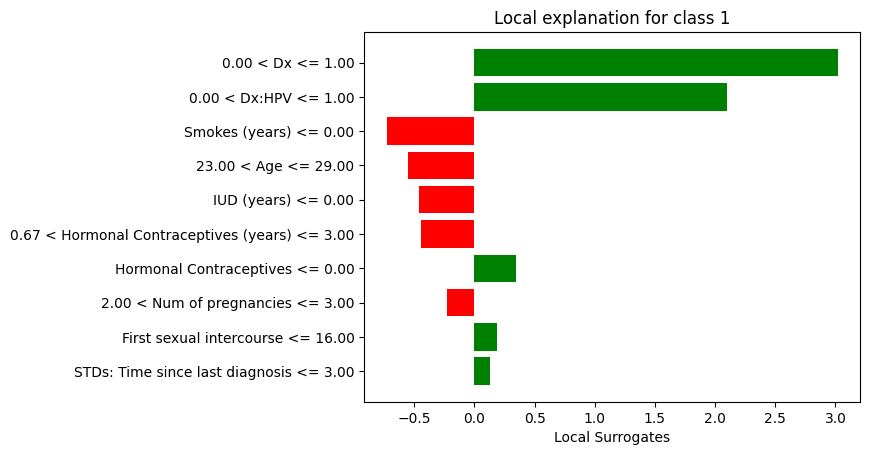

In [115]:
# %matplotlib inline
# fig = exp.as_pyplot_figure()
# plt.xlabel("Local Surrogates")
im = Image.open(root+"/Wsurrogate291.png")
im

In [116]:

# fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'surrogate'+str(instance)+str(f)+'.png', bbox_inches='tight')

In [117]:
# items = kercontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=False,show_predicted_value=False)

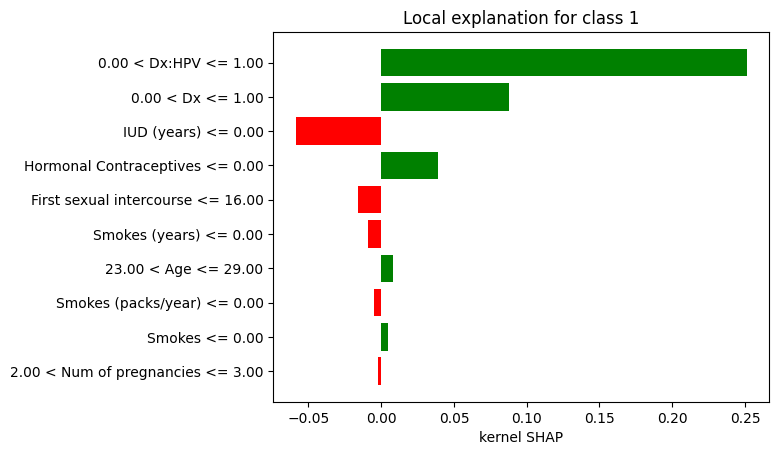

In [118]:
# %matplotlib inline
# fig = exp.as_pyplot_figure()
# plt.xlabel("kernel SHAP")
# # fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'kernelSHAP'+str(instance)+str(f)+'.png', bbox_inches='tight')
im = Image.open(root+"/WkernelSHAP291.png")
im

In [119]:
# items = trecontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=True,show_predicted_value=False)

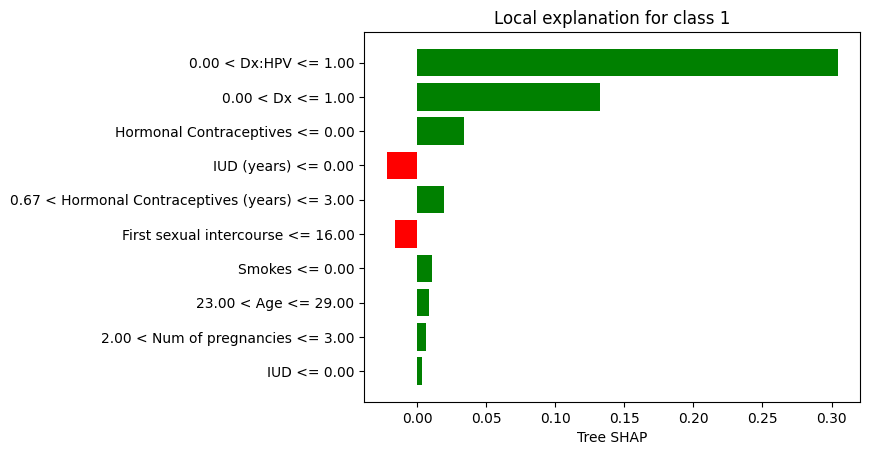

In [120]:
# %matplotlib inline
# fig = exp.as_pyplot_figure()
# plt.xlabel("Tree SHAP")
# # fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'treeSHAP'+str(instance)+str(f)+'.png', bbox_inches='tight')
im = Image.open(root+"/WtreeSHAP291.png")
im

In [121]:
# items = samcontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=True,show_predicted_value=False)

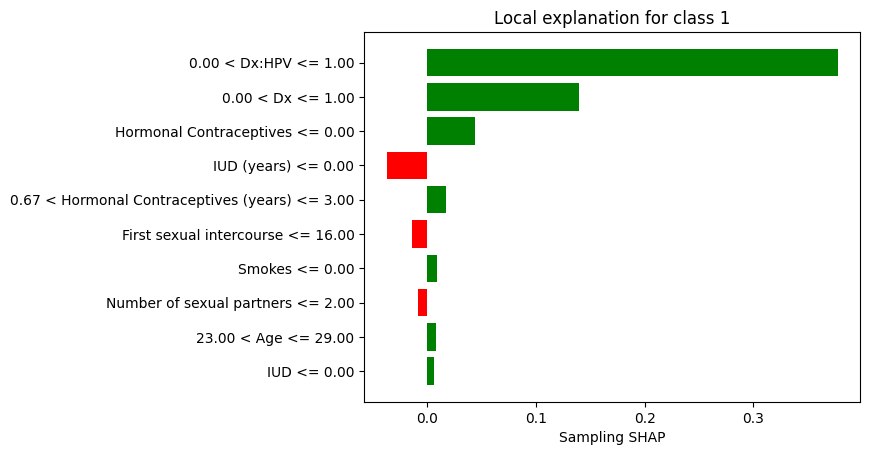

In [122]:
# %matplotlib inline
# fig = exp.as_pyplot_figure()
# plt.xlabel("Sampling SHAP")
# # fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'samplingSHAP'+str(instance)+str(f)+'.png', bbox_inches='tight')
im = Image.open(root+"/WsamplingSHAP291.png")
im

In [123]:
# items = limecontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=True,show_predicted_value=False)

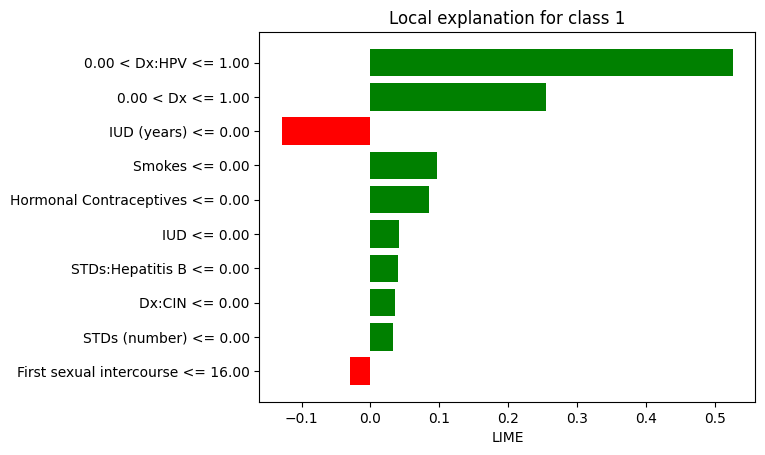

In [124]:
# %matplotlib inline
# fig = exp.as_pyplot_figurxe()
# plt.xlabel("LIME")
# # fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'lime'+str(instance)+str(f)+'.png', bbox_inches='tight')
im = Image.open(root+"/Wlime291.png")
im

In [125]:
# items = ticontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=False,show_predicted_value=False)

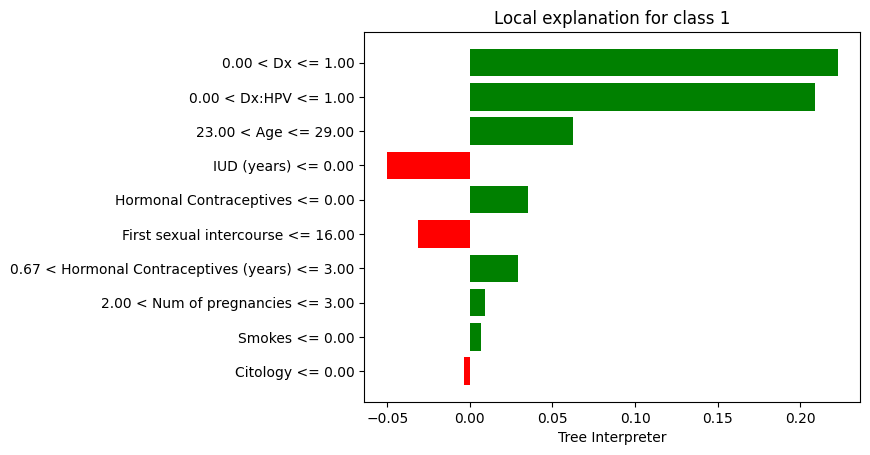

In [126]:
# %matplotlib inline
# fig = exp.as_pyplot_figure()
# plt.xlabel("Tree Interpreter")
# # fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'ti'+str(instance)+str(f)+'.png', bbox_inches='tight')
im = Image.open(root+"/Wti291.png")
im

In [127]:
# items = dicecontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}

# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=False,show_predicted_value=False)

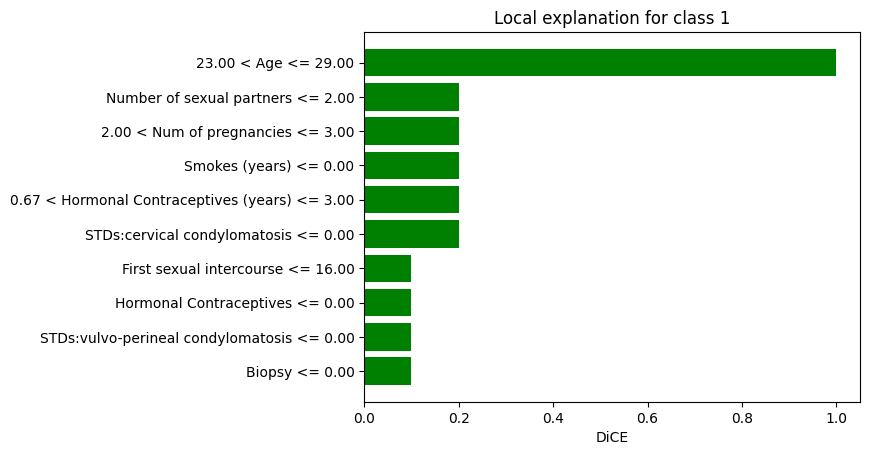

In [128]:
# %matplotlib inline
# fig = exp.as_pyplot_figure()
# plt.xlabel("DiCE")
# # fig.savefig('/content/drive/My Drive/DL4H_Sp24_Final_Project/'+str(var)+'dice'+str(instance)+str(f)+'.png', bbox_inches='tight')
im = Image.open(root+"/Wdice291.png")
im

# Checkpoint ROAR

The Faithfulness Metric: RemOve And Retrain (ROAR) (Hooker et al., 2018) is a machine learning interpretability metric that involves iteratively removing a subset of features from a dataset, retraining the model on the reduced dataset, and then evaluating the changes in model accuracy or feature importance.

In [129]:
# from sklearn.model_selection import cross_val_score

# def roar(featImp, feature_to_predict, datapath, savepath, dataname):
#     # Define line styles for plotting
#     a = ['ro--', 'go--', 'mo--', 'yo--', 'co--', 'ko--', 'bo--']
#     # Define percentages of features to remove in each iteration
#     pourc = [0, 10, 20, 30, 40, 60, 70, 90]
#     # Set font size for plots
#     font = {'size': 14}
#     plt.rc('font', **font)

#     # Iterate over each row of feature importances (each method's importance)
#     for k in range(featImp.shape[0]):
#         accuracies = []
#         # Iterate over defined percentages to remove features incrementally
#         for i in pourc:
#             # Extract feature importances, assuming 'Method' column exists and needs to be excluded
#             fi = featImp.iloc[k, :].drop('Method')
#             # Sort features by importance
#             fi = fi.to_dict()
#             fi = dict(sorted(fi.items(), key=lambda x: x[1], reverse=True))
#             fii = list(fi.keys())

#             # Load the dataset
#             df = pd.read_csv(datapath)
#             # Calculate the number of top features to remove based on percentage
#             top = int((len(fii) * i) / 100)
#             if top >= len(fii):
#                 print(f"Skipping removal of top {top} features as it exceeds available features.")
#                 accuracies.append(None)
#                 continue
#             remaining_features = fii[top:] + [feature_to_predict]

#             print(f"Removing top {top} features, which are: {fii[:top]}")

#             # Select the remaining features in the dataset
#             df = df[remaining_features]
#             X = df.drop(feature_to_predict, axis=1).values
#             y = df[feature_to_predict].values

#             # Check if there are any features left to train the model
#             if X.shape[1] == 0:
#                 print("No features left to train the model.")
#                 accuracies.append(None)
#                 continue

#             # Initialize the classifier and perform cross-validation
#             model = RandomForestClassifier(random_state=42)
#             try:
#                 scores = cross_val_score(model, X, y, cv=10)
#                 accuracies.append(np.mean(scores))
#             except Exception as e:
#                 print(f"Error while fitting the model: {e}")
#                 accuracies.append(None)

#         # Plot the results for the current feature importance row
#         plt.plot(pourc, accuracies, a[k], label=f"{featImp.iloc[k, :]['Method']} for {dataname}")

#     # Configure and display the plot
#     plt.xlabel('% removed features for ' + dataname)
#     plt.ylabel('Accuracy')
#     plt.legend(loc='upper right')
#     # plt.savefig(savepath + 'roar.png', bbox_inches='tight', dpi=300)
#     plt.show()


In [130]:
datapath=root + '/Rcancer2.csv'
savepath= '/content/drive/My Drive/DL4H_Sp24_Final_Project/'
dataname='Cervical cancer'
# print(all_fi.columns)
# roar(all_fi, label, datapath, savepath, dataname)

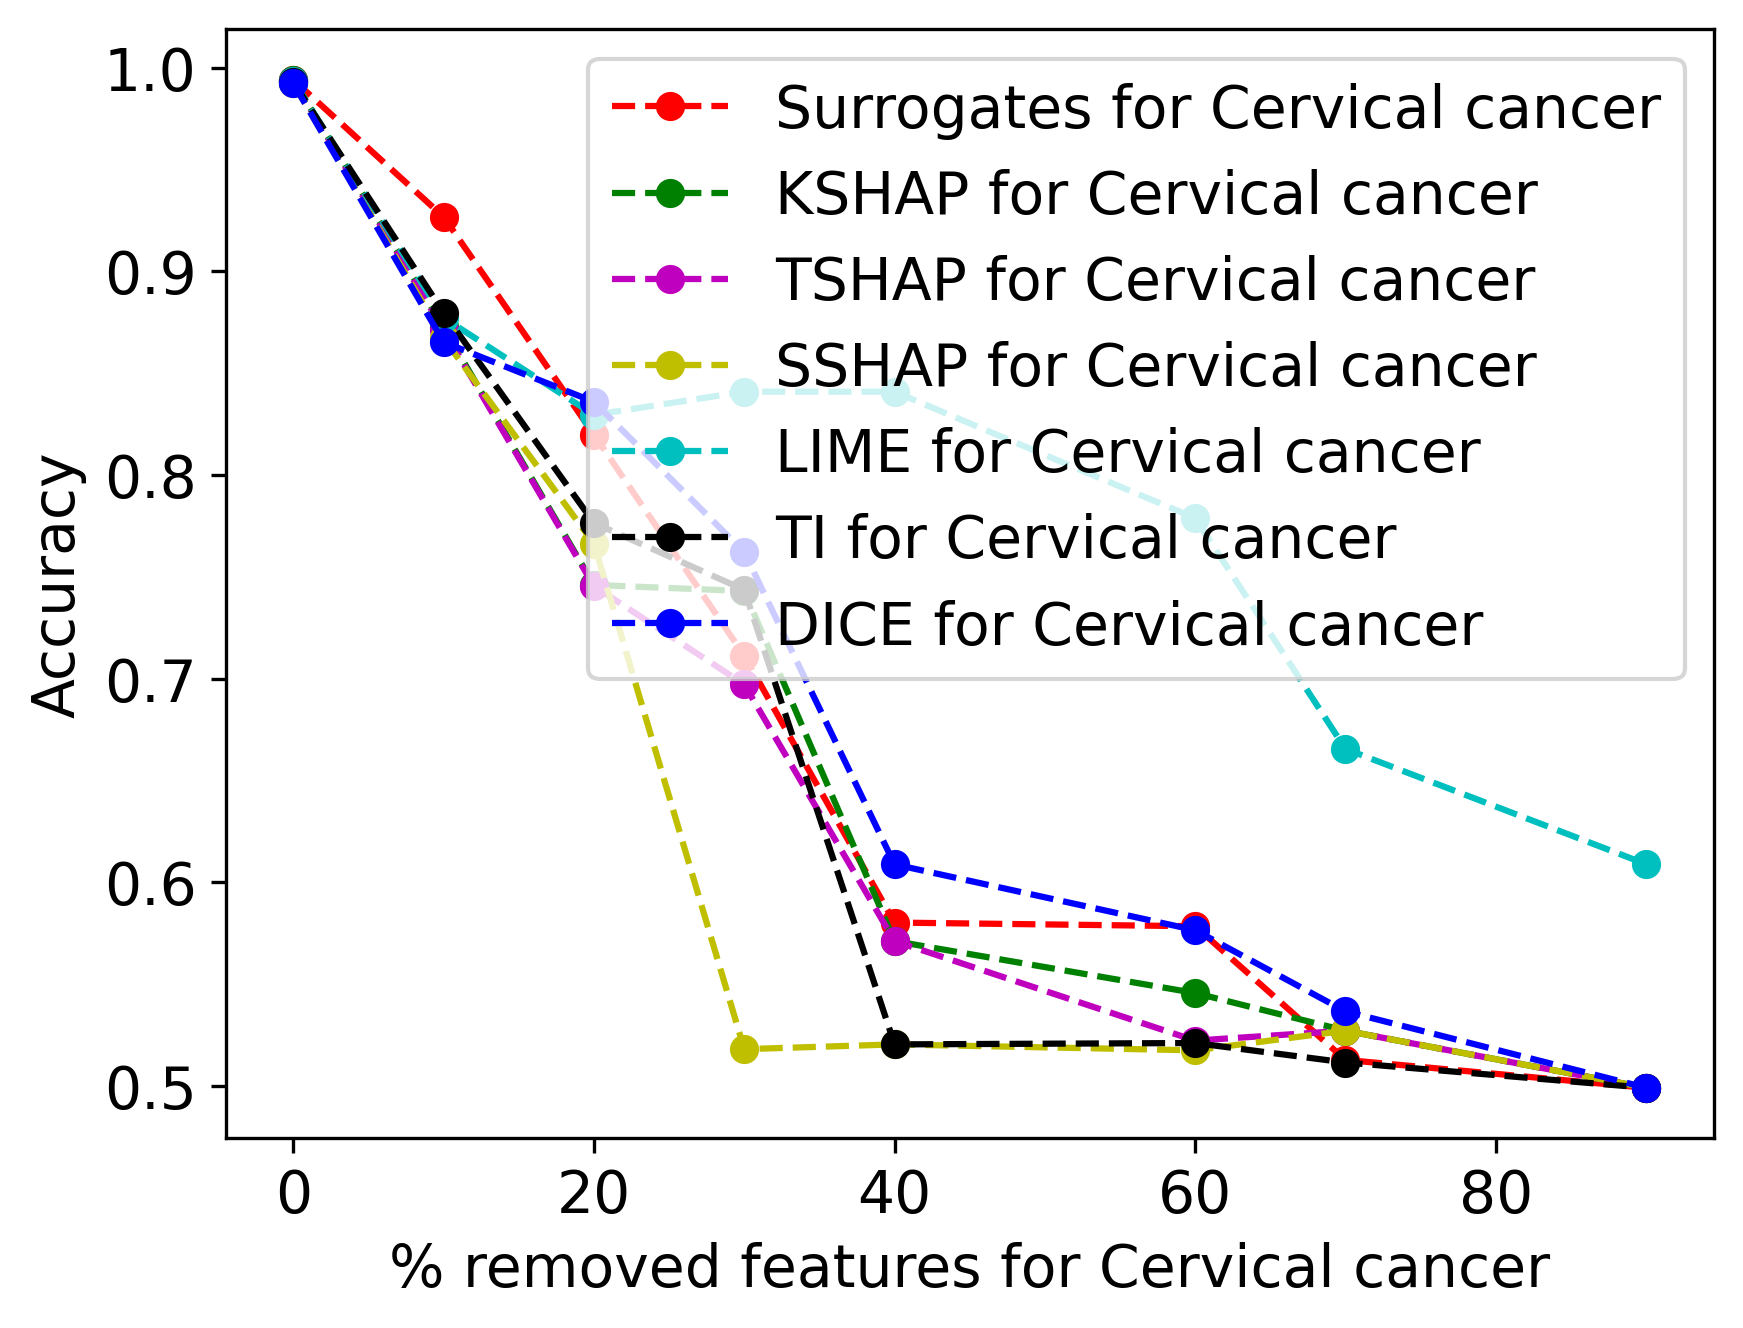

In [131]:
from PIL import Image
im = Image.open(root+"/roar.png")
im

## SHAPASH Contribution Plots (Age)

In [132]:
!pip install shapash

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached shap-0.45.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (538 kB)
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: shap
    Found existing installation: shap 0.44.0
    Uninstalling shap-0.44.0:
      Successfully uninstalled shap-0.44.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dice-ml 0.11

In [133]:
# from shapash.explainer.consistency import Consistency
# from shapash import SmartExplainer

# print("Training Data Shape:", X_train.shape)
# print("Testing Data Shape:", X_test.shape)
# print("Training Features:", X_train.columns.tolist())
# print("Testing Features:", X_test.columns.tolist())

# cns=Consistency()
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test)

# from sklearn.ensemble import RandomForestClassifier
# xpl = SmartExplainer(model=model)
# xpl.compile(
#     x=X_test,
# )



In [134]:
from IPython.display import display

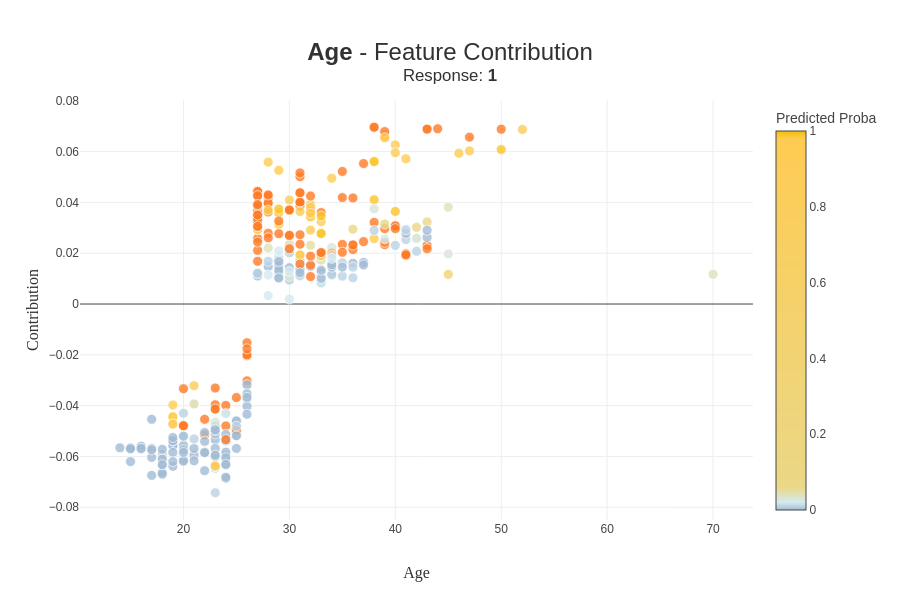

In [135]:
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribage.png")
im

In [136]:

# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribage.png')

In [137]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=kercontrib)

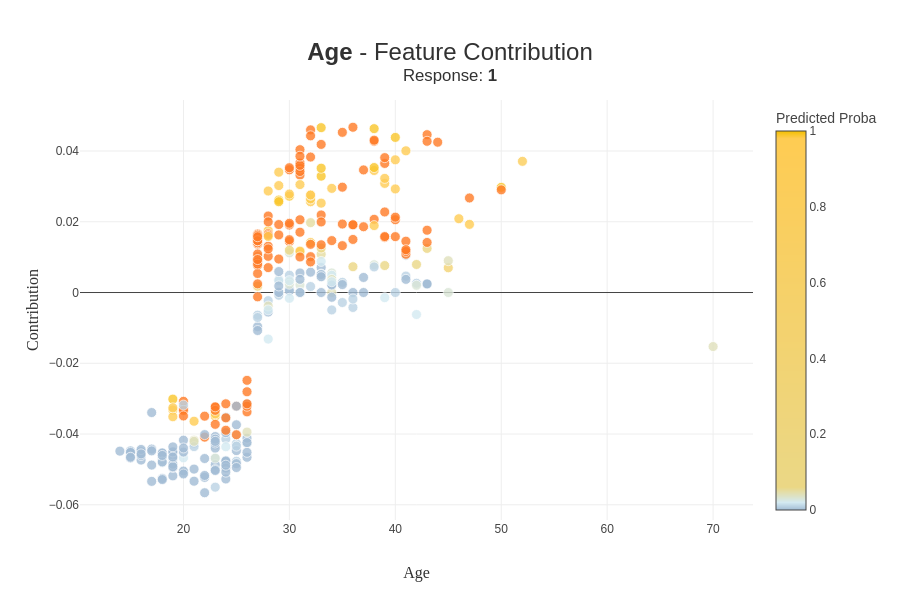

In [138]:
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribagekernel.png")
im

In [139]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribagekernel.png')

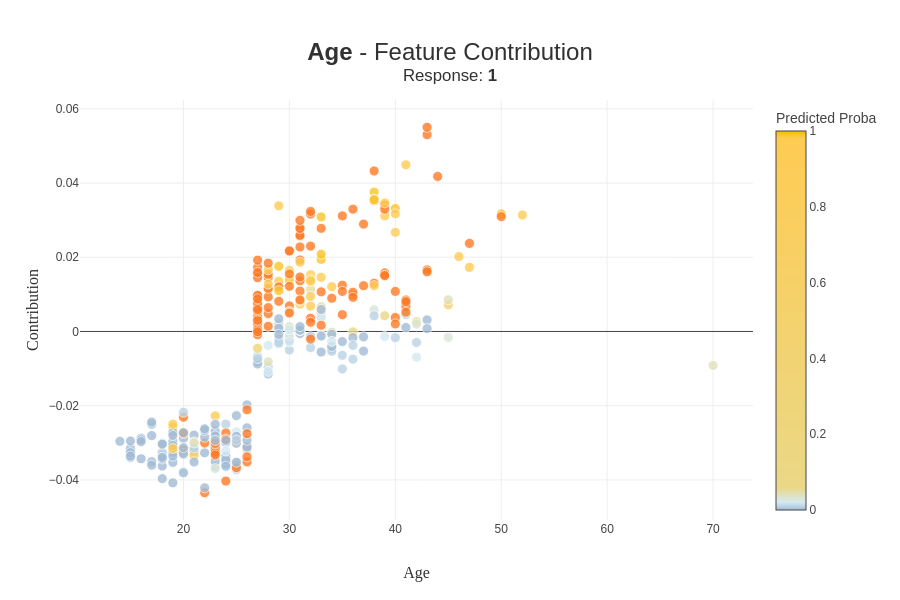

In [140]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=samcontrib)
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribagesampling.png")
im

In [141]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribagesampling.png')

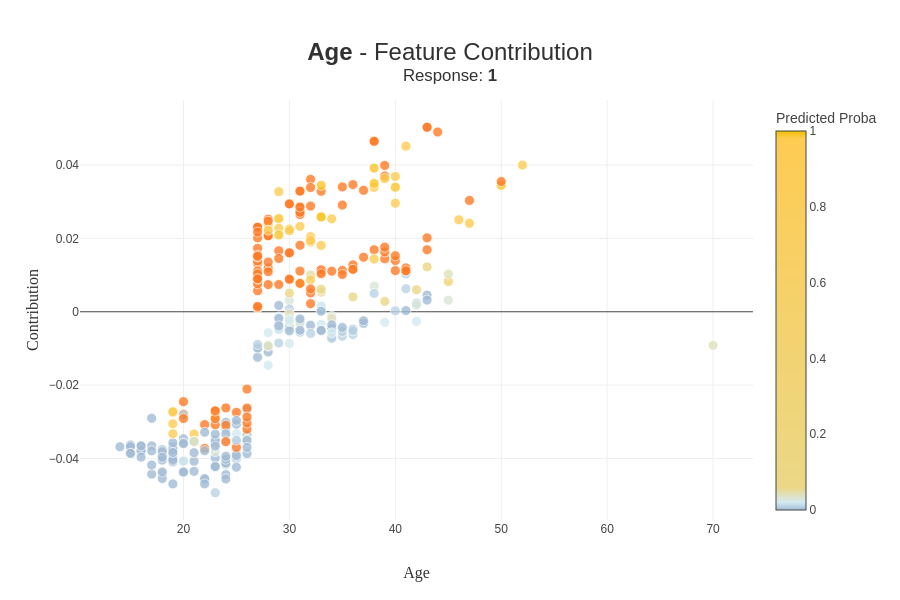

In [142]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=trecontrib)
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribagetree.png")
im

In [143]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribagetree.png')

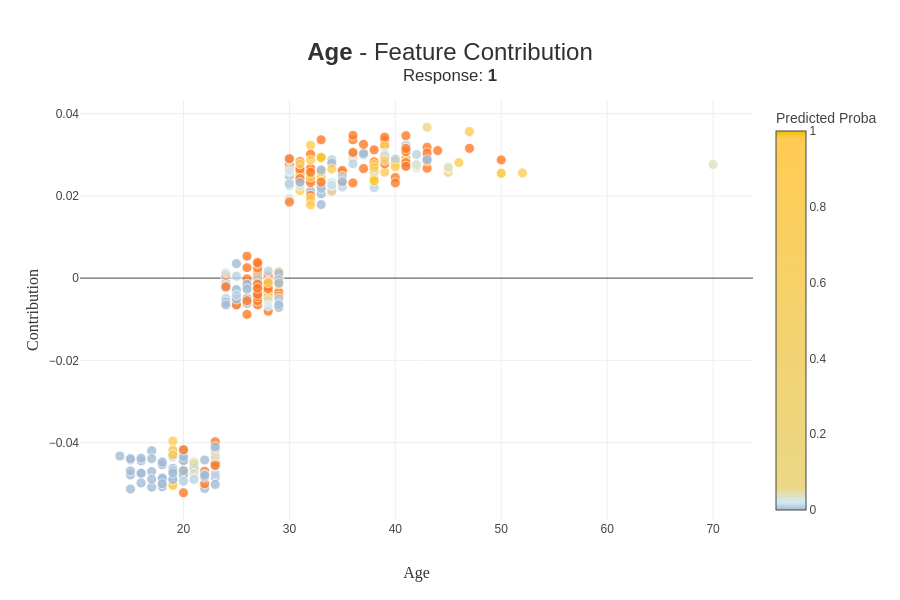

In [144]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=limecontrib)
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribagelime.png")
im

In [145]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribagelime.png')

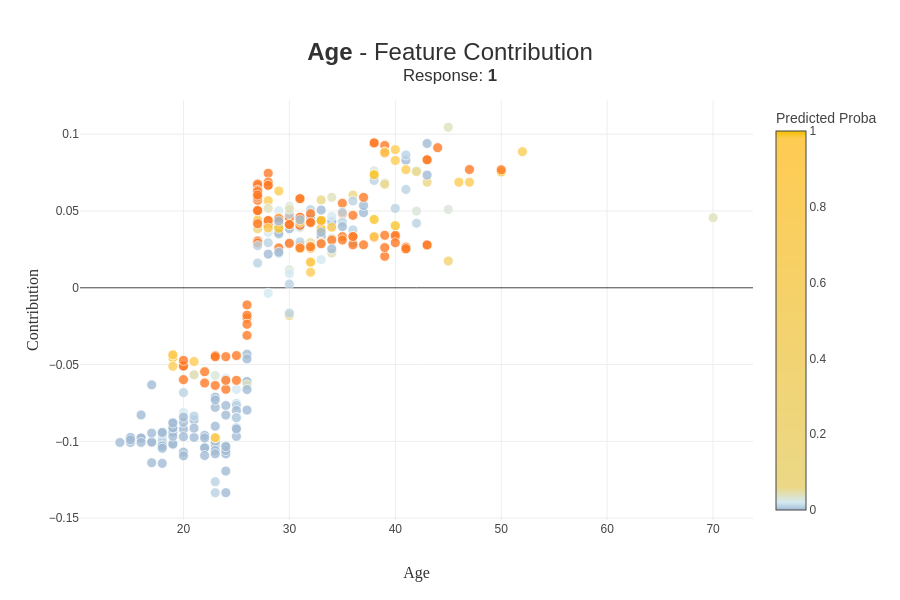

In [146]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=ticontrib)
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribageti.png")
im

In [147]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribageti.png')

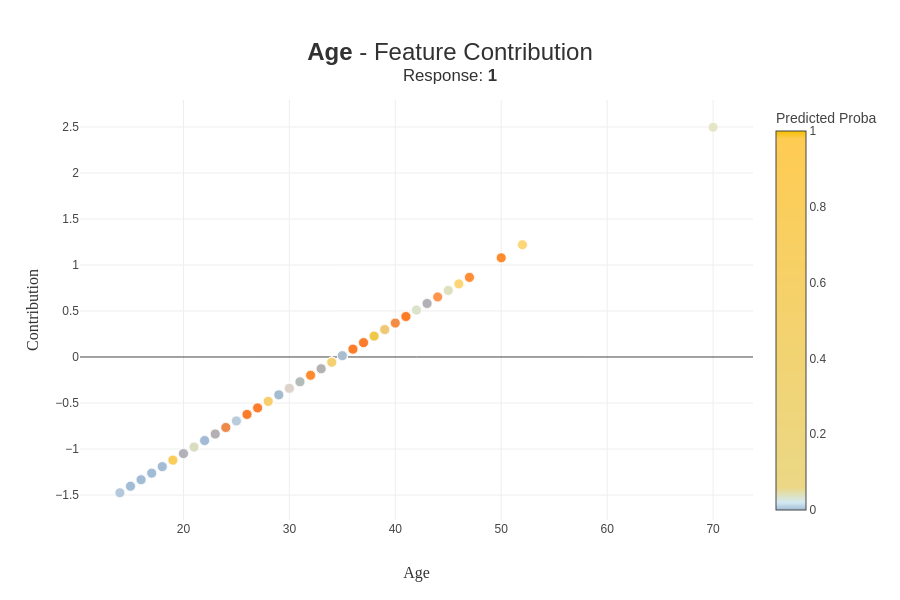

In [148]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=gscontrib)
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribageGlosur.png")
im

In [149]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribageGlosur.png')

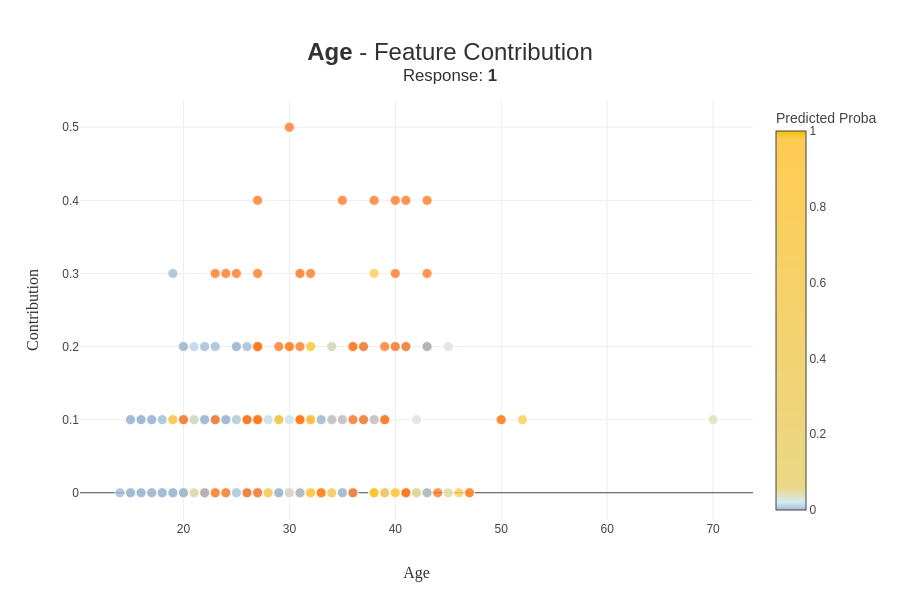

In [150]:
# xpl = SmartExplainer(model=model)
# dicecontrib = dicecontrib[X_test.columns]
# xpl.compile(x=X_test,contributions=dicecontrib)
# img=xpl.plot.contribution_plot(0)
# img.show()
im = Image.open(root+"/contribageDice.png")
im

In [151]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/contribageDice.png')

## Consistency Plots

In [152]:
# pairwise_consistency=cns.calculate_all_distances(methods, weights)

In [153]:
# test=pairwise_consistency[1].round(2)

In [154]:
# test.style.background_gradient(cmap='Paired_r')

In [155]:
root = 'DL4H_Sp24_Final_Project'

In [156]:

# with open(root + '/consistency.tex','w') as tf:
#     tf.write(test.to_latex())

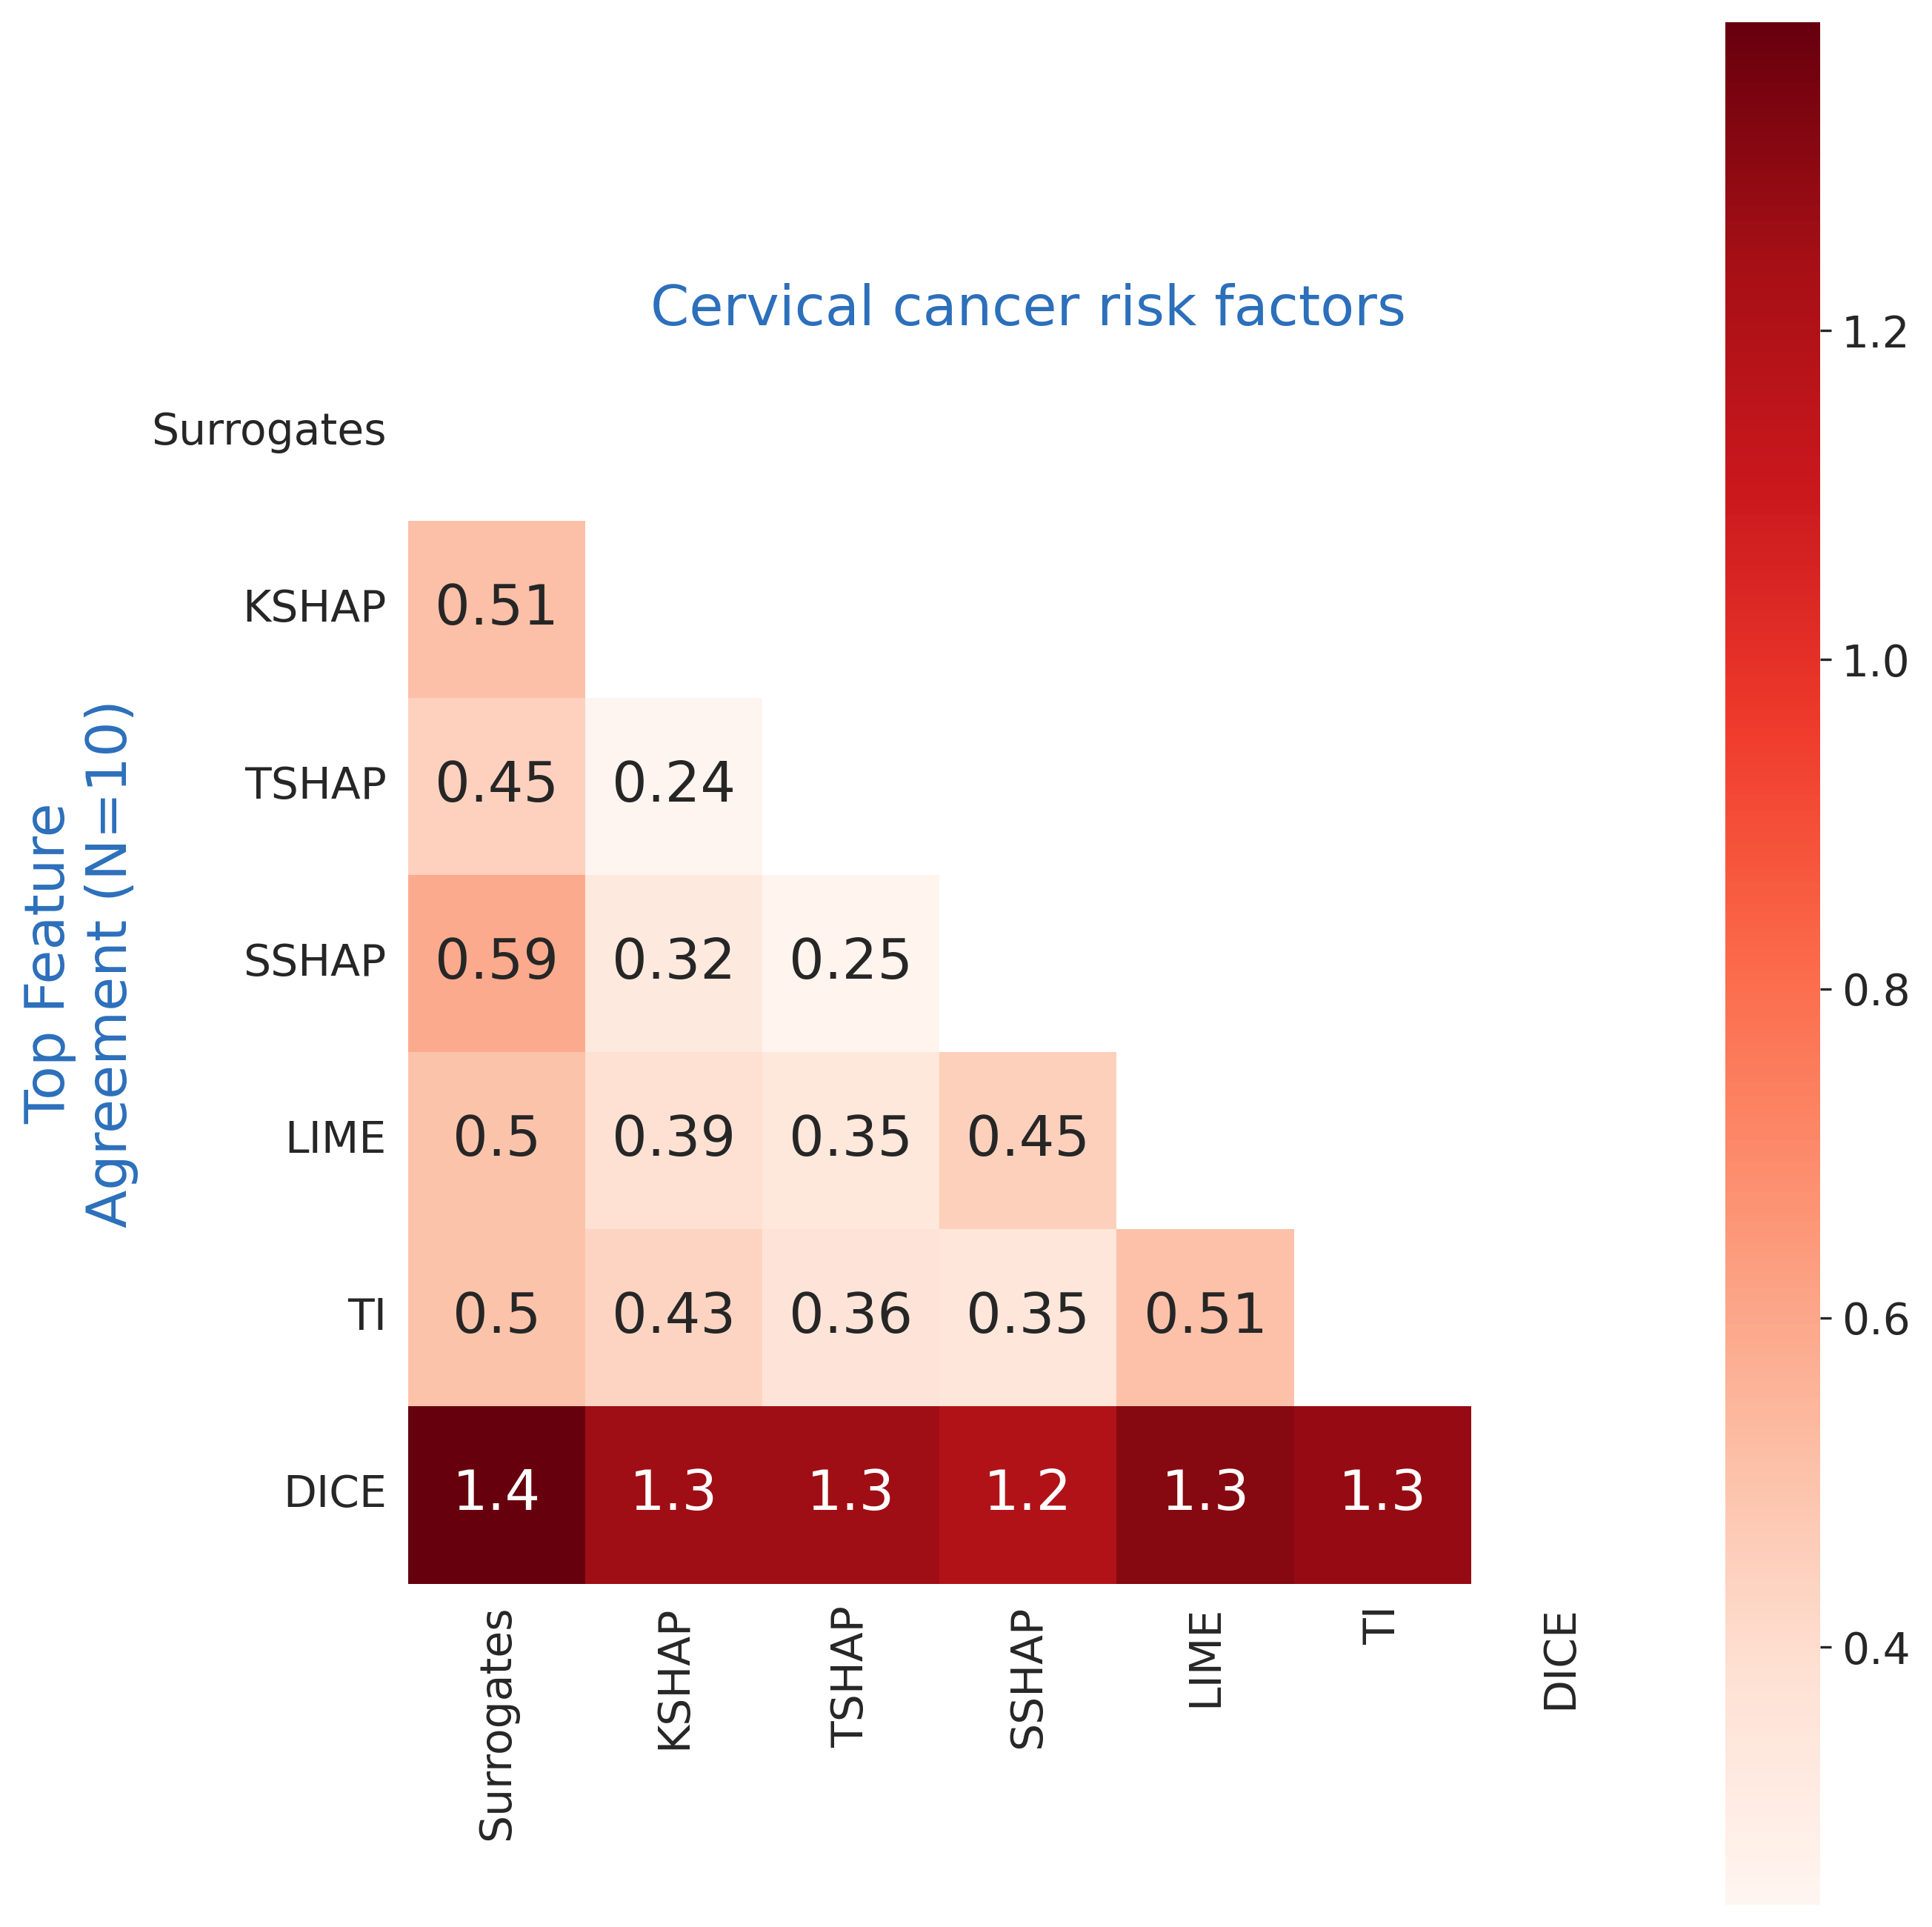

In [157]:
# corr = pairwise_consistency[1]
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# fig = plt.figure(figsize=(9, 11))
# with sns.axes_style("white"):

#     ax = sns.heatmap(corr, mask=mask, square=True,annot=True, annot_kws={'fontsize': 18},
#                 xticklabels=methods, yticklabels=methods, cmap="Reds", cbar=True)
#     ax.set_title("Cervical cancer risk factors", color='xkcd:medium blue', fontsize=18)
#     ax.set_ylabel('Top Feature\nAgreement (N=10)', color='xkcd:medium blue', fontsize=18)



#     plt.show()
im = Image.open(root+"/consistency_png.png")
im

In [158]:
# fig.savefig(root+'/consistency_png', bbox_inches='tight', dpi=300)

In [159]:
# for i in pairwise_consistency[1].columns:
#   print(i, round(np.mean(pairwise_consistency[1][i]),2))

## Compactness

In [160]:
# def get_distance(selection, contributions, mode, nb_features):

#     if mode == "classification" and len(contributions) == 2:
#         contributions = contributions[1]
#     assert nb_features <= contributions.shape[1]

#     contributions = contributions.loc[selection].values
#     top_features = np.array([sorted(row, key=abs, reverse=True) for row in contributions])[:, :nb_features]
#     output_top_features = np.sum(top_features[:, :], axis=1)
#     output_all_features = np.sum(contributions[:, :], axis=1)

#     if mode == "regression":
#         distance = abs(output_top_features - output_all_features) / abs(output_all_features)
#     elif mode == "classification":
#         distance = abs(output_top_features - output_all_features)
#     return distance


# def get_min_nb_features(selection, contributions, mode, distance):

#     assert 0 <= distance <= 1

#     if mode == "classification" and len(contributions) == 2:
#         contributions = contributions[1]
#     contributions = contributions.loc[selection].values
#     features_needed = []
#     # For each instance, add features one by one (ordered by SHAP) until we get close enough
#     for i in range(contributions.shape[0]):
#         ids = np.flip(np.argsort(np.abs(contributions[i, :])))
#         output_value = np.sum(contributions[i, :])

#         score = 0
#         for j, idx in enumerate(ids):
#             # j : number of features needed
#             # idx : positions of the j top shap values
#             score += contributions[i, idx]
#             # CLOSE_ENOUGH
#             if mode == "regression":
#                 if abs(score - output_value) < distance * abs(output_value):
#                     break
#             elif mode == "classification":
#                 if abs(score - output_value) < distance:
#                     break
#         features_needed.append(j + 1)
#     return features_needed



# def compute_features_compacity(case, contributions, selection, distance, nb_features):
#         #if (case == "classification") and (len(classes) > 2):
#         #    raise AssertionError("Multi-class classification is not supported")

#         features_needed = get_min_nb_features(selection, contributions, case, distance)
#         distance_reached = get_distance(selection, contributions, case, nb_features)
#         # We clip large approximations to 100%
#         distance_reached = np.clip(distance_reached, 0, 1)

#         return {"features_needed": features_needed, "distance_reached": distance_reached}

In [161]:
# compacities=[]

# for weight in weights:
#   rr=compute_features_compacity(case="classification", contributions=weight, selection=list(range(0, len(X_test))), distance=.9, nb_features=5)
#   #rr=compute_features_compacity(case="classification", contributions=weight, selection=[instance], distance=0.9, nb_features=5)
#   compacities.append(pd.DataFrame.from_dict(rr))

In [162]:
# maxx=[]
# for c in compacities:
#   maxx.append(c.iloc[c.distance_reached.idxmax()].tolist())
# compacity=pd.DataFrame(data=maxx, columns=['features_needed', 'distance_reached'])
# compacity['Method']=methods
# compacity.set_index('Method', drop=True).round(2)

In [163]:
# with open(root+'/compactness'+str(instance)+'.tex','w') as tf:
#     tf.write(compacity.to_latex())

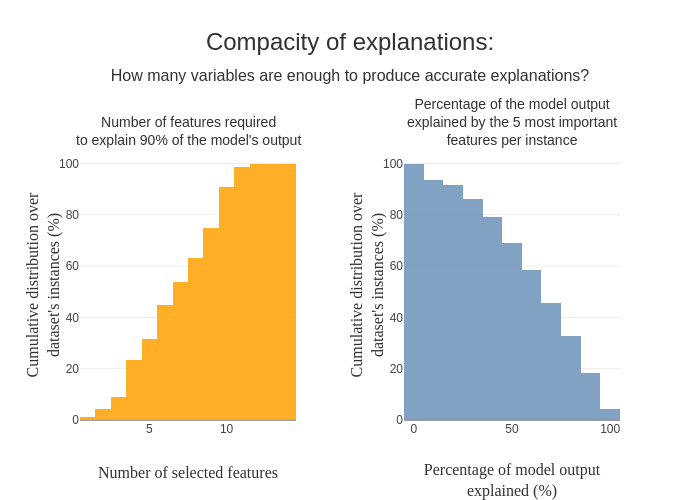

In [164]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=gscontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compactGlosur.png")
im

In [165]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compactGlosur.png')

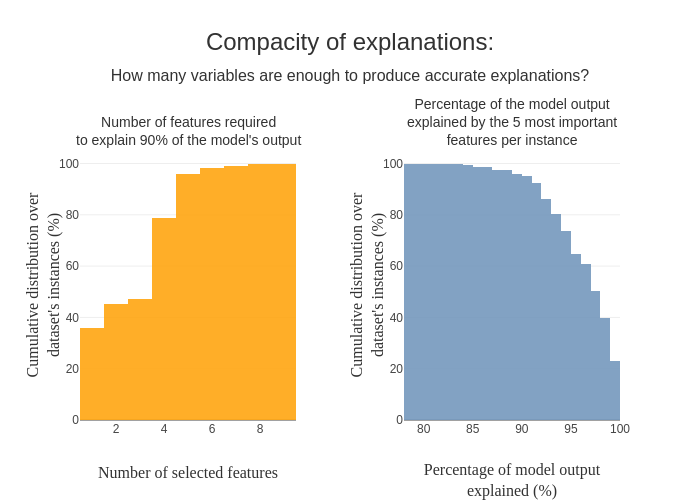

In [166]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=kercontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compactker.png")
im

In [167]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compactker.png')

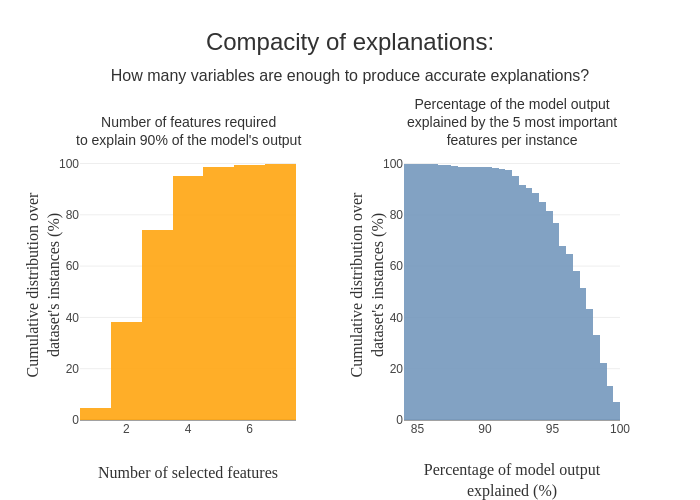

In [168]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=trecontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compacttree.png")
im

In [169]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compacttree.png')

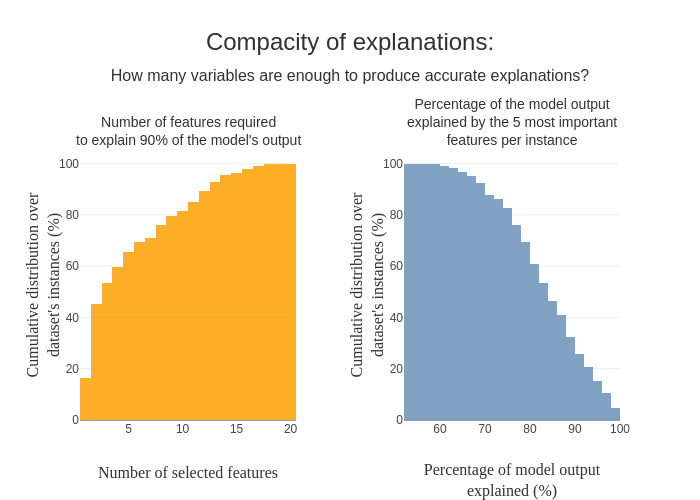

In [170]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=limecontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compactlime.png")
im

In [171]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compactlime.png')

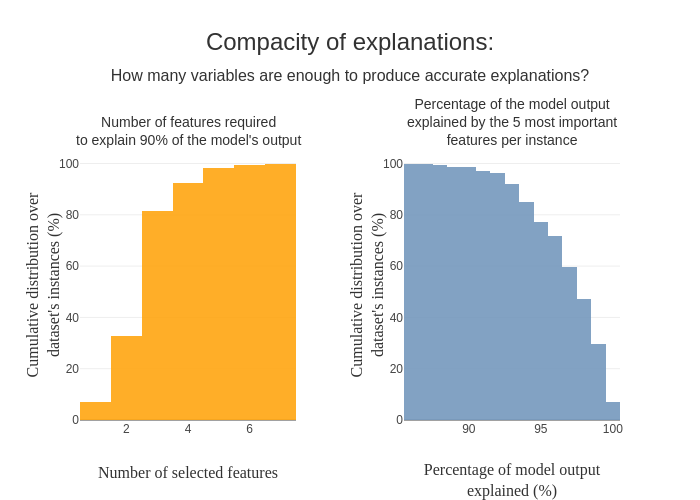

In [172]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=samcontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compactsampling.png")
im

In [173]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compactsampling.png')

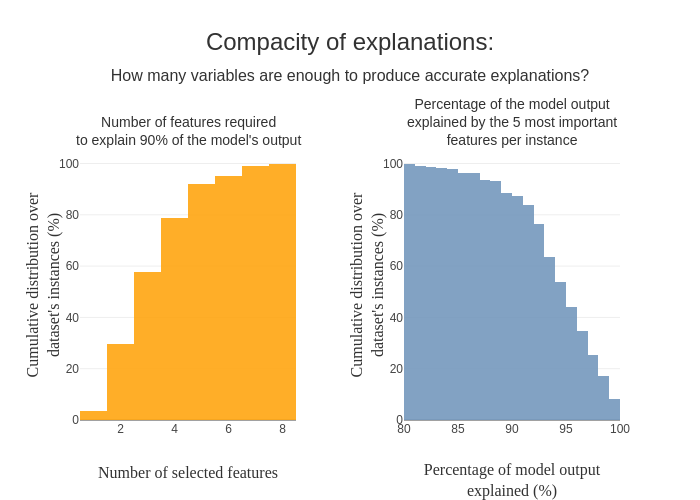

In [174]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=ticontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compactti.png")
im

In [175]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compactti.png')

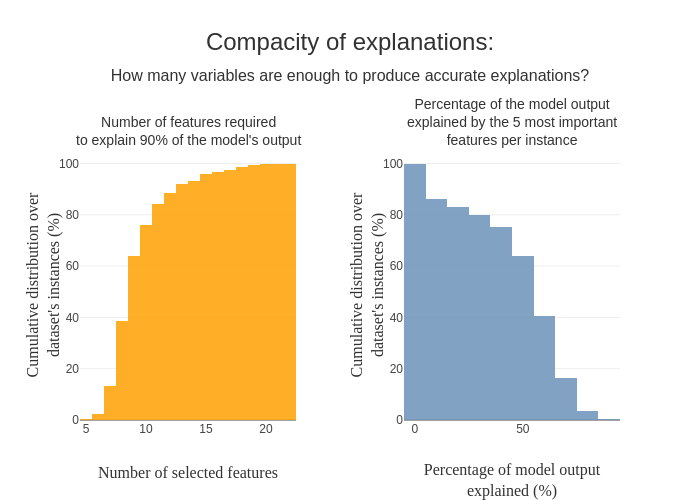

In [176]:
# xpl = SmartExplainer(model=model)
# xpl.compile(x=X_test,contributions=dicecontrib)
# img=xpl.plot.compacity_plot()
# img.show()
im = Image.open(root+"/compactdice.png")
im

In [177]:
# img.write_image('/content/drive/My Drive/DL4H_Sp24_Final_Project/compactdice.png')

## Stability

In [178]:
# from sklearn.preprocessing import normalize


# def _compute_distance(x1, x2, mean_vector, epsilon=0.0000001):
#     """
#     Compute distances between data points by using L1 on normalized data : sum(abs(x1-x2)/(mean_vector+epsilon))
#     Parameters
#     ----------
#     x1 : array
#         First vector
#     x2 : array
#         Second vector
#     mean_vector : array
#         Each value of this vector is the std.dev for each feature in dataset
#     Returns
#     -------
#     diff : float
#         Returns :math:`\\sum(\\frac{|x1-x2|}{mean\_vector+epsilon})`
#     """
#     diff = np.sum(np.abs(x1 - x2) / (mean_vector + epsilon))
#     return diff


# def _compute_similarities(instance, dataset):
#     """
#     Compute pairwise distances between an instance and all other data points
#     Parameters
#     ----------
#     instance : 1D array
#         Reference data point
#     dataset : 2D array
#         Entire dataset used to identify neighbors
#     Returns
#     -------
#     similarity_distance : array
#         V[j] == distance between actual instance and instance j
#     """
#     mean_vector = np.array(dataset, dtype=np.float32).std(axis=0)
#     similarity_distance = np.zeros(dataset.shape[0])

#     for j in range(0, dataset.shape[0]):
#         # Calculate distance between point and instance j
#         dist = _compute_distance(instance, dataset[j], mean_vector)
#         similarity_distance[j] = dist

#     return similarity_distance


# def _get_radius(dataset, n_neighbors, sample_size=50, percentile=95):
#     """
#     Calculate the maximum allowed distance between points to be considered as neighbors
#     Parameters
#     ----------
#     dataset : DataFrame
#         Pool to sample from and calculate a radius
#     n_neighbors : int
#         Maximum number of neighbors considered per instance
#     sample_size : int, optional
#         Number of data points to sample from dataset, by default 500
#     percentile : int, optional
#         Percentile used to calculate the distance threshold, by default 95
#     Returns
#     -------
#     radius : float
#         Distance threshold
#     """
#     # Select 500 points max to sample
#     size = min([dataset.shape[0], sample_size])
#     # Randomly sample points from dataset
#     sampled_instances = dataset[np.random.randint(0, dataset.shape[0], size), :]
#     # Define normalization vector
#     mean_vector = np.array(dataset, dtype=np.float32).std(axis=0)
#     # Initialize the similarity matrix
#     similarity_distance = np.zeros((size, size))
#     # Calculate pairwise distance between instances
#     for i in range(size):
#         for j in range(i, size):
#             dist = _compute_distance(sampled_instances[i], sampled_instances[j], mean_vector)
#             similarity_distance[i, j] = dist
#             similarity_distance[j, i] = dist
#     # Select top n_neighbors
#     ordered_X = np.sort(similarity_distance)[:, 1: n_neighbors + 1]
#     # Select the value of the distance that captures XX% of all distances (percentile)
#     return np.percentile(ordered_X.flatten(), percentile)


# def find_neighbors(selection, dataset, model, mode, n_neighbors=30):
#     """
#     For each instance, select neighbors based on 3 criteria:
#     1. First pick top N closest neighbors (L1 Norm + st. dev normalization)
#     2. Filter neighbors whose model output is too different from instance (see condition below)
#     3. Filter neighbors whose distance is too big compared to a certain threshold
#     Parameters
#     ----------
#     selection : list
#         Indices of rows to be displayed on the stability plot
#     dataset : DataFrame
#         Entire dataset used to identify neighbors
#     model : model object
#         ML model
#     mode : str
#         "classification" or "regression"
#     n_neighbors : int, optional
#         Top N neighbors initially allowed, by default 10
#     Returns
#     -------
#     all_neighbors : list of 2D arrays
#         Wrap all instances with corresponding neighbors in a list with length (#instances).
#         Each array has shape (#neighbors, #features) where #neighbors includes the instance itself.
#     """
#     instances = dataset.loc[selection].values

#     all_neighbors = np.empty((0, instances.shape[1] + 1), float)
#     """Filter 1 : Pick top N closest neighbors"""
#     for instance in instances:
#         c = _compute_similarities(instance, dataset.values)
#         # Pick indices of the closest neighbors (and include instance itself)
#         neighbors_indices = np.argsort(c)[: n_neighbors + 1]
#         # Return instance with its neighbors
#         neighbors = dataset.values[neighbors_indices]
#         # Add distance column
#         neighbors = np.append(neighbors, c[neighbors_indices].reshape(n_neighbors + 1, 1), axis=1)
#         all_neighbors = np.append(all_neighbors, neighbors, axis=0)

#     # Calculate predictions for all instances and corresponding neighbors
#     if mode == "regression":
#         # For XGB it is necessary to add columns in df, otherwise columns mismatch
#         predictions = model.predict(pd.DataFrame(all_neighbors[:, :-1], columns=dataset.columns))
#     elif mode == "classification":
#         predictions = model.predict_proba(pd.DataFrame(all_neighbors[:, :-1], columns=dataset.columns))[:, 1]

#     # Add prediction column
#     all_neighbors = np.append(all_neighbors, predictions.reshape(all_neighbors.shape[0], 1), axis=1)
#     # Split back into original chunks (1 chunck = instance + neighbors)
#     all_neighbors = np.split(all_neighbors, instances.shape[0])

#     """Filter 2 : neighbors with similar blackbox output"""
#     # Remove points if prediction is far away from instance prediction
#     if mode == "regression":
#         # Trick : use enumerate to allow the modifcation directly on the iterator
#         for i, neighbors in enumerate(all_neighbors):
#             all_neighbors[i] = neighbors[abs(neighbors[:, -1] - neighbors[0, -1]) < 0.1 * abs(neighbors[0, -1])]
#     elif mode == "classification":
#         for i, neighbors in enumerate(all_neighbors):
#             all_neighbors[i] = neighbors[abs(neighbors[:, -1] - neighbors[0, -1]) < 0.1]

#     """Filter 3 : neighbors below a distance threshold"""
#     # Remove points if distance is bigger than radius
#     radius = _get_radius(dataset.values, n_neighbors)

#     for i, neighbors in enumerate(all_neighbors):
#         # -2 indicates the distance column
#         all_neighbors[i] = neighbors[neighbors[:, -2] < radius]
#     return all_neighbors

# def shap_neighbors(instance, x_encoded, contributions, mode):
#     """
#     For an instance and corresponding neighbors, calculate various
#     metrics (described below) that are useful to evaluate local stability
#     Parameters
#     ----------
#     instance : 2D array
#         Instance + neighbours with corresponding features
#     x_encoded : DataFrame
#         Entire dataset used to identify neighbors
#     contributions : DataFrame
#         Calculated contribution values for the dataset
#     Returns
#     -------
#     norm_shap_values : array
#         Normalized SHAP values (with corresponding sign) of instance and its neighbors
#     average_diff : array
#         Variability (stddev / mean) of normalized SHAP values (using L1) across neighbors for each feature
#     norm_abs_shap_values[0, :] : array
#         Normalized absolute SHAP value of the instance
#     """
#     # Extract SHAP values for instance and neighbors
#     # :-2 indicates that two columns are disregarded : distance to instance and model output
#     ind = pd.merge(x_encoded.reset_index(), pd.DataFrame(instance[:, :-2], columns=x_encoded.columns), how='inner')\
#         .set_index(x_encoded.index.name if x_encoded.index.name is not None else 'index').index
#     # If classification, select contrbutions of one class only
#     if mode == "classification" and len(contributions) == 2:
#         contributions = contributions[1]
#     shap_values = contributions.loc[ind]
#     # For neighbors comparison, the sign of SHAP values is taken into account
#     norm_shap_values = normalize(shap_values, axis=1, norm="l1")
#     # But not for the average impact of the features across the dataset
#     norm_abs_shap_values = normalize(np.abs(shap_values), axis=1, norm="l1")
#     # Compute the average difference between the instance and its neighbors
#     # And replace NaN with 0
#     average_diff = np.divide(norm_shap_values.std(axis=0), norm_abs_shap_values.mean(axis=0),
#                              out=np.zeros(norm_abs_shap_values.shape[1]),
#                              where=norm_abs_shap_values.mean(axis=0) != 0)

#     return norm_shap_values, average_diff, norm_abs_shap_values[0, :]


# def get_distance(selection, contributions, mode, nb_features):
#     """
#     Determine how close we get to the output with all features by using only a subset of them
#     Parameters
#     ----------
#     selection : list
#         Indices of rows to be displayed on the stability plot
#     contributions : DataFrame
#         Calculated contribution values for the dataset
#     mode : str
#         "classification" or "regression"
#     nb_features : int, optional
#         Number of features used, by default 5
#     Returns
#     -------
#     distance : array
#         List of distances for each instance by using top selected features (ex: np.array([0.12, 0.16...])).

#         * For regression:

#             * normalized distance between the output of current model and output of full model
#         * For classifciation:
#             * distance between probability outputs (absolute value)
#     """
#     if mode == "classification" and len(contributions) == 2:
#         contributions = contributions[1]
#     assert nb_features <= contributions.shape[1]

#     contributions = contributions.loc[selection].values
#     top_features = np.array([sorted(row, key=abs, reverse=True) for row in contributions])[:, :nb_features]
#     output_top_features = np.sum(top_features[:, :], axis=1)
#     output_all_features = np.sum(contributions[:, :], axis=1)

#     if mode == "regression":
#         distance = abs(output_top_features - output_all_features) / abs(output_all_features)
#     elif mode == "classification":
#         distance = abs(output_top_features - output_all_features)
#     return distance



# def compute_features_stability (case, x, selection, contributions):
#         """
#         For a selection of instances, compute features stability metrics used in
#         methods `local_neighbors_plot` and `local_stability_plot`.
#         - If selection is a single instance, the method returns the (normalized) contribution values
#         of instance and corresponding neighbors.
#         - If selection represents multiple instances, the method returns the average (normalized) contribution values
#         of instances and neighbors (=amplitude), as well as the variability of those values in the neighborhood (=variability)
#         Parameters
#         ----------
#         selection: list
#             Indices of rows to be displayed on the stability plot
#         Returns
#         -------
#         Dictionary
#             Values that will be displayed on the graph. Keys are "amplitude", "variability" and "norm_shap"
#         """
#         #if (case == "classification") and (len(self._classes) > 2):
#         #    raise AssertionError("Multi-class classification is not supported")
#         x_encoded=x
#         x_init=x
#         all_neighbors = find_neighbors(selection, x_encoded, model, case)

#         # Check if entry is a single instance or not
#         if len(selection) == 1:
#             # Compute explanations for instance and neighbors
#             norm_shap, _, _ = shap_neighbors(all_neighbors[0], x_encoded, contributions, case)
#             local_neighbors = {"norm_shap": norm_shap}
#             return local_neighbors
#         else:
#             numb_expl = len(selection)
#             amplitude = np.zeros((numb_expl, x_init.shape[1]))
#             variability = np.zeros((numb_expl, x_init.shape[1]))
#             # For each instance (+ neighbors), compute explanation
#             for i in range(numb_expl):
#                 (_, variability[i, :], amplitude[i, :],) = shap_neighbors(all_neighbors[i], x_encoded, contributions, case)
#             features_stability = {"variability": variability, "amplitude": amplitude}
#             return features_stability

In [179]:
features=list(X_test.columns)

In [180]:
# frames=[]
# for weight in weights:
#   #fs= compute_features_stability (case="classification", x=X_test, selection=list(range(0, len(X_test))), contributions=weight)
#   fs= compute_features_stability (case="classification", x=X_test, selection=[instance], contributions=weight)
#   frames.append(fs)

### One Instance

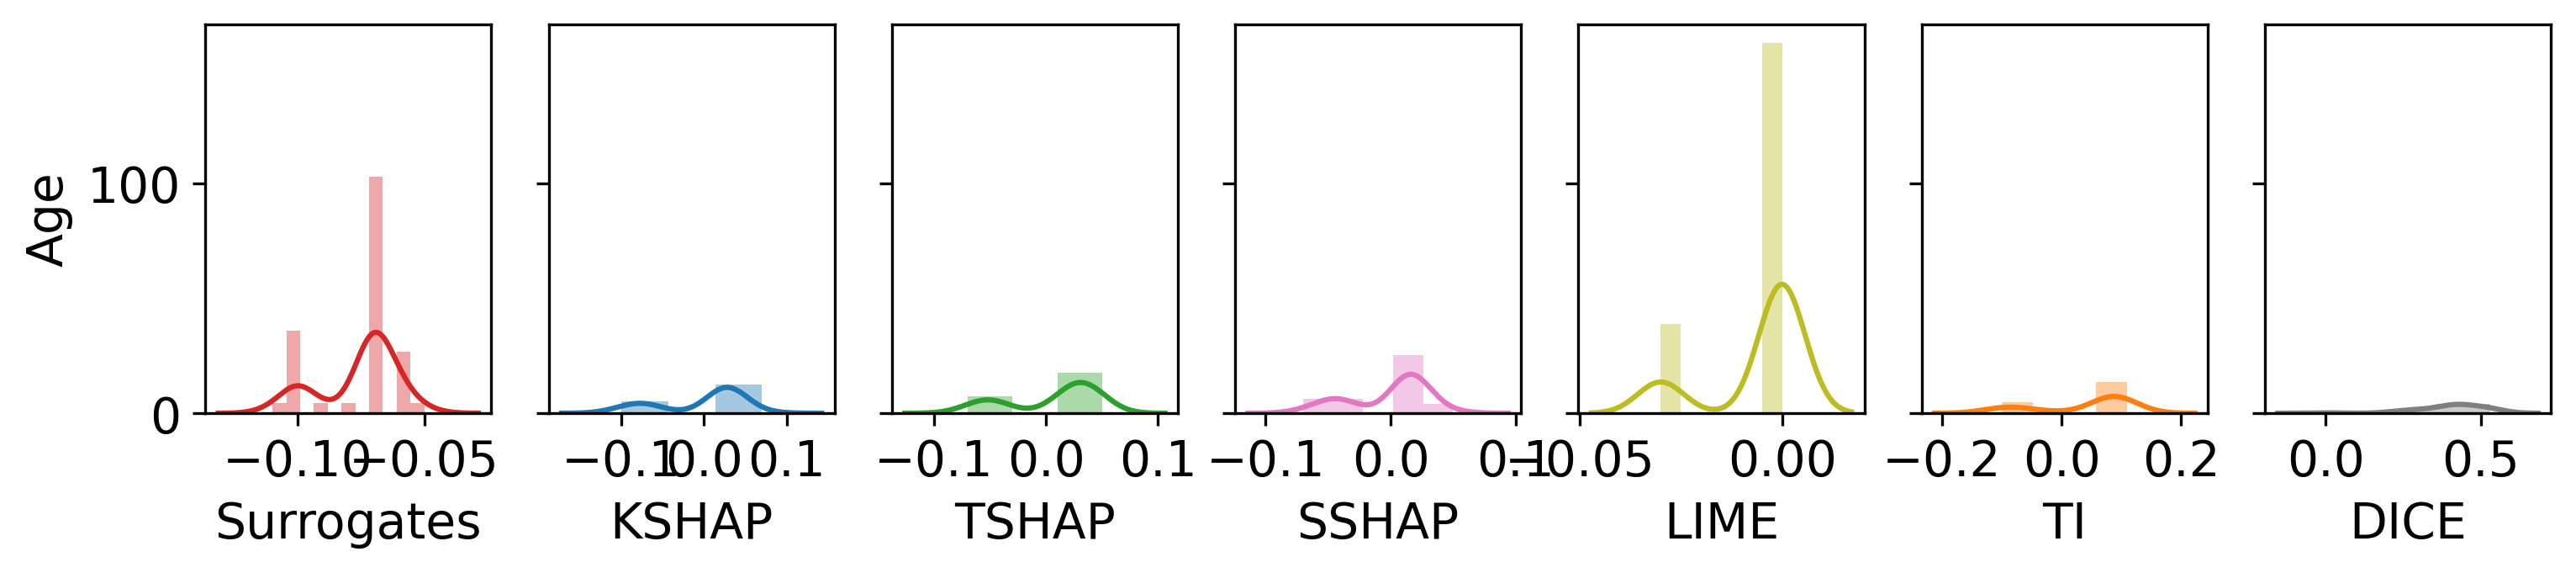

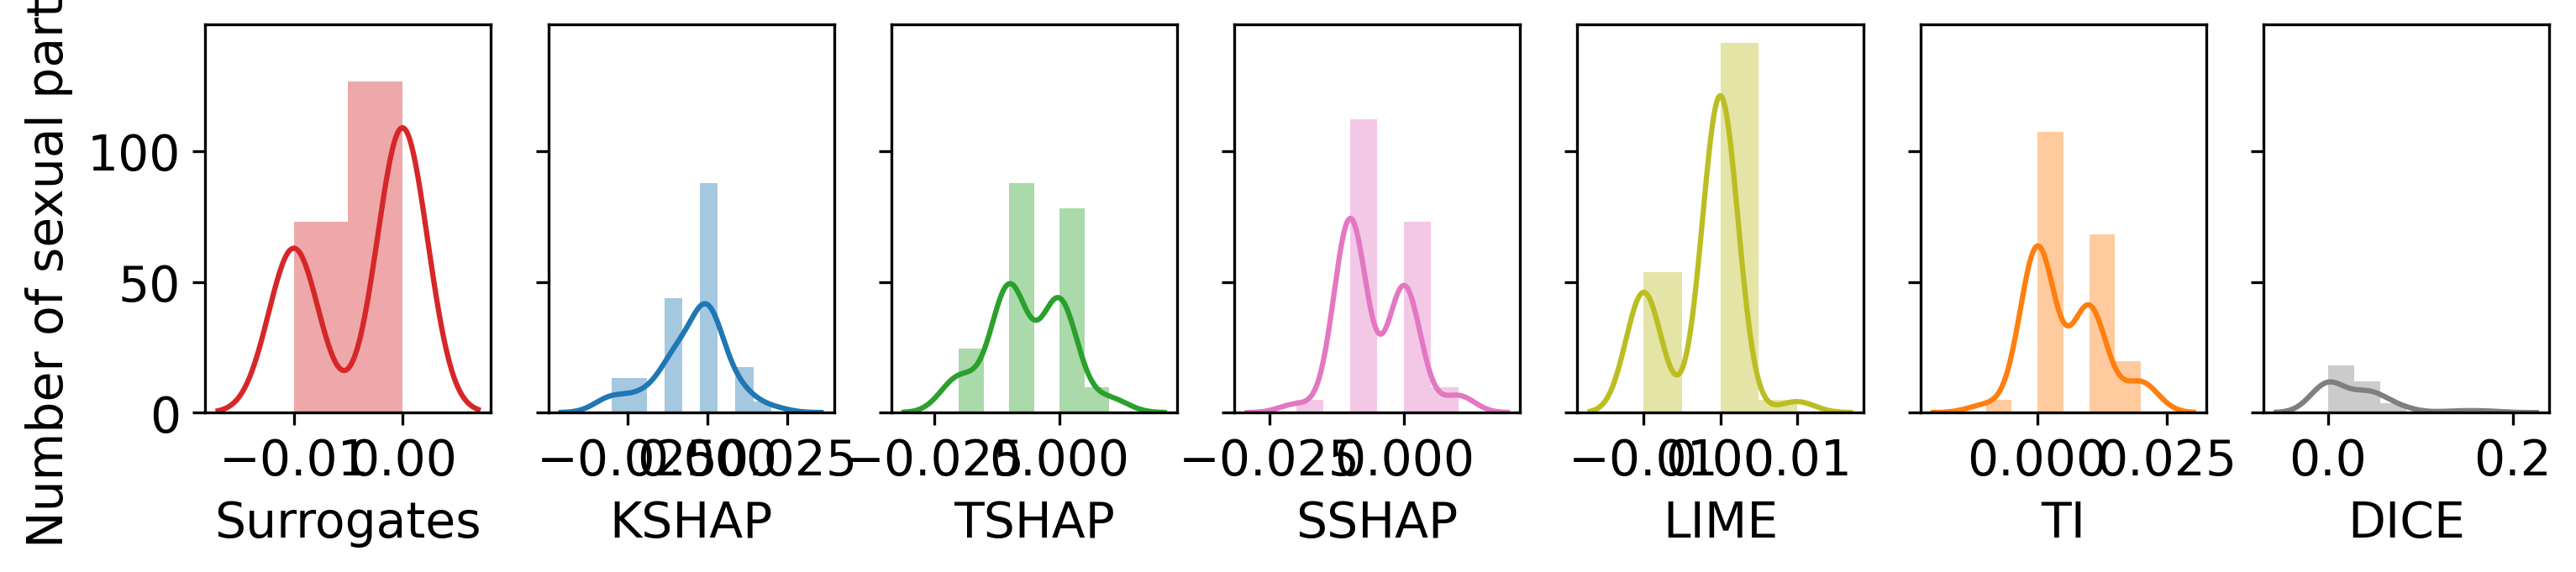

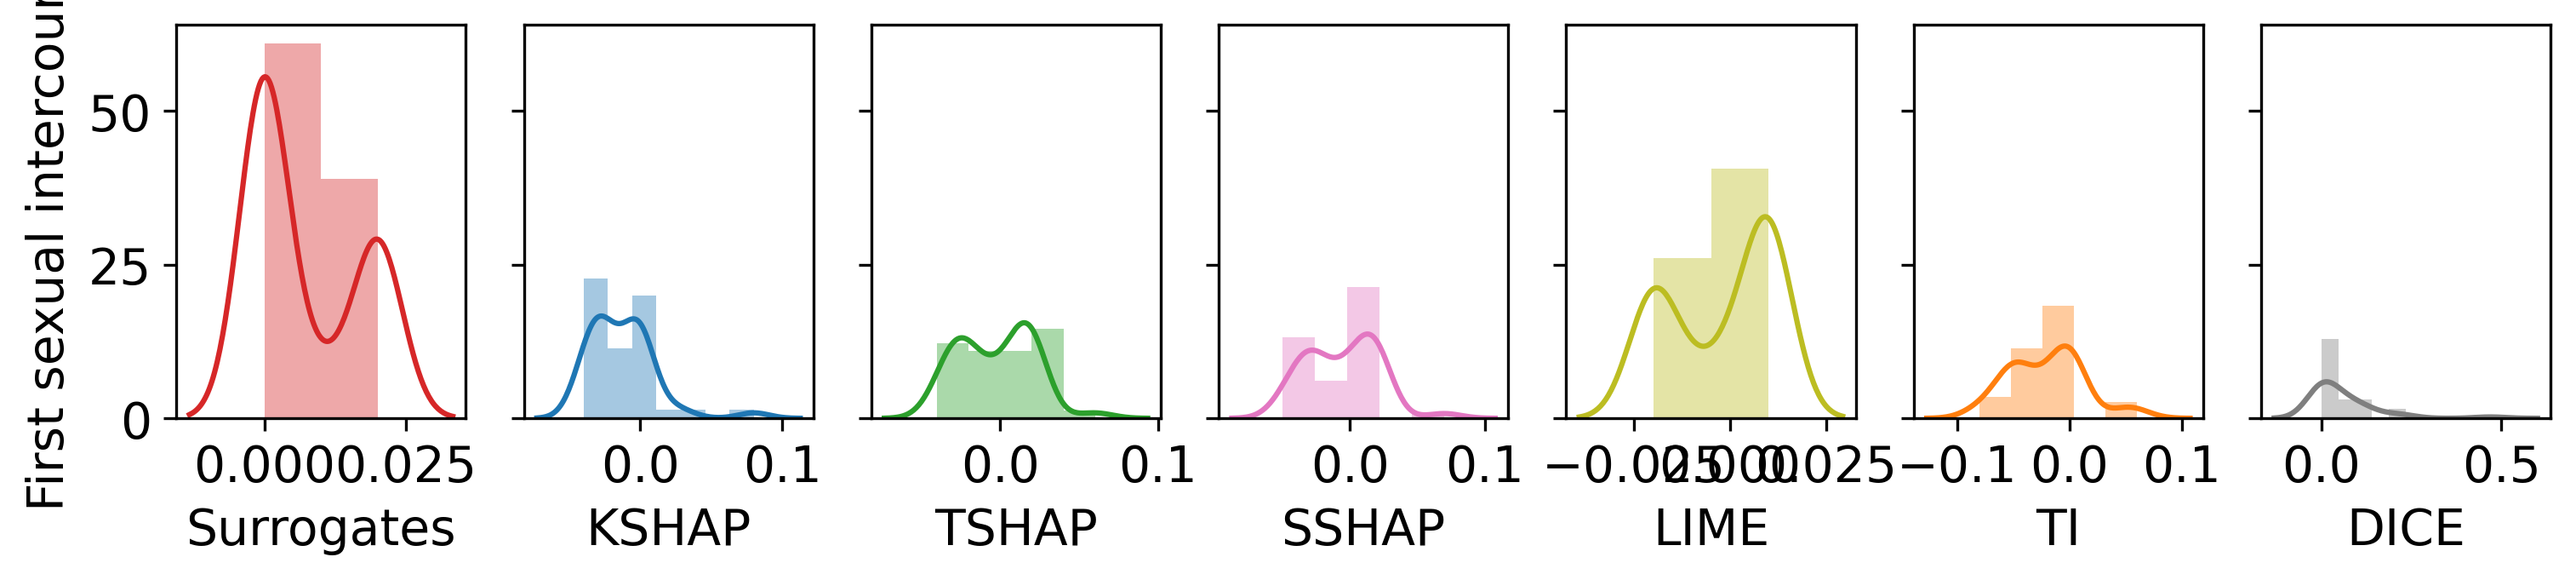

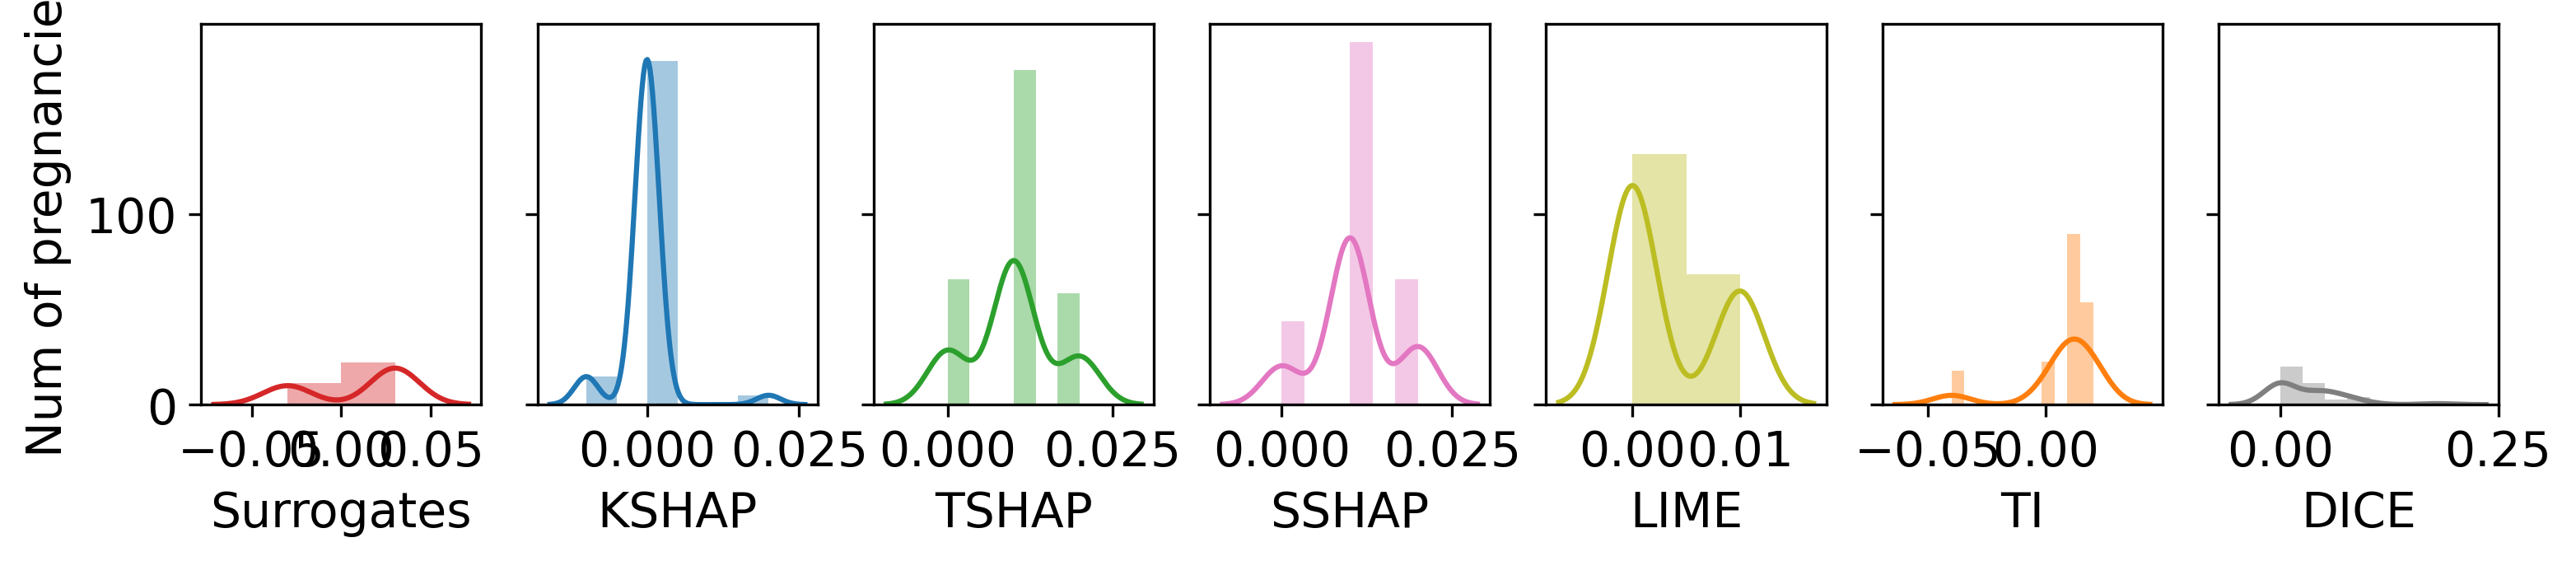

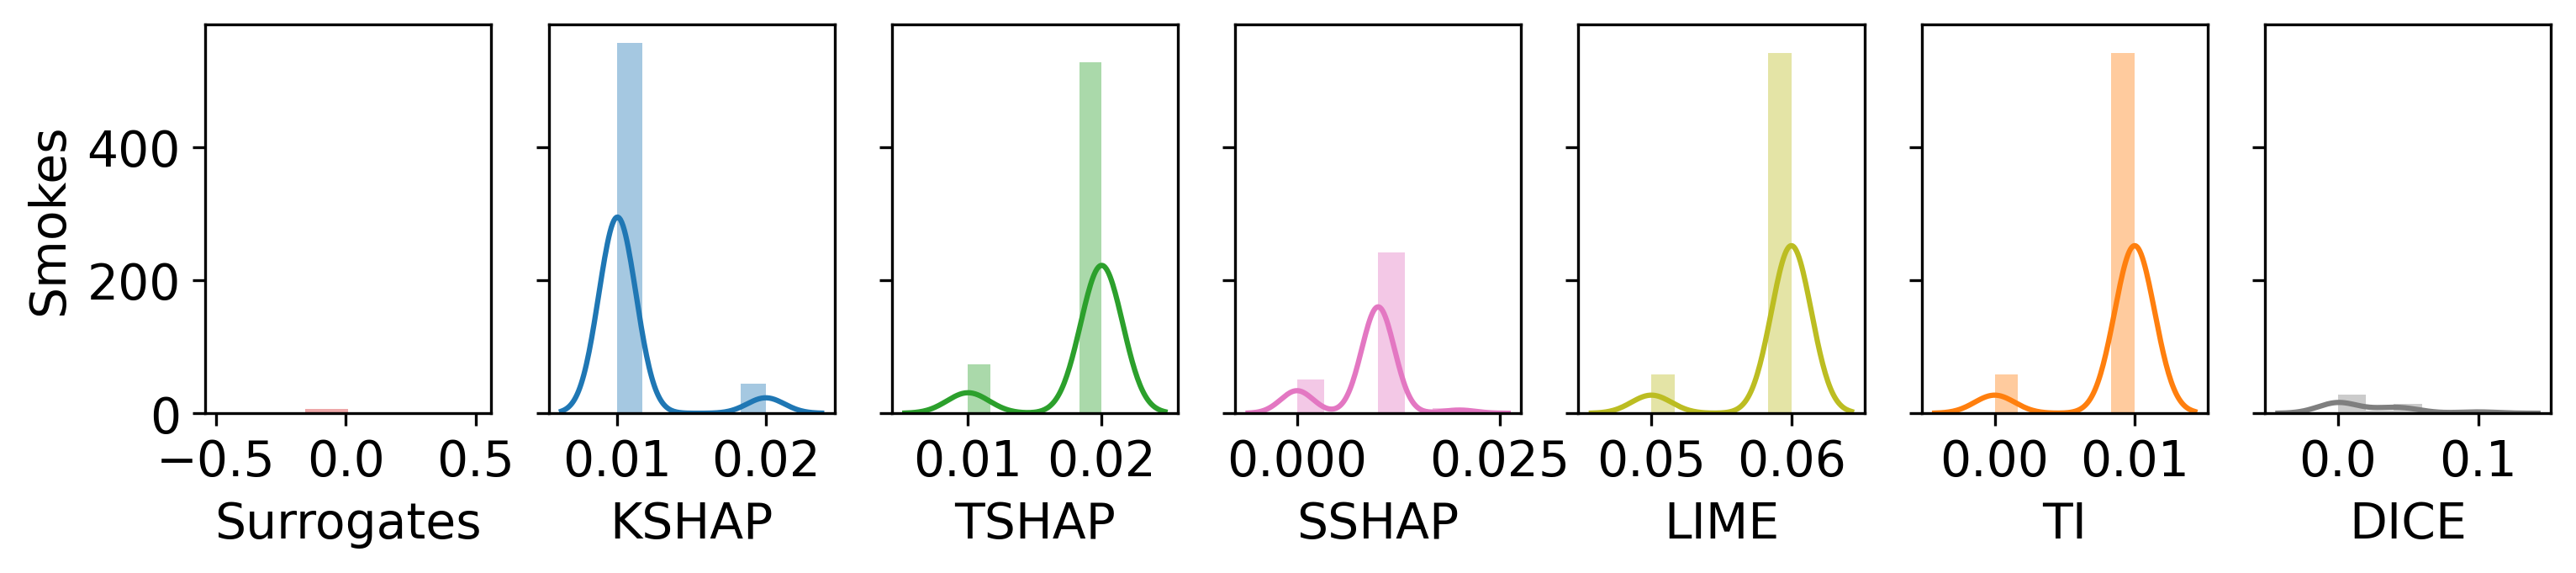

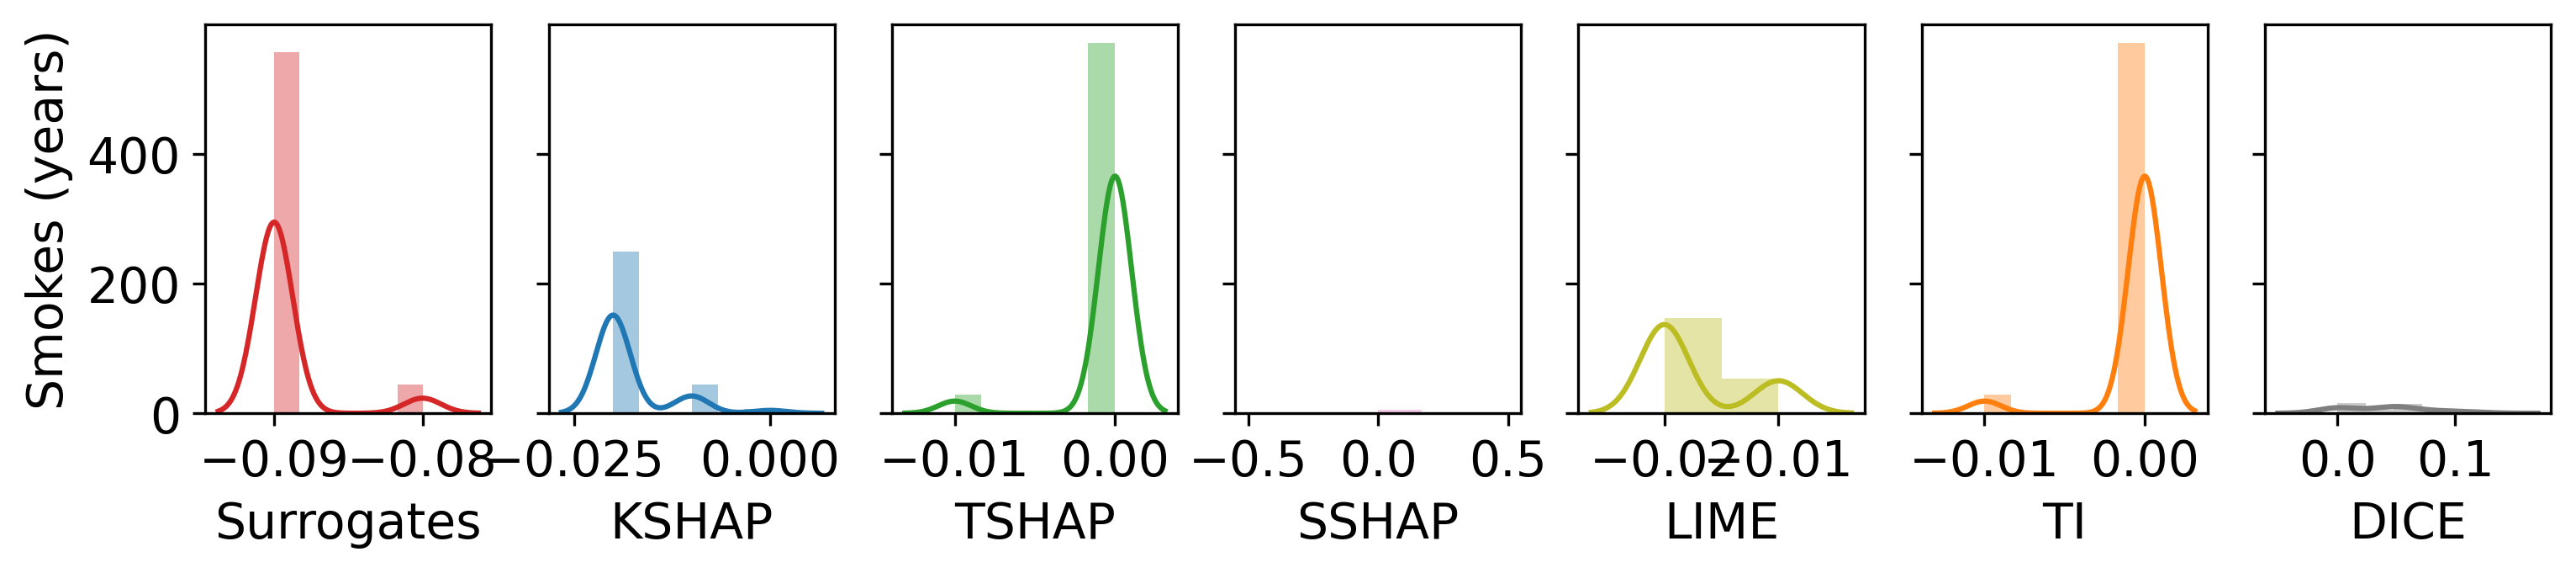

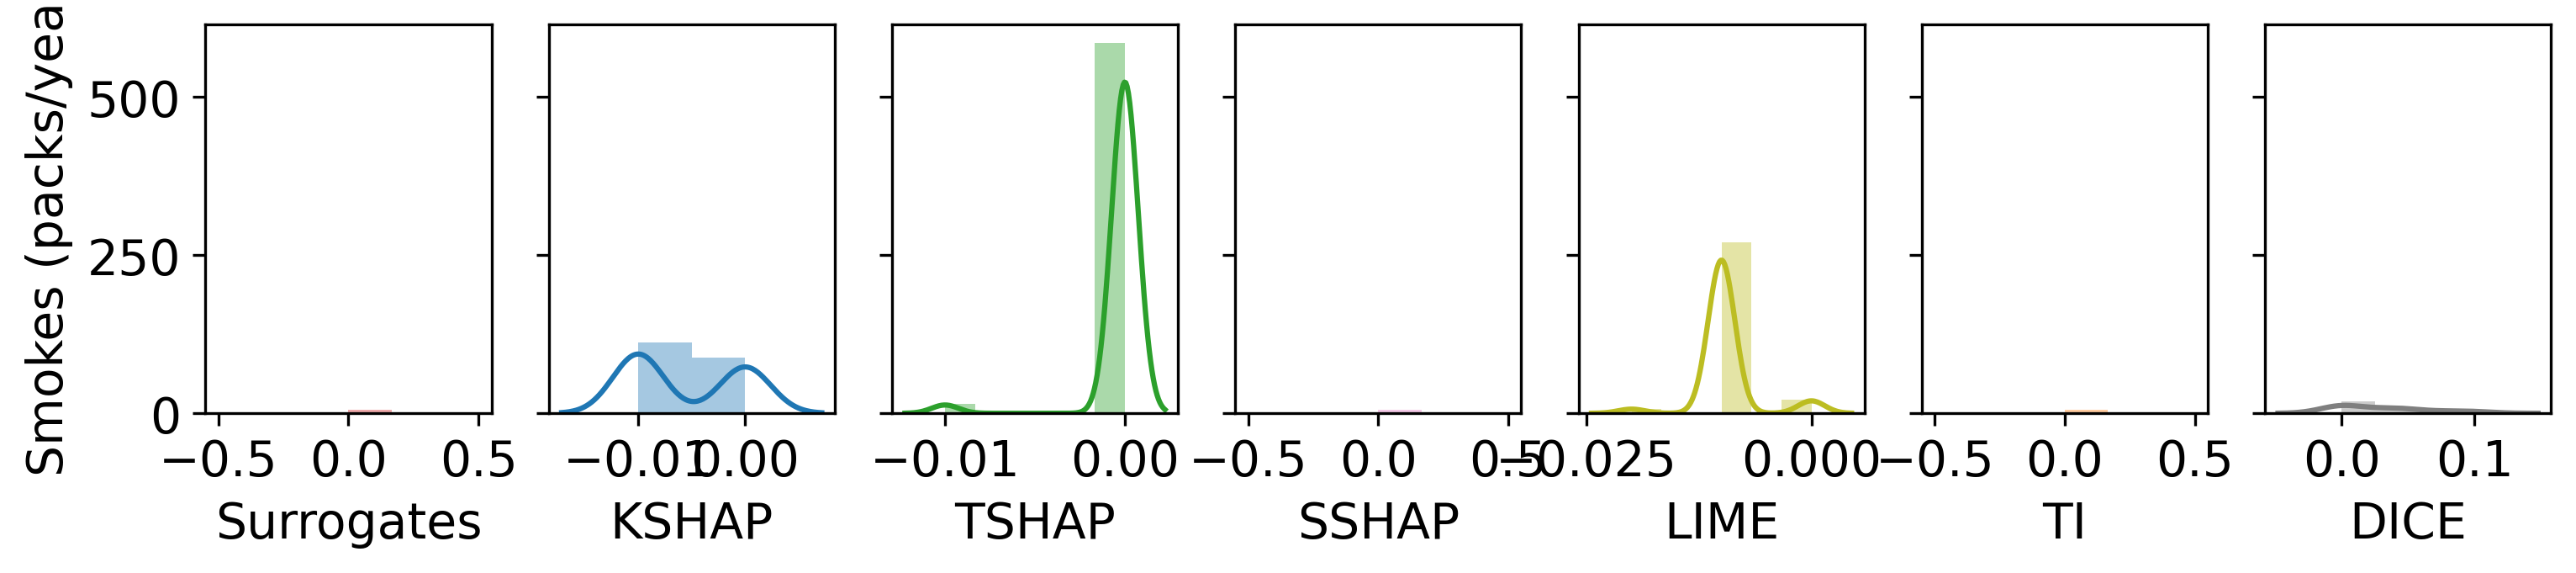

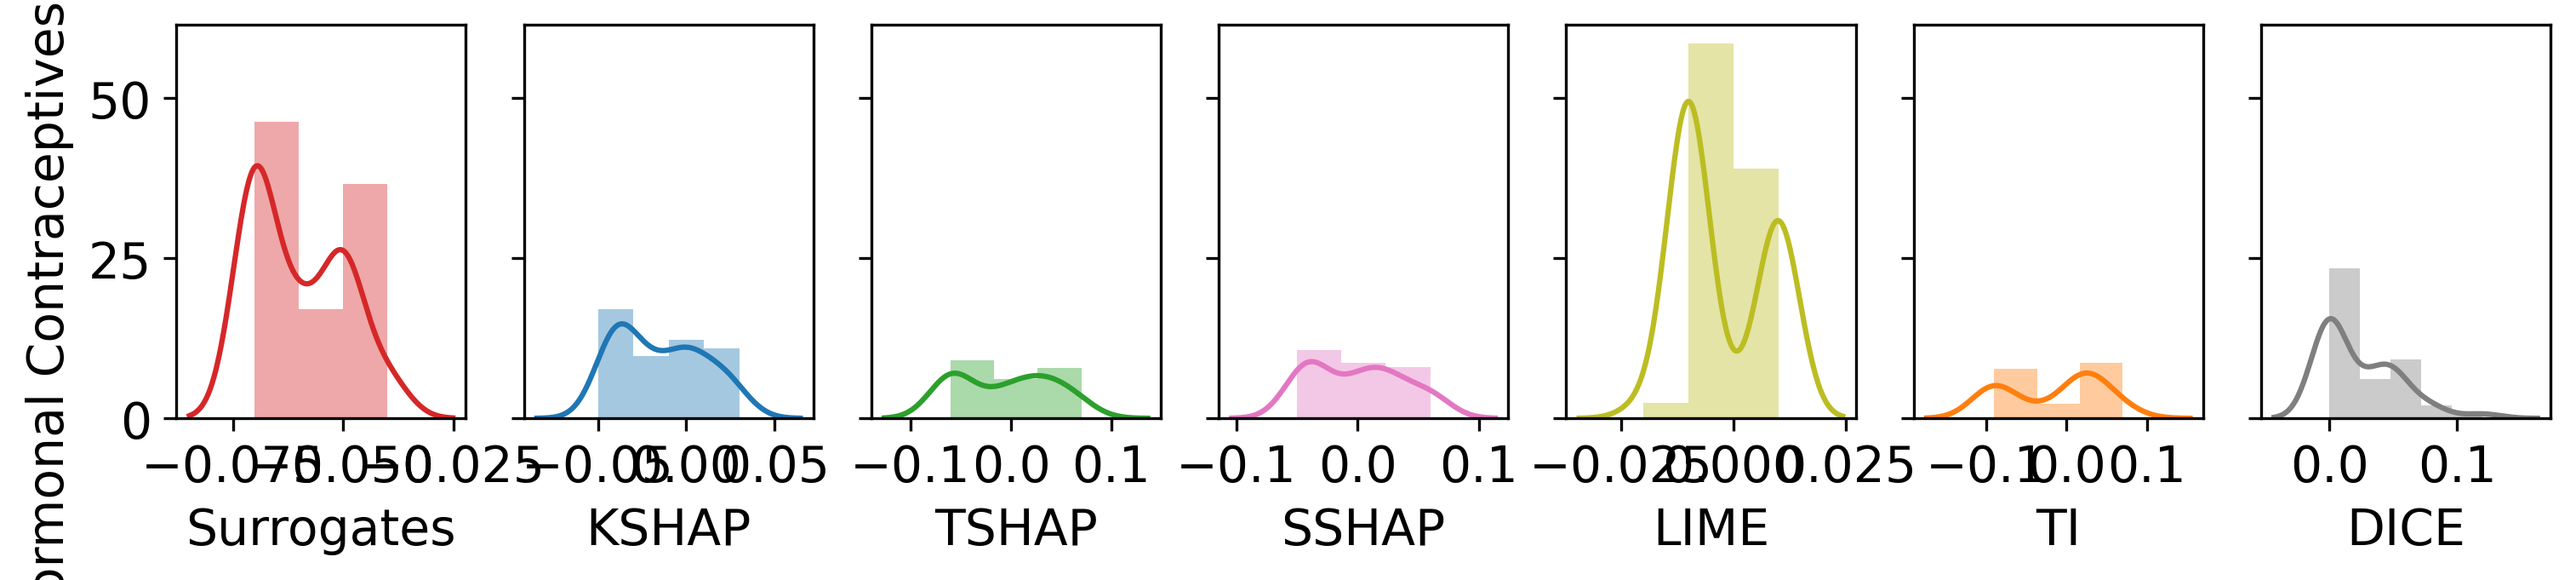

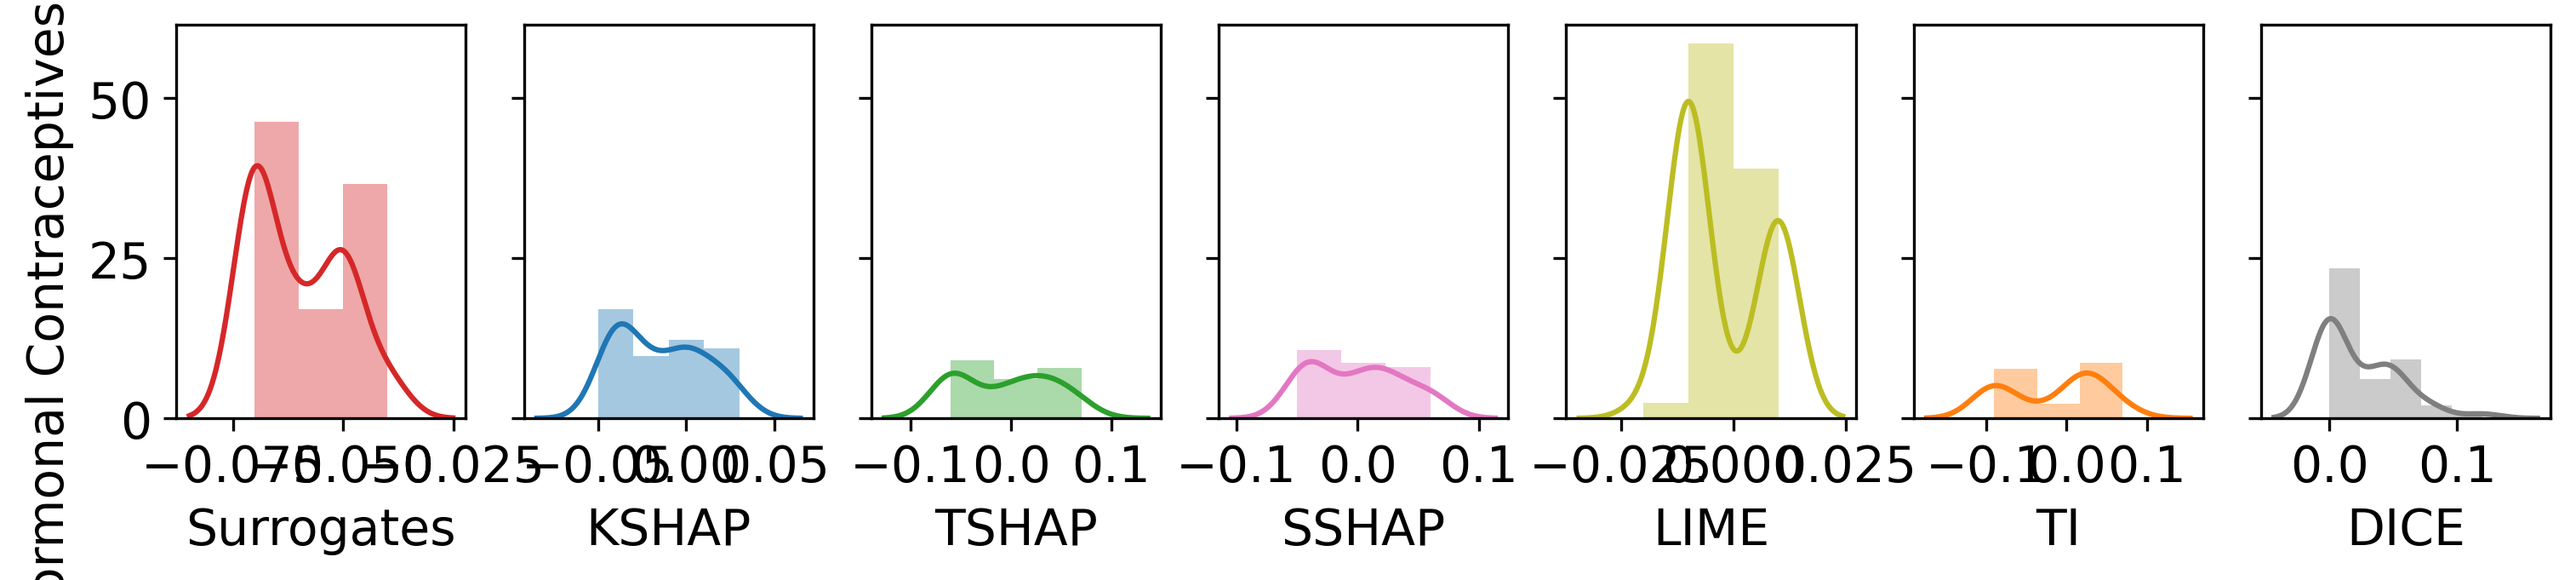

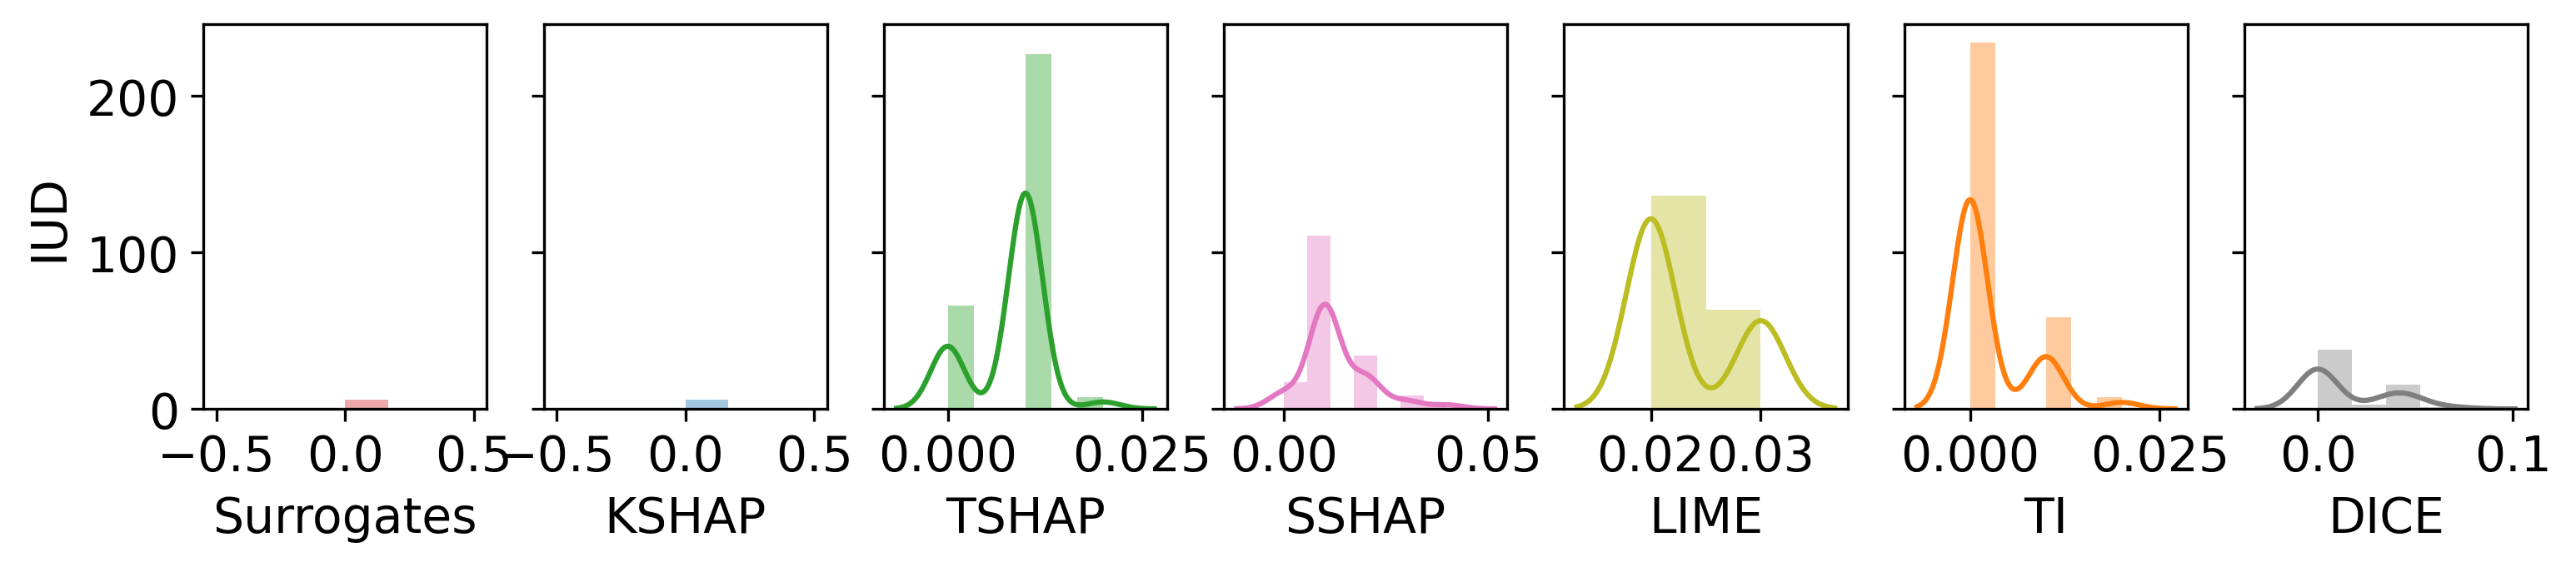

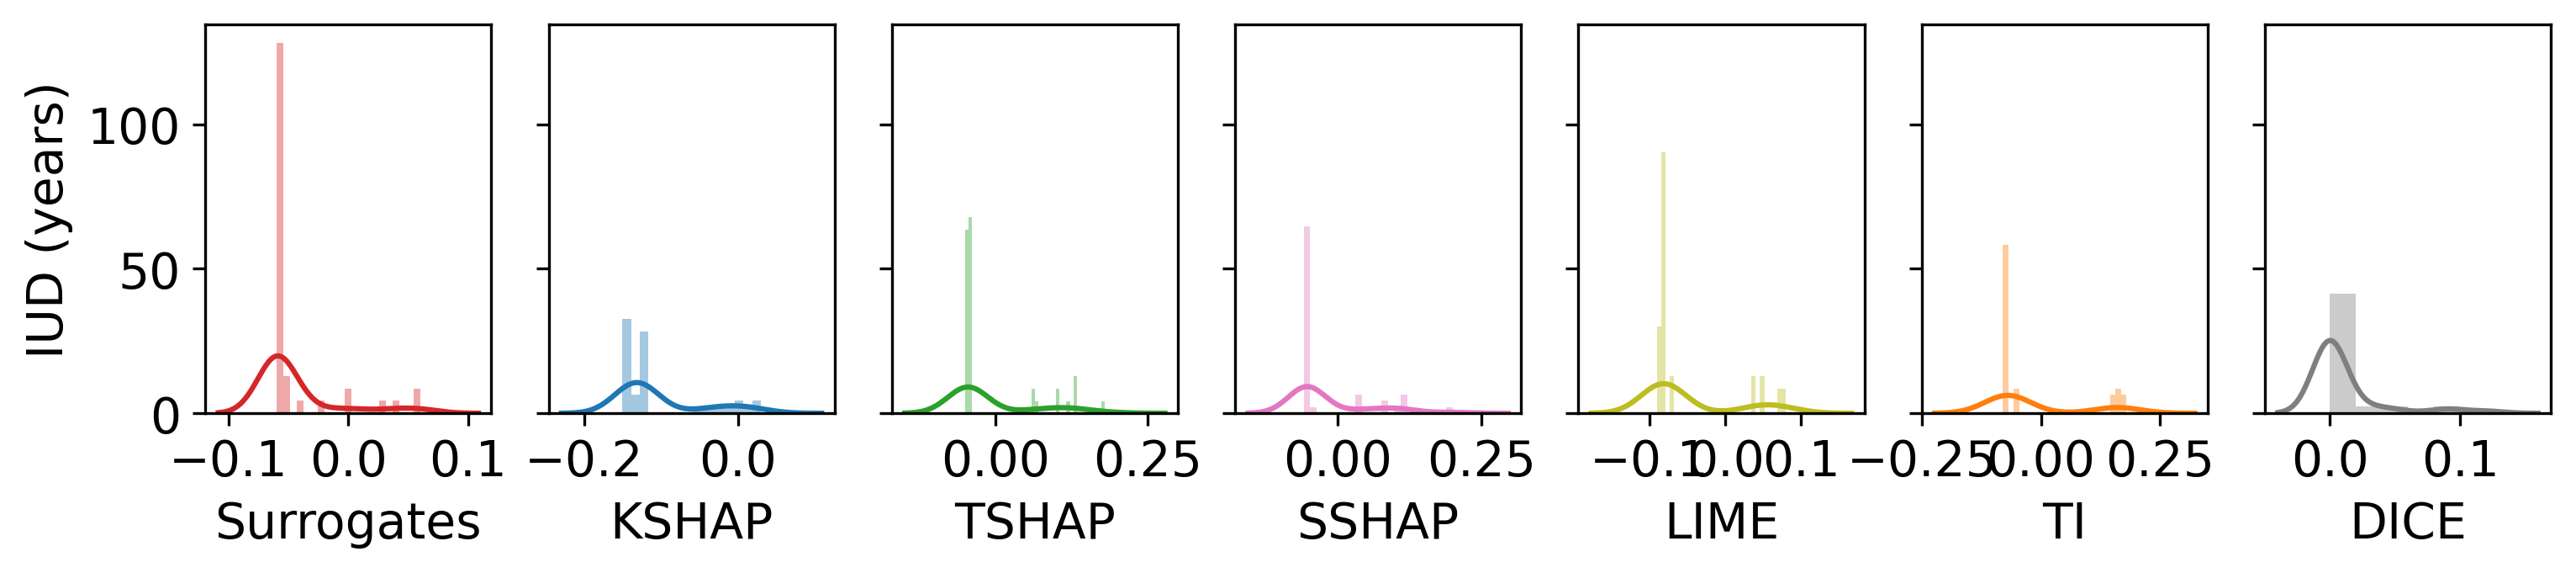

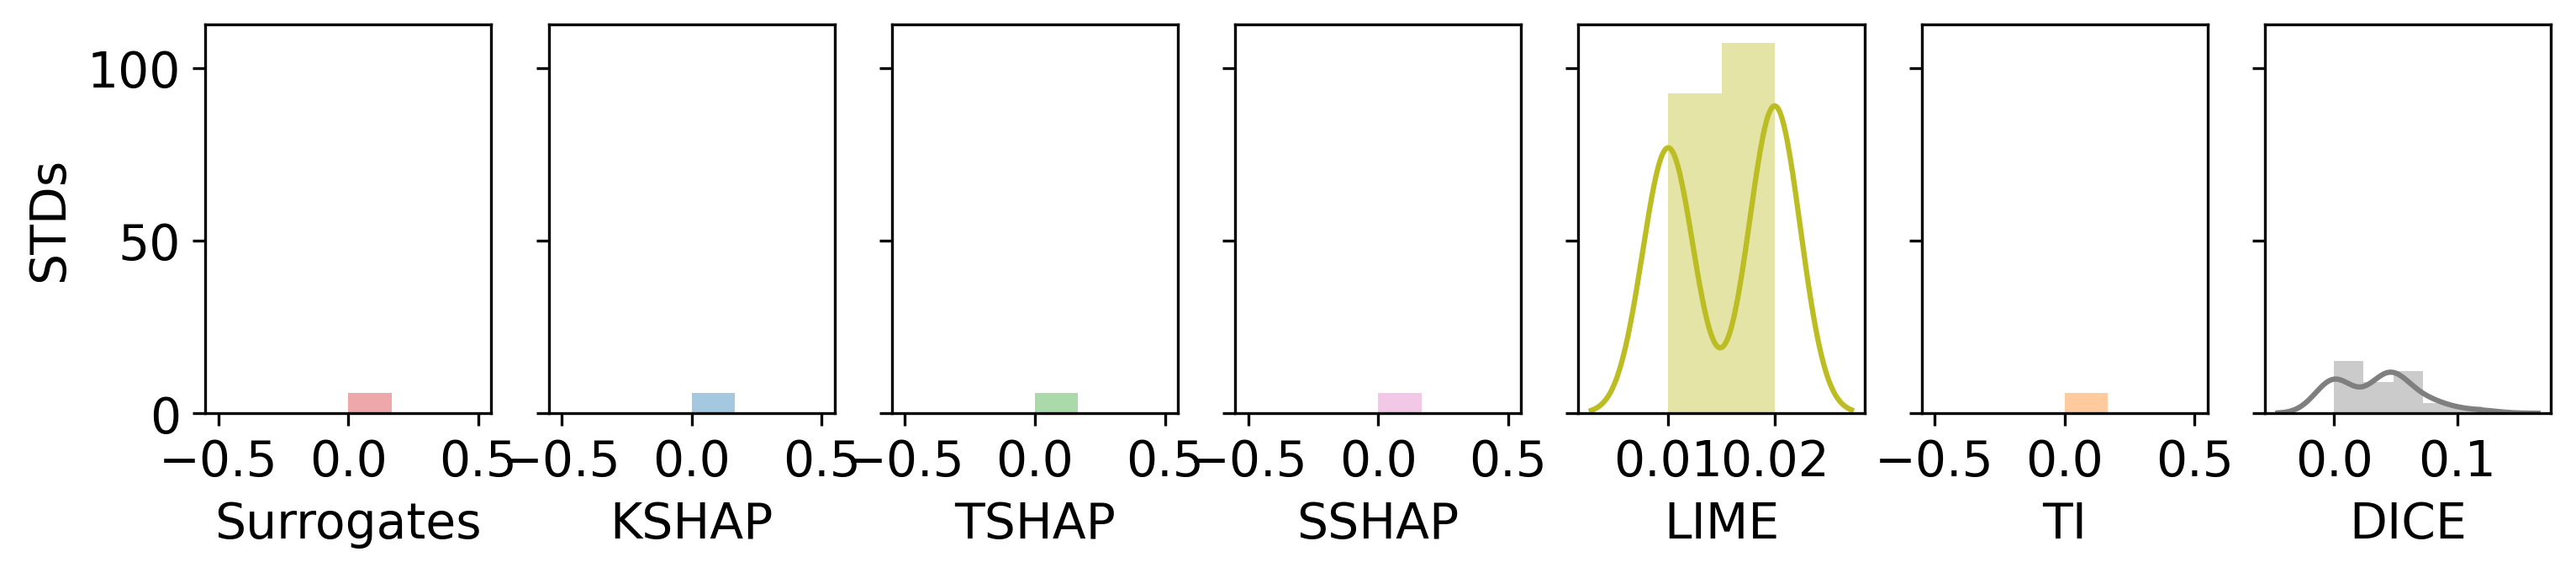

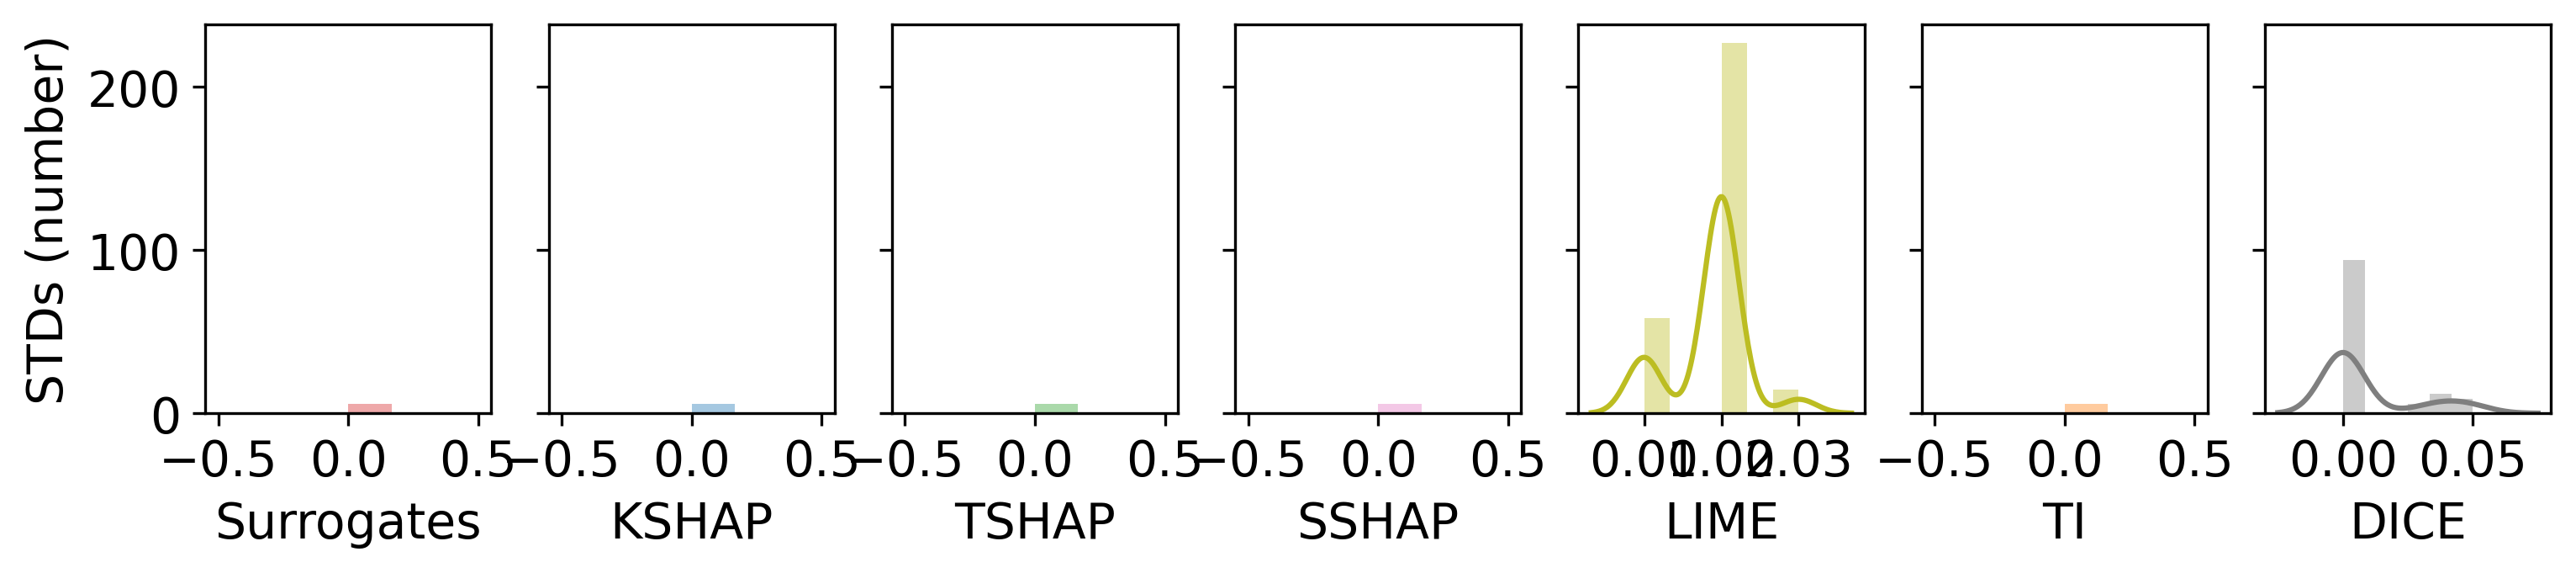

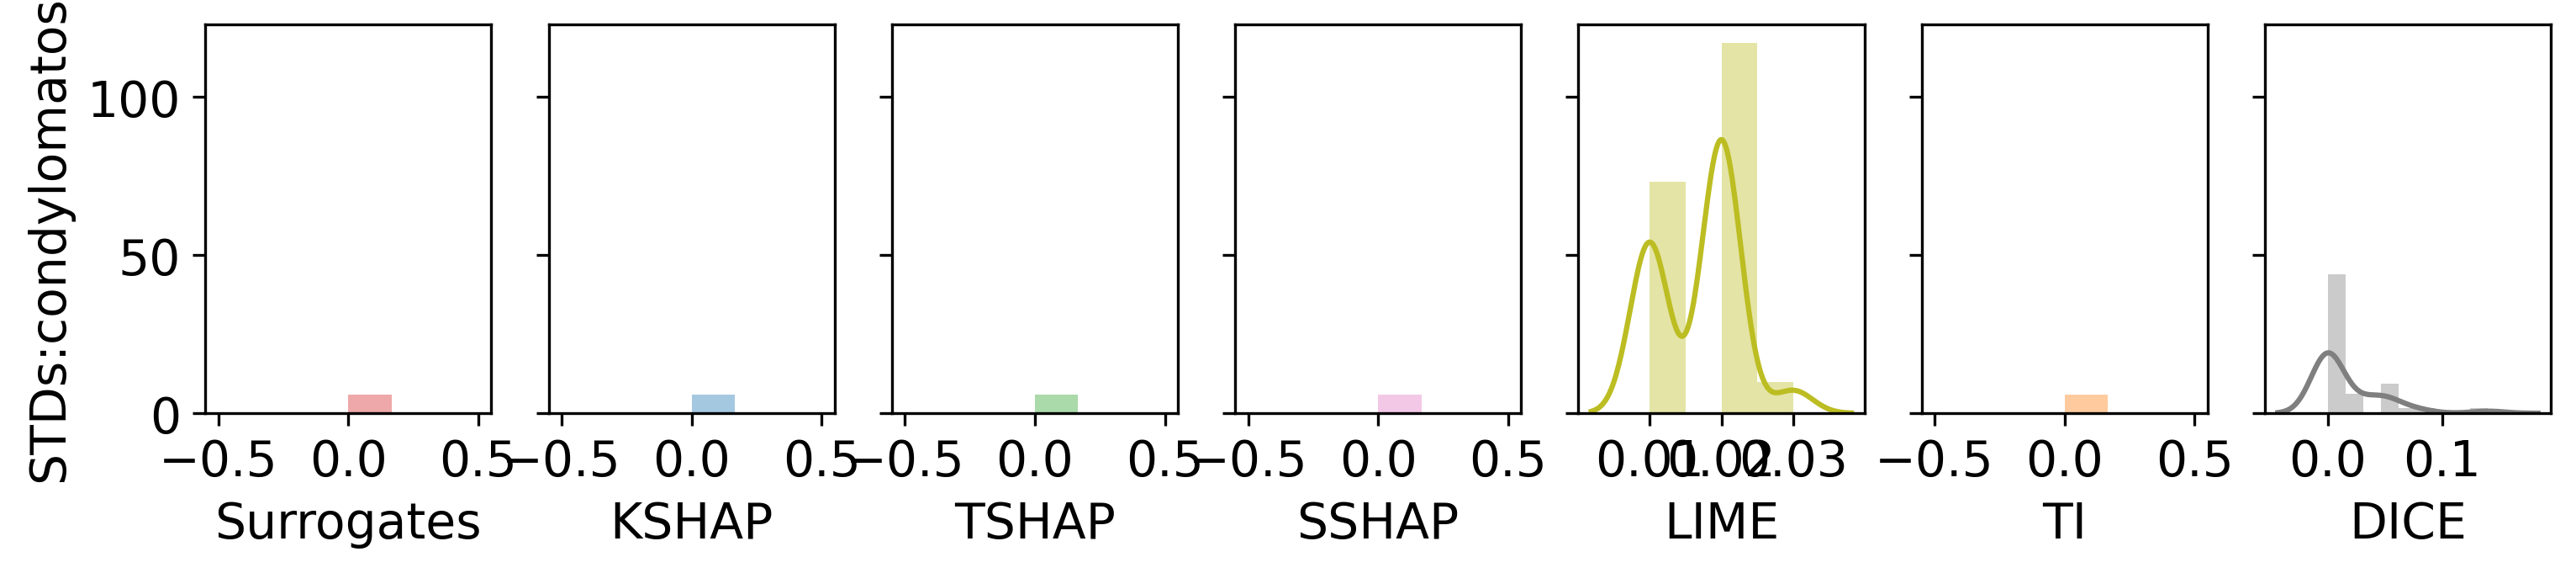

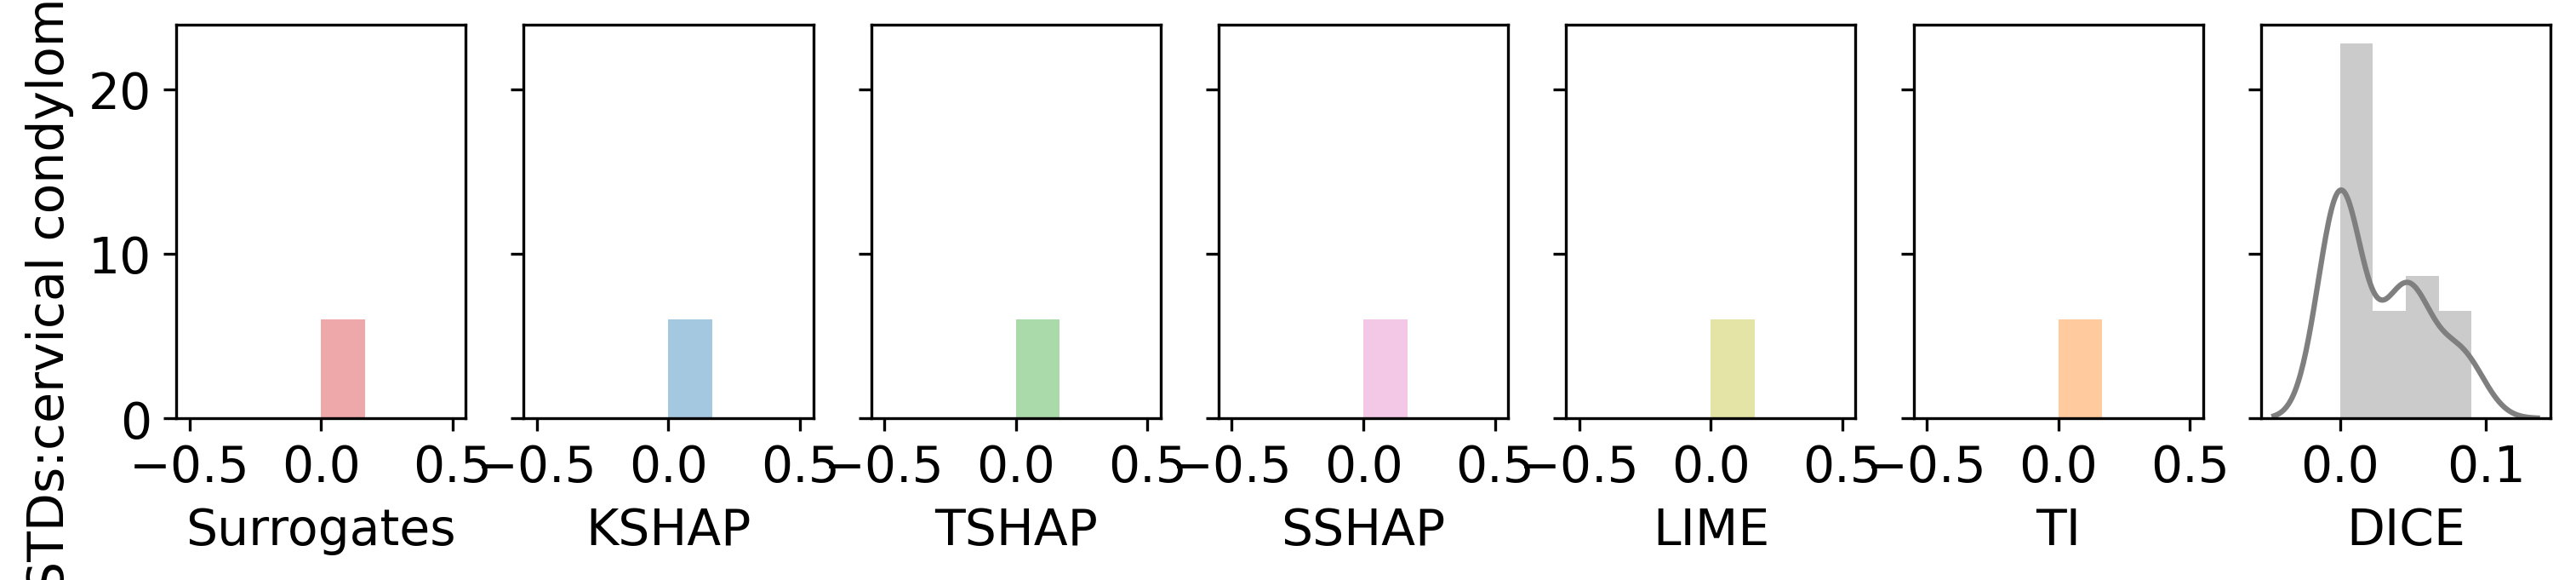

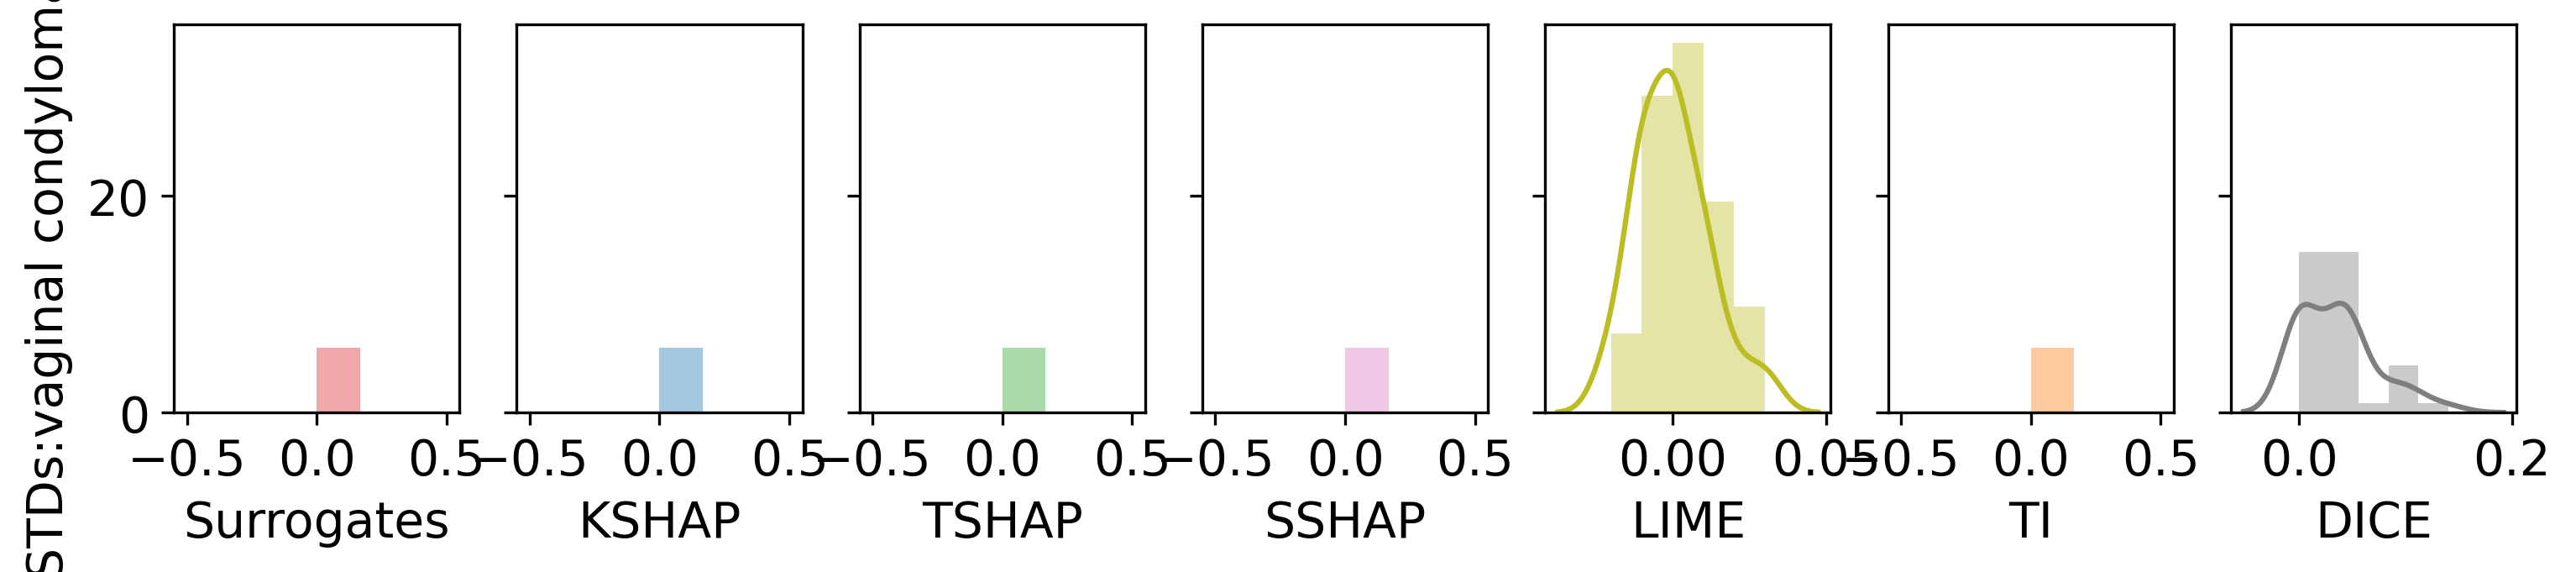

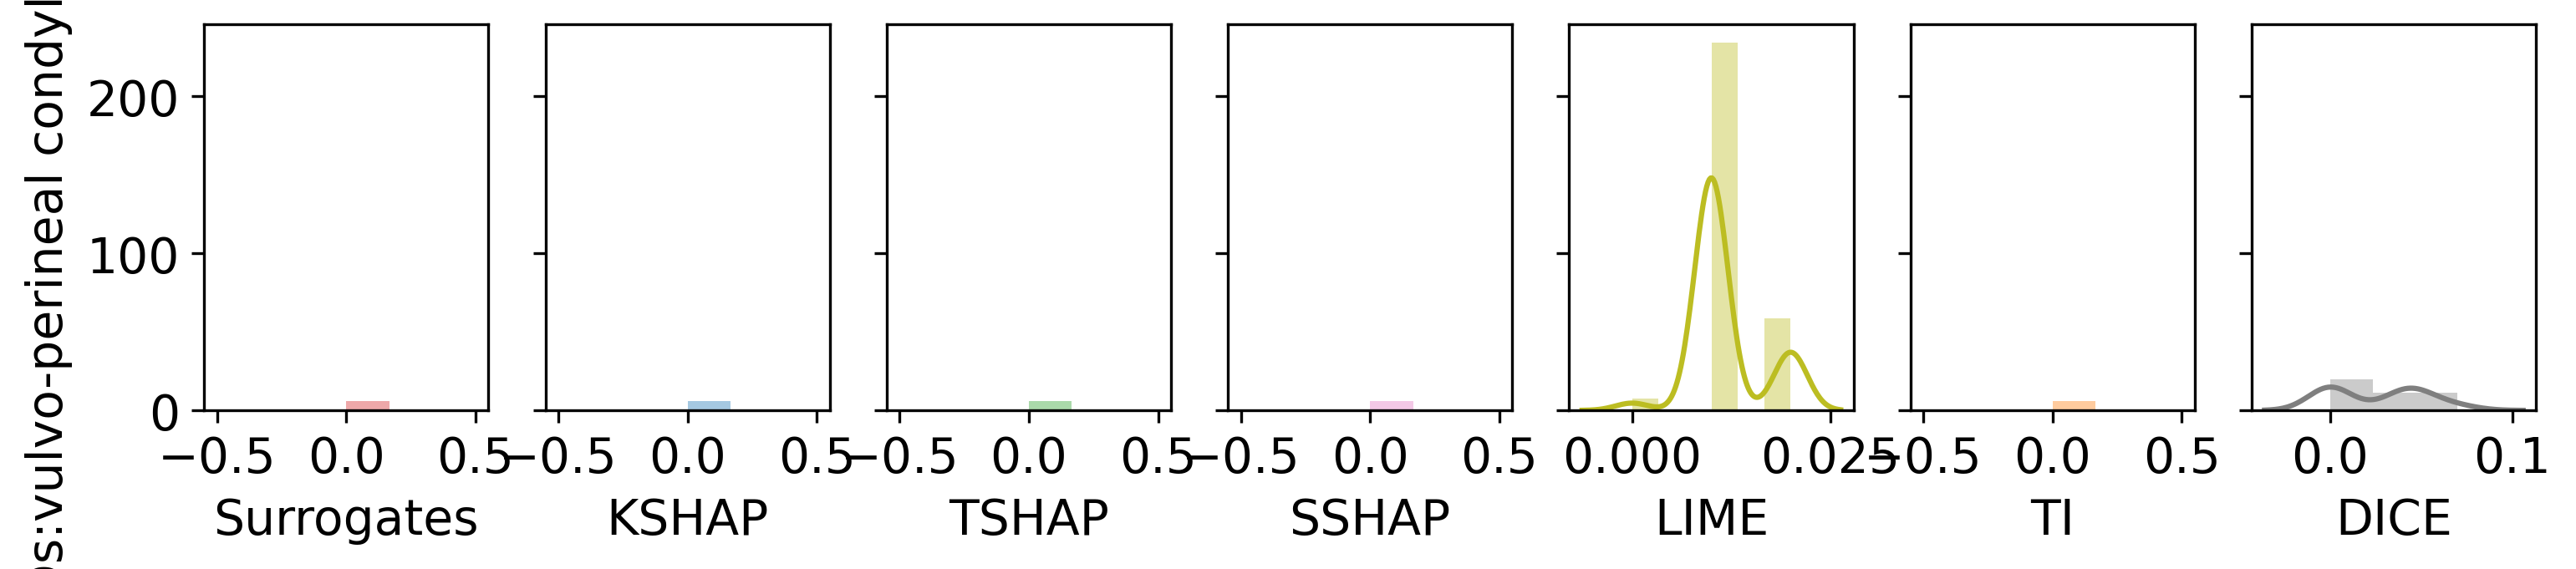

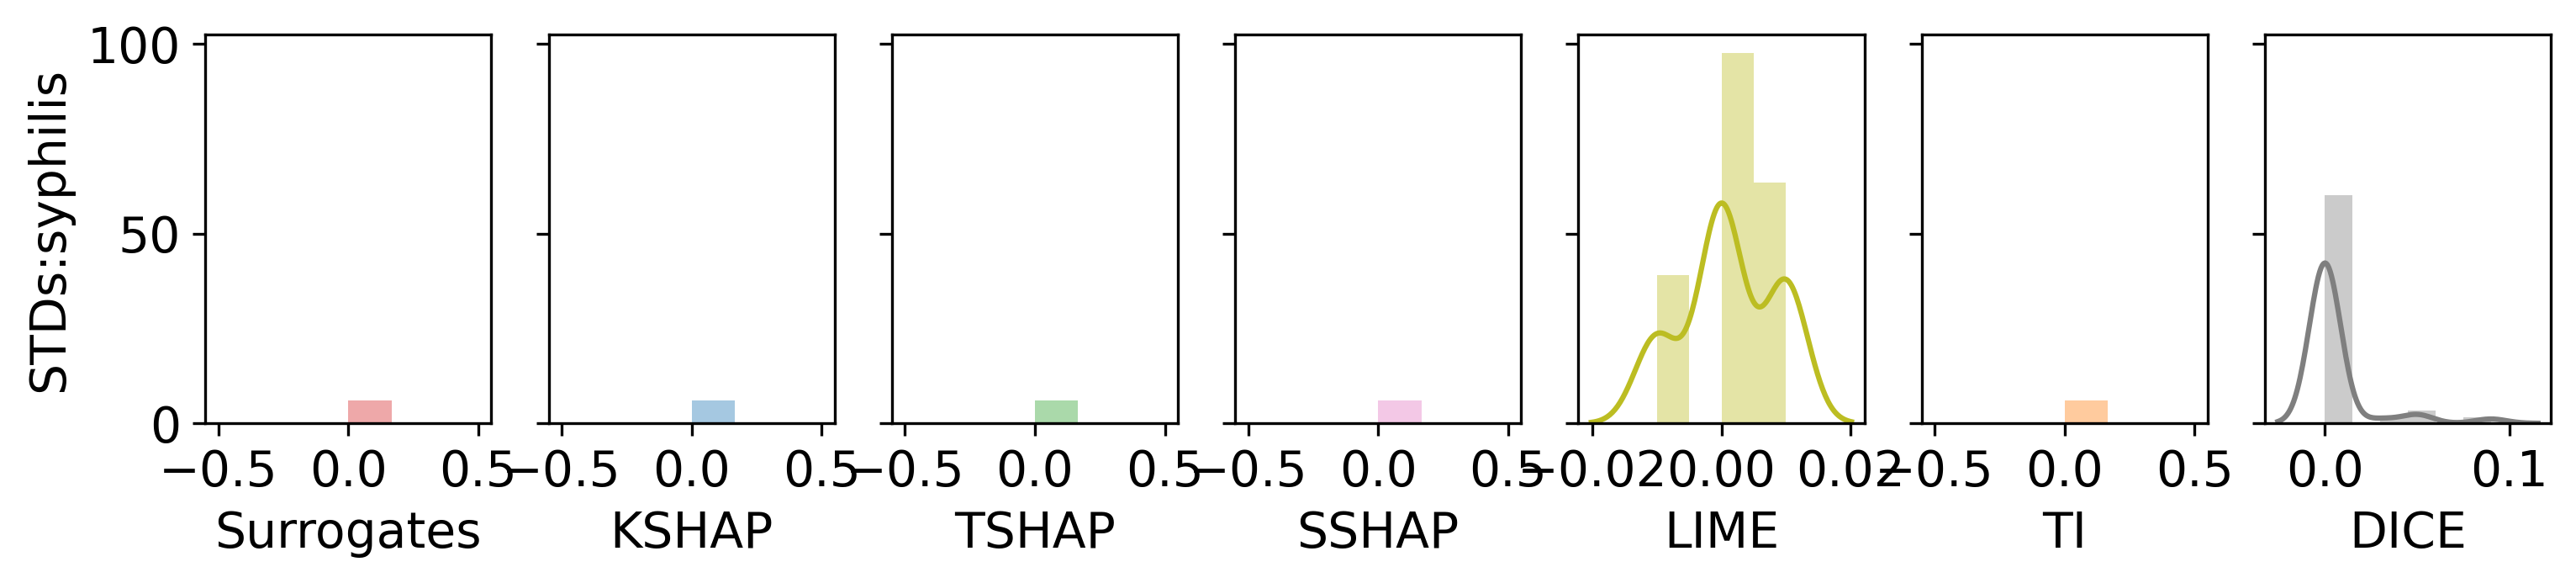

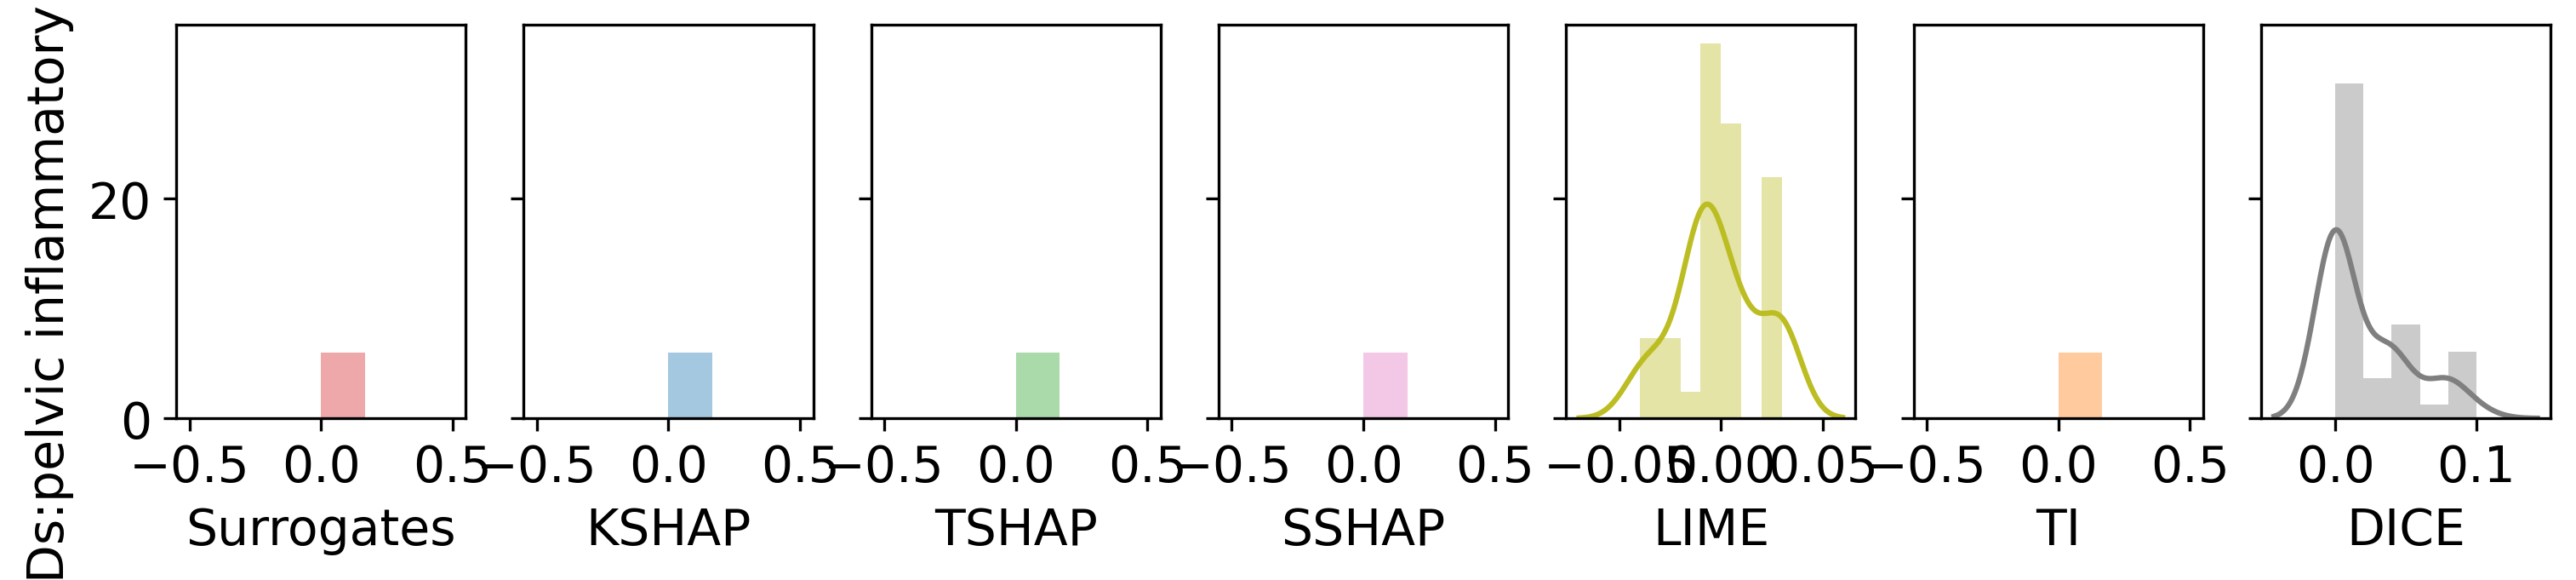

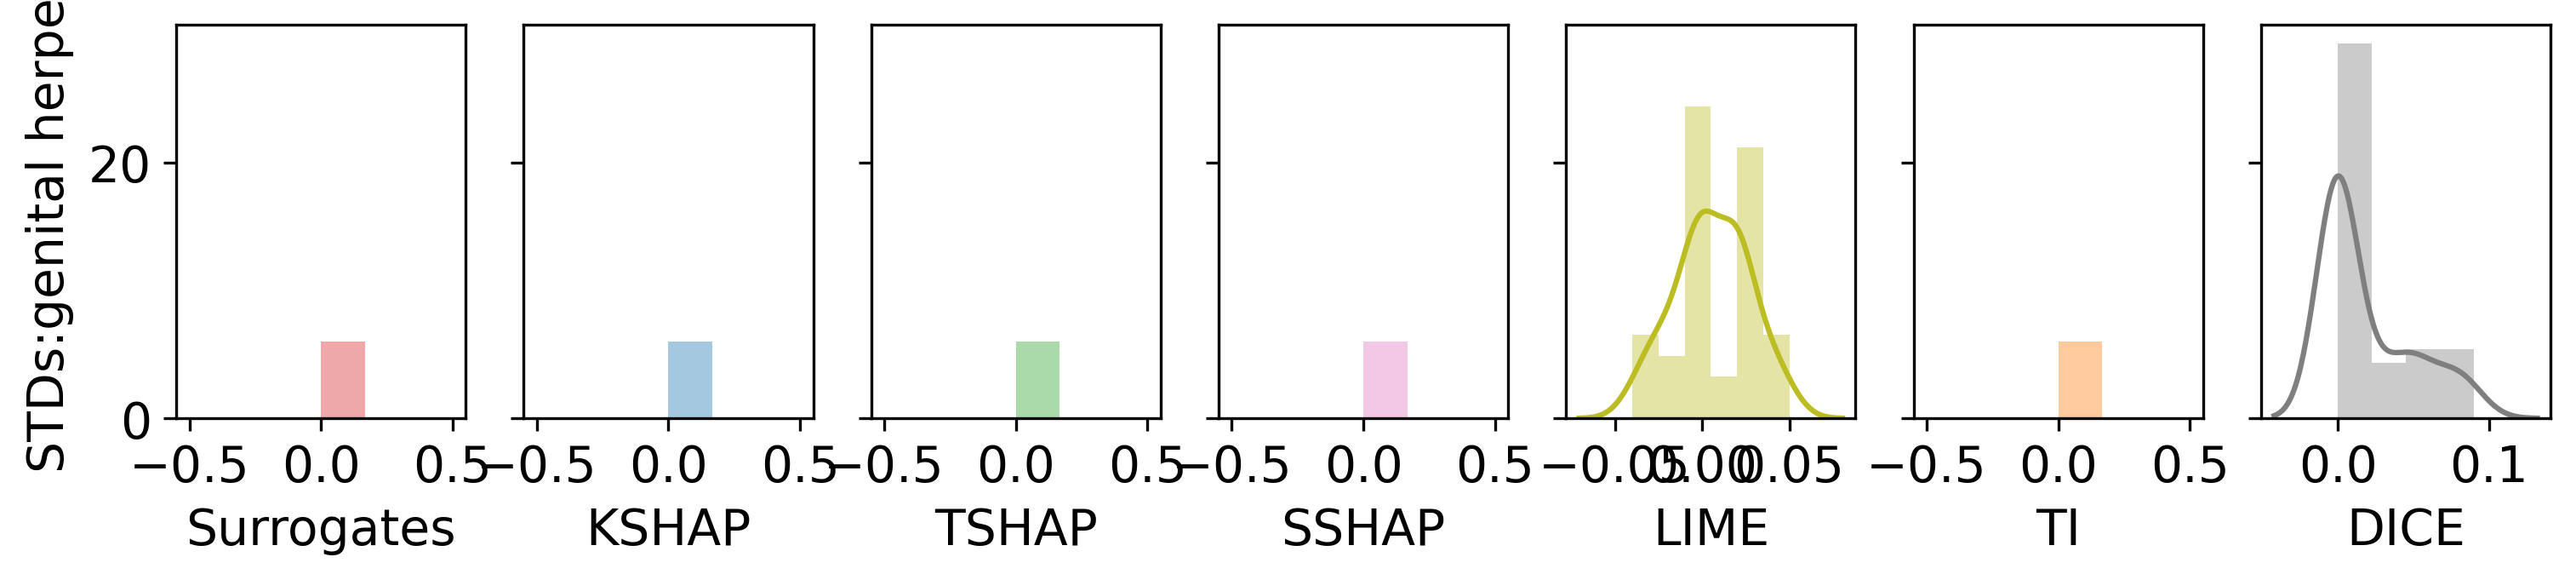

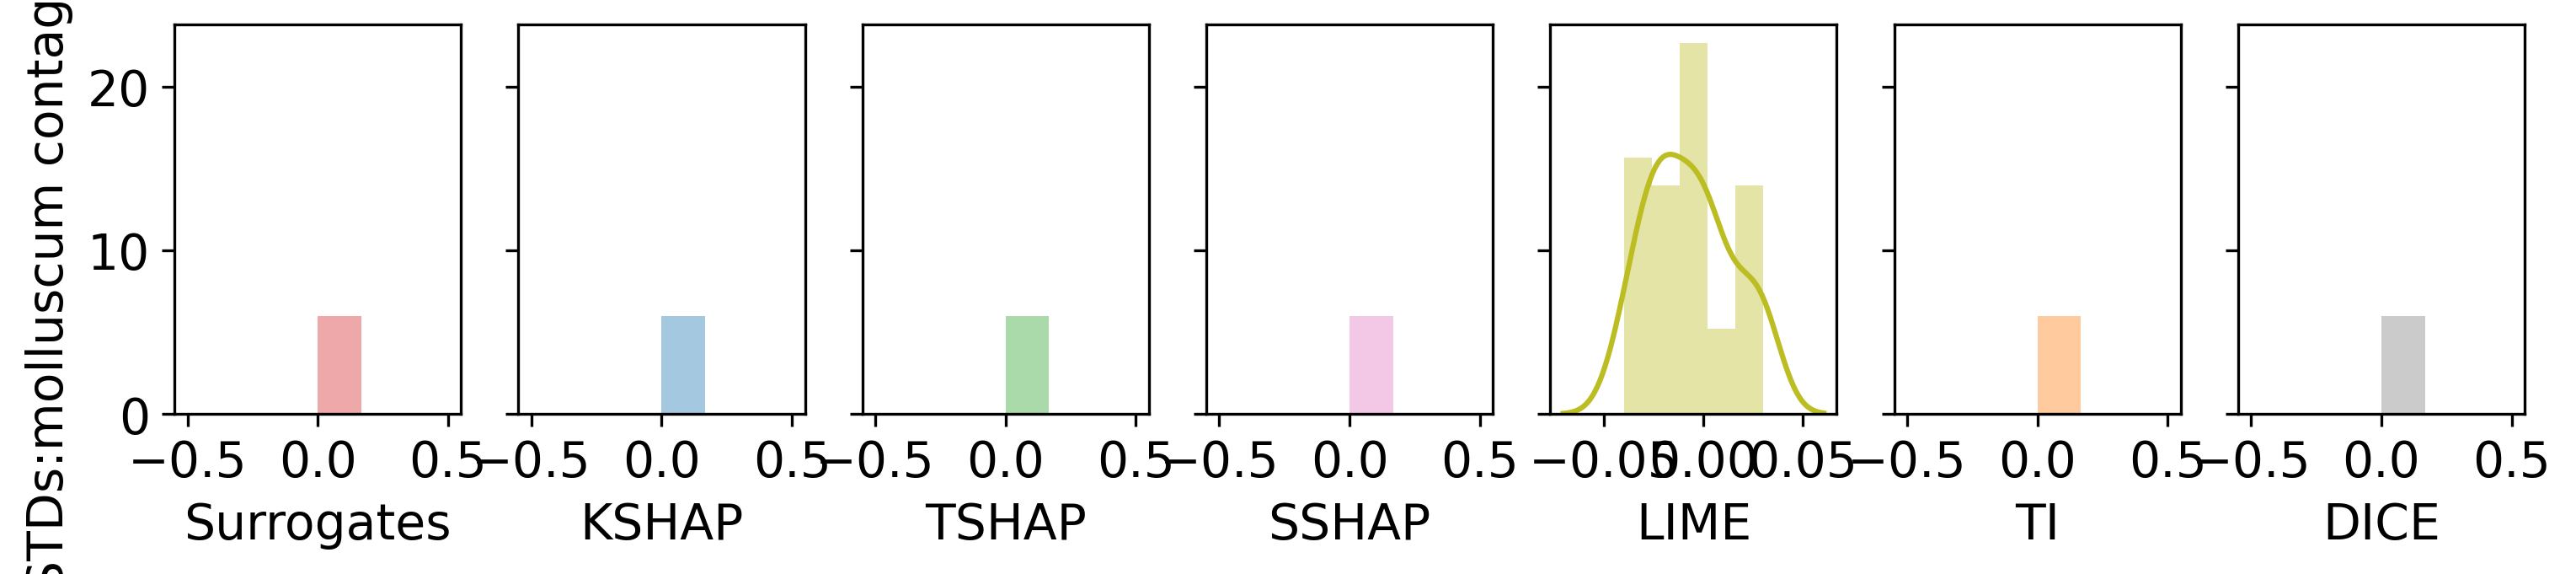

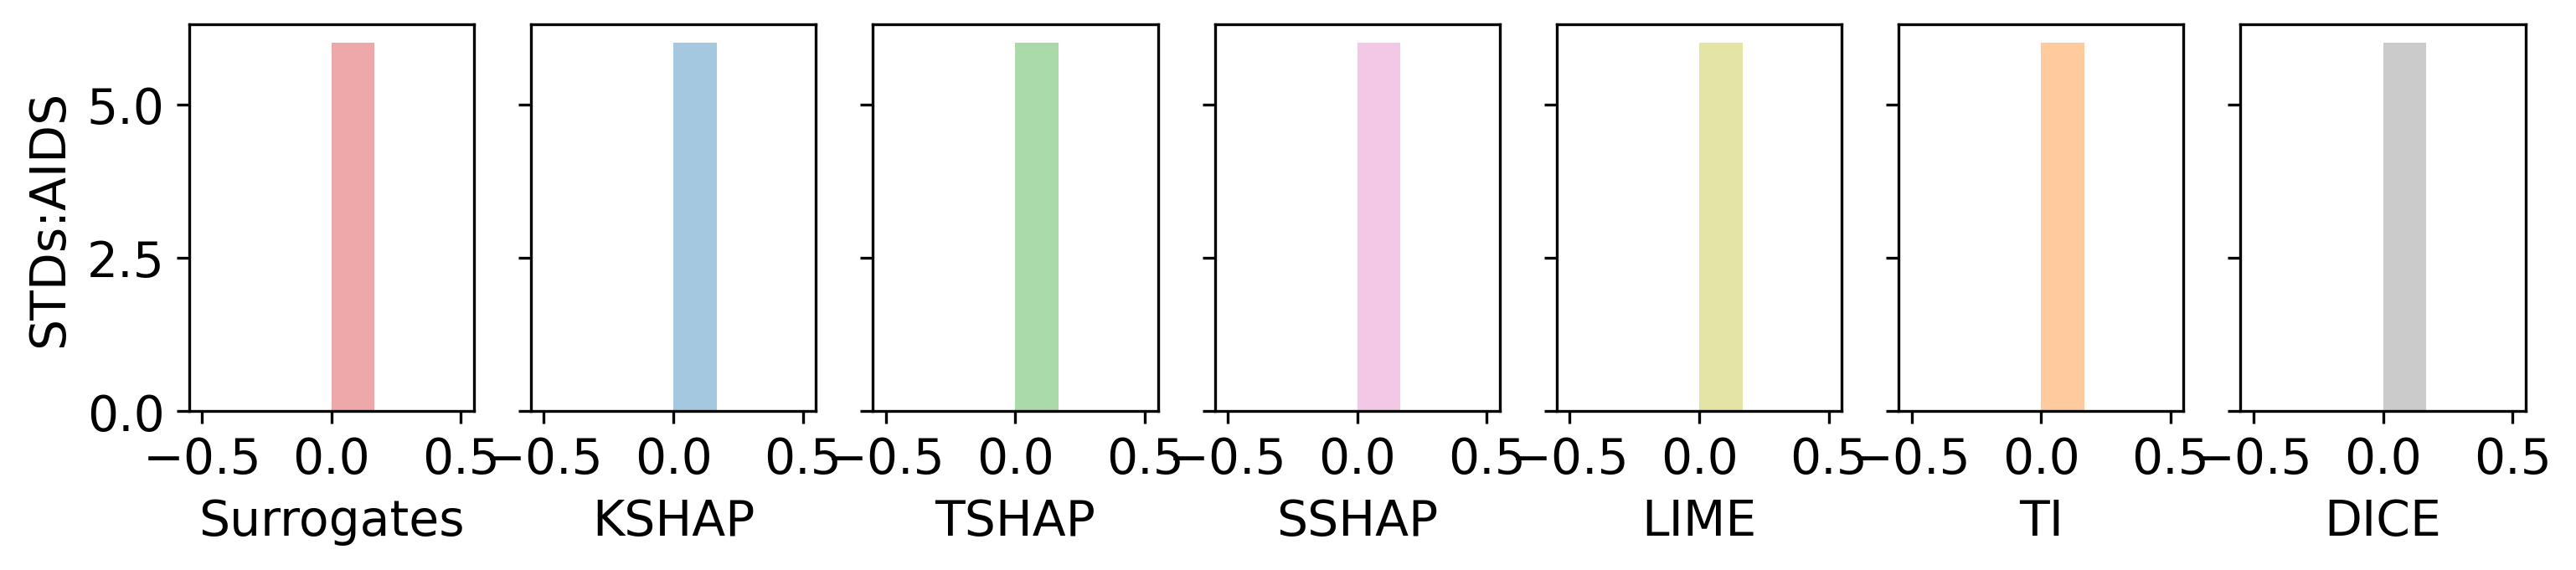

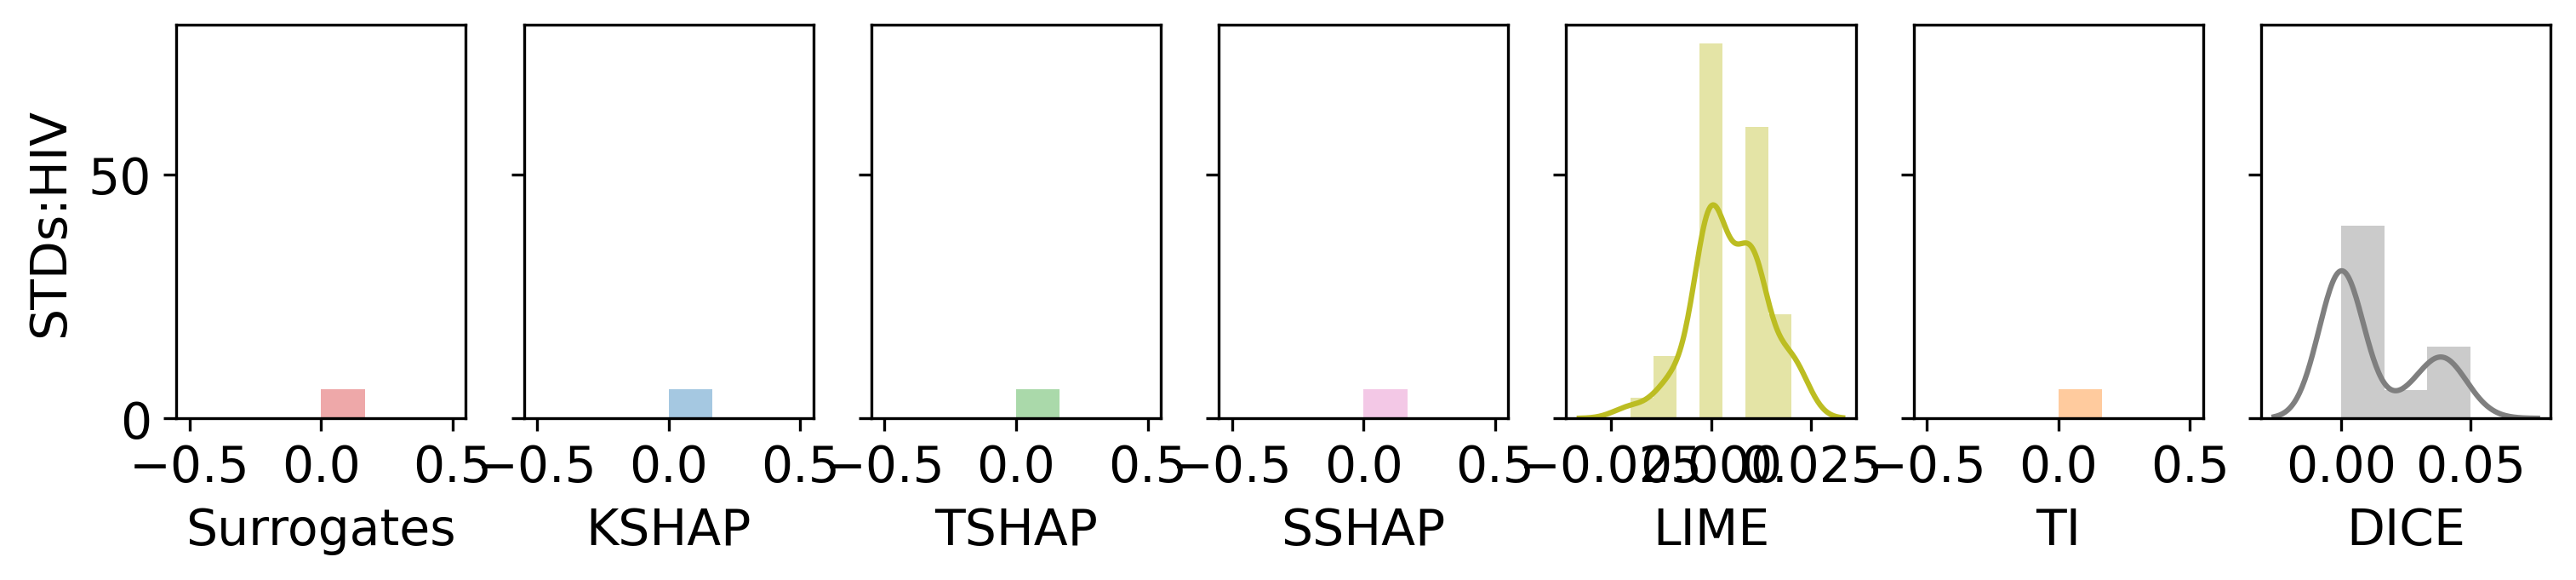

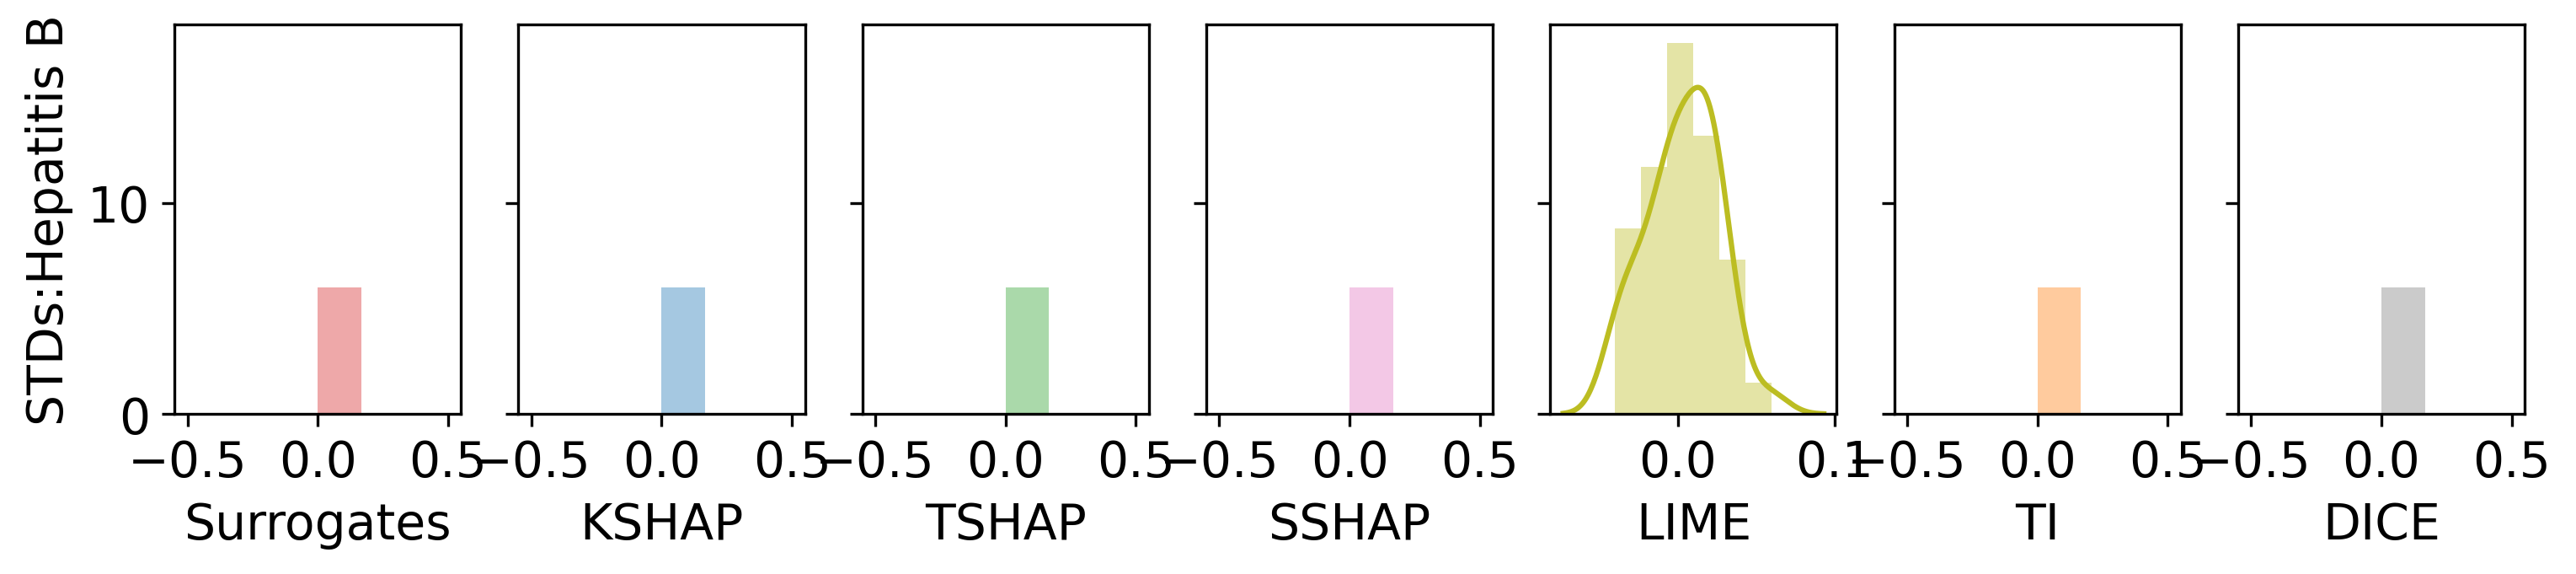

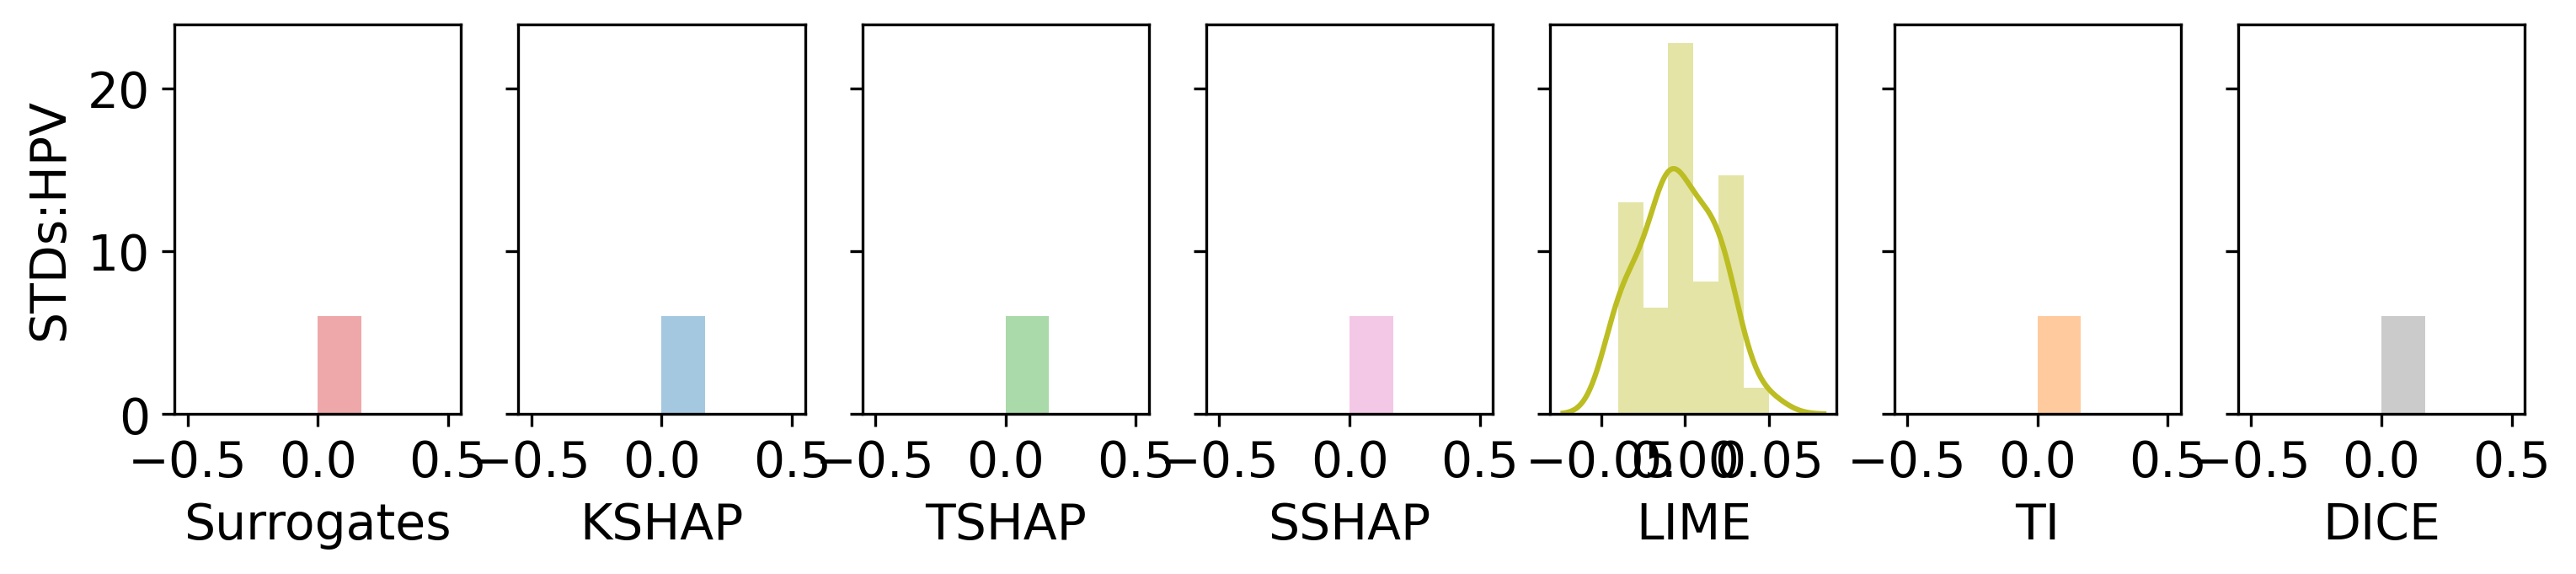

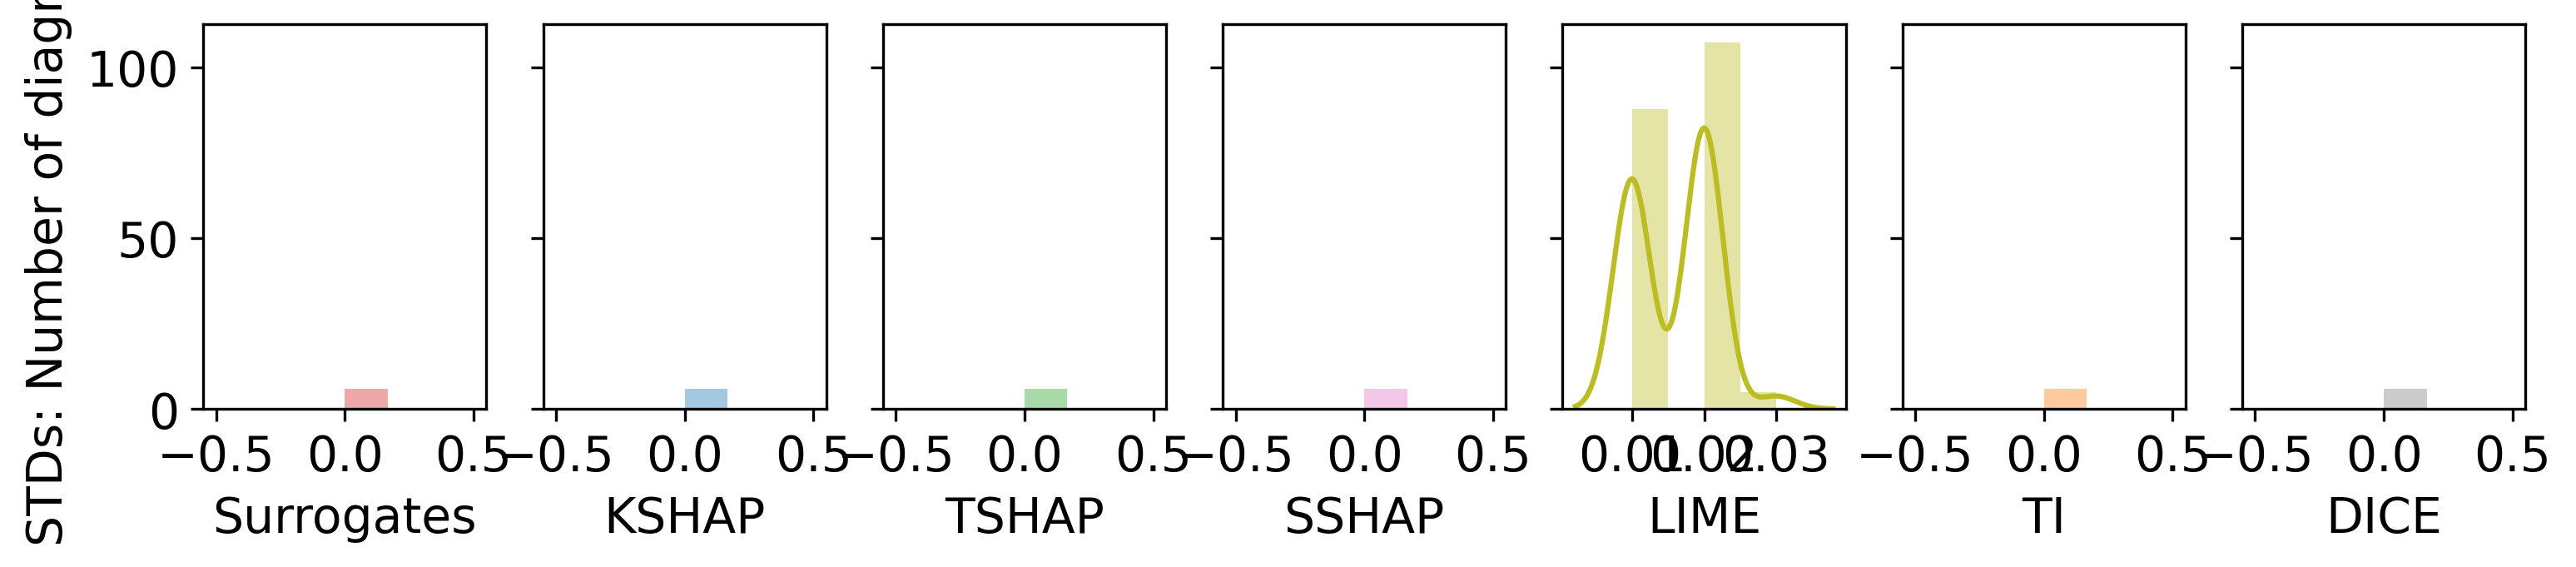

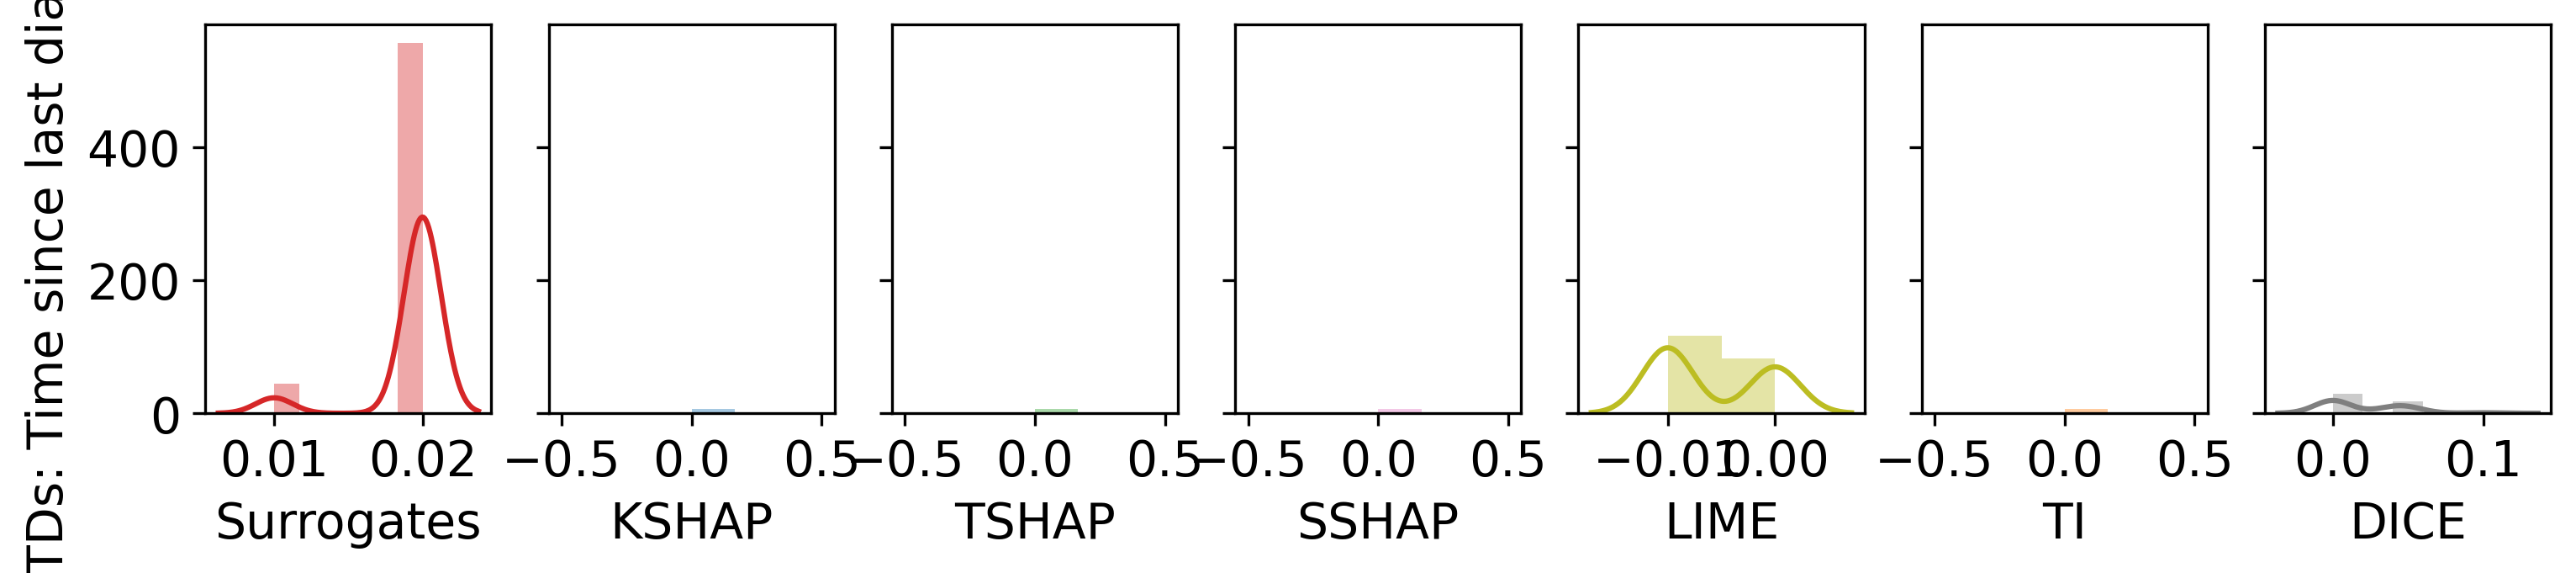

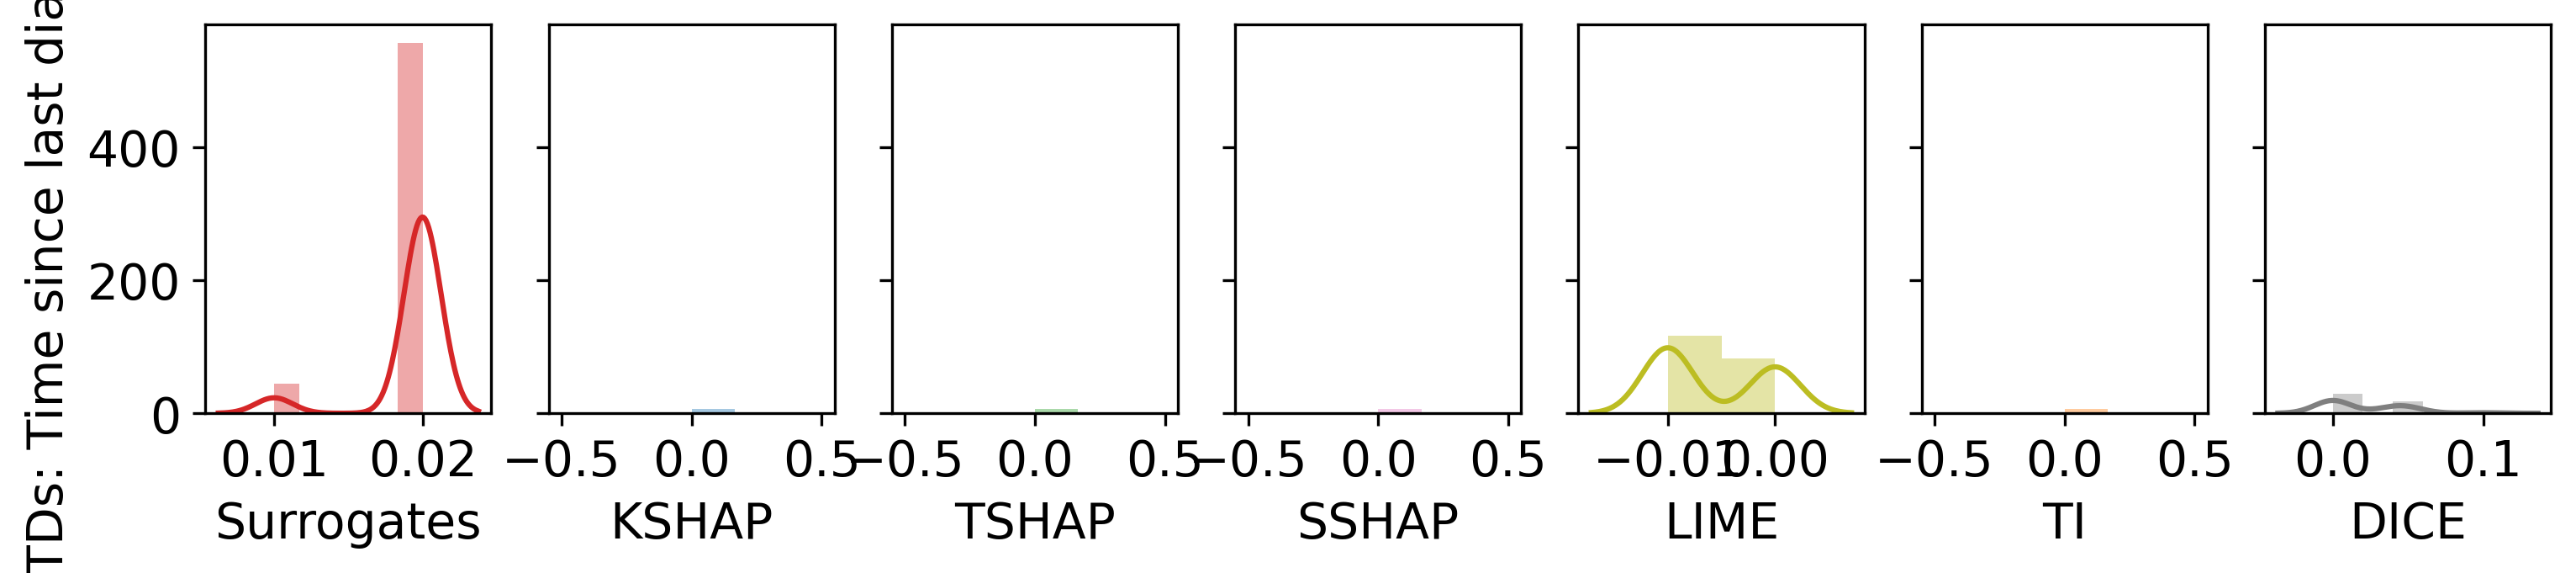

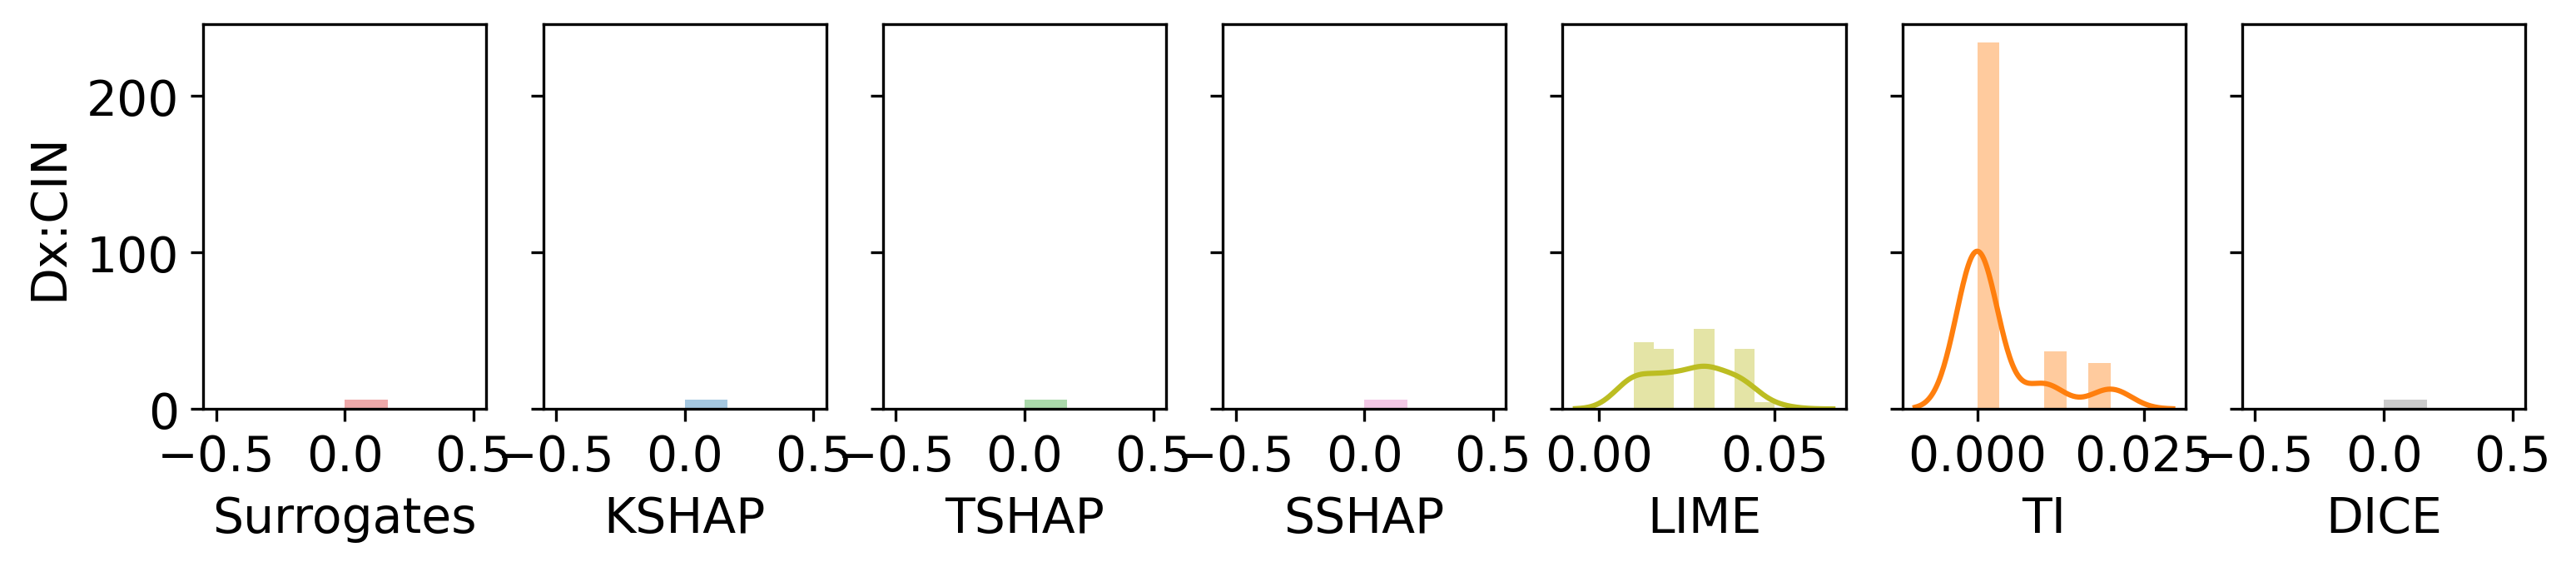

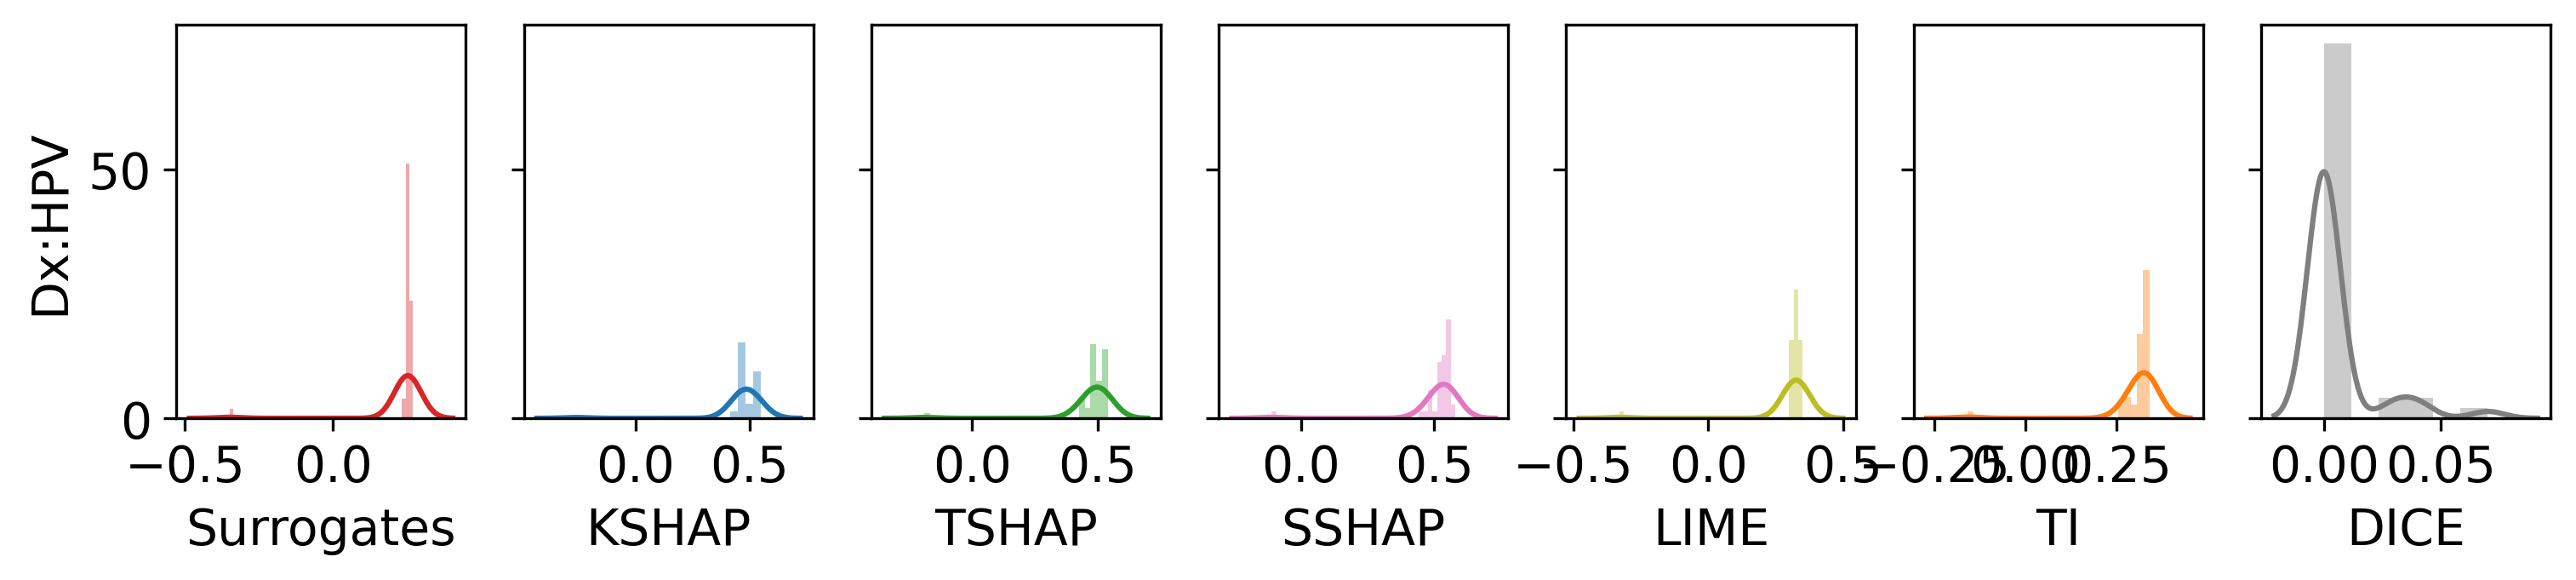

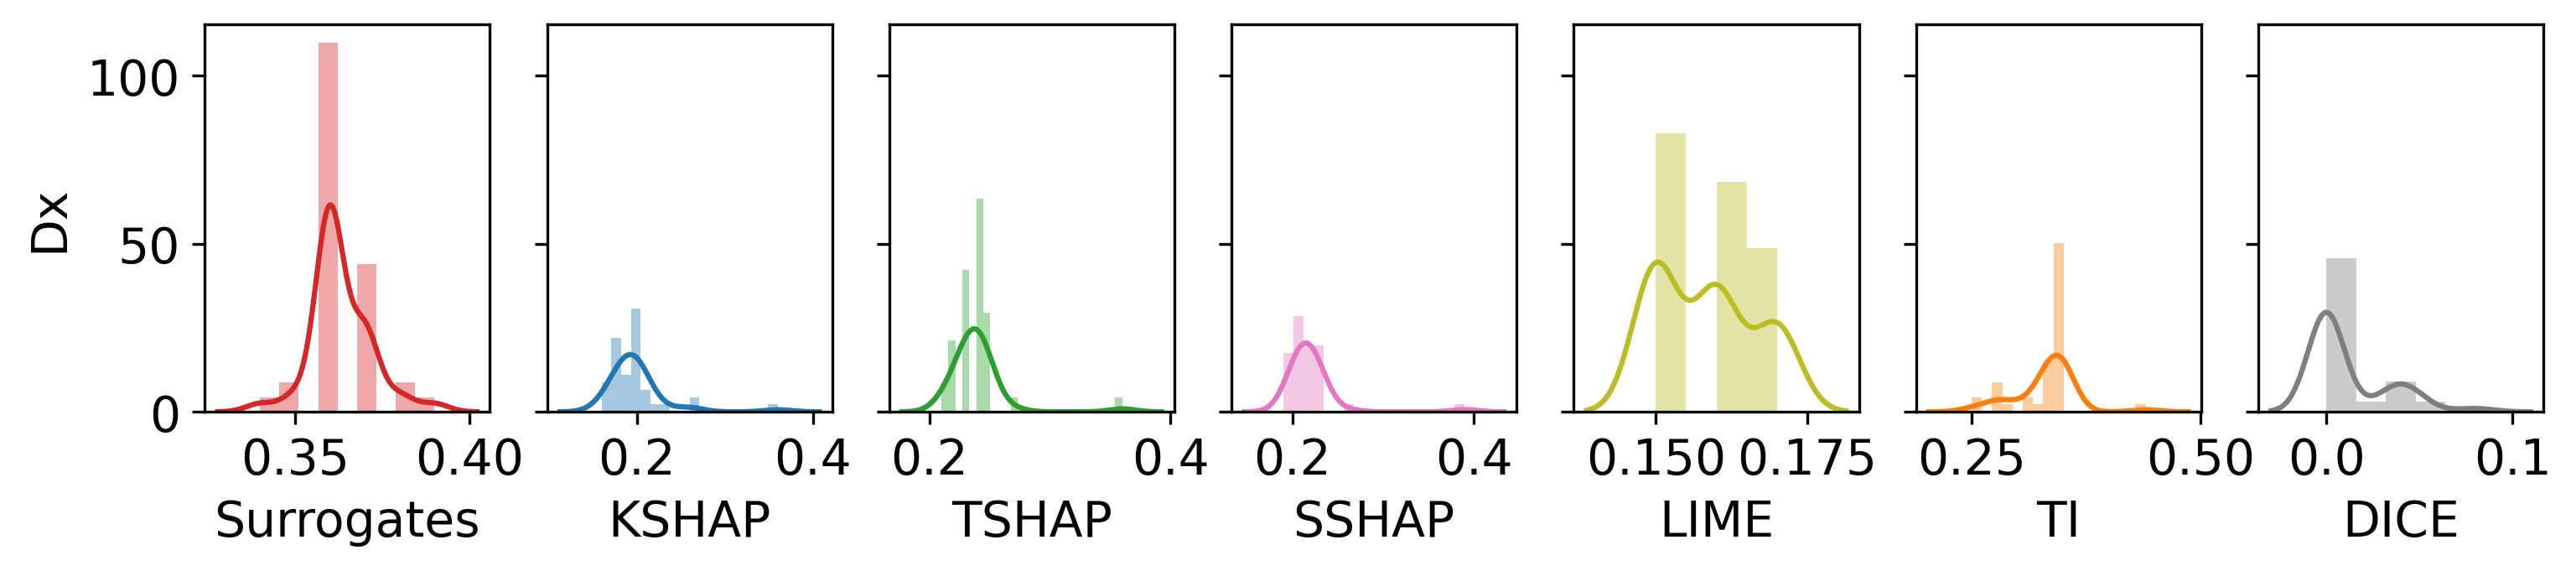

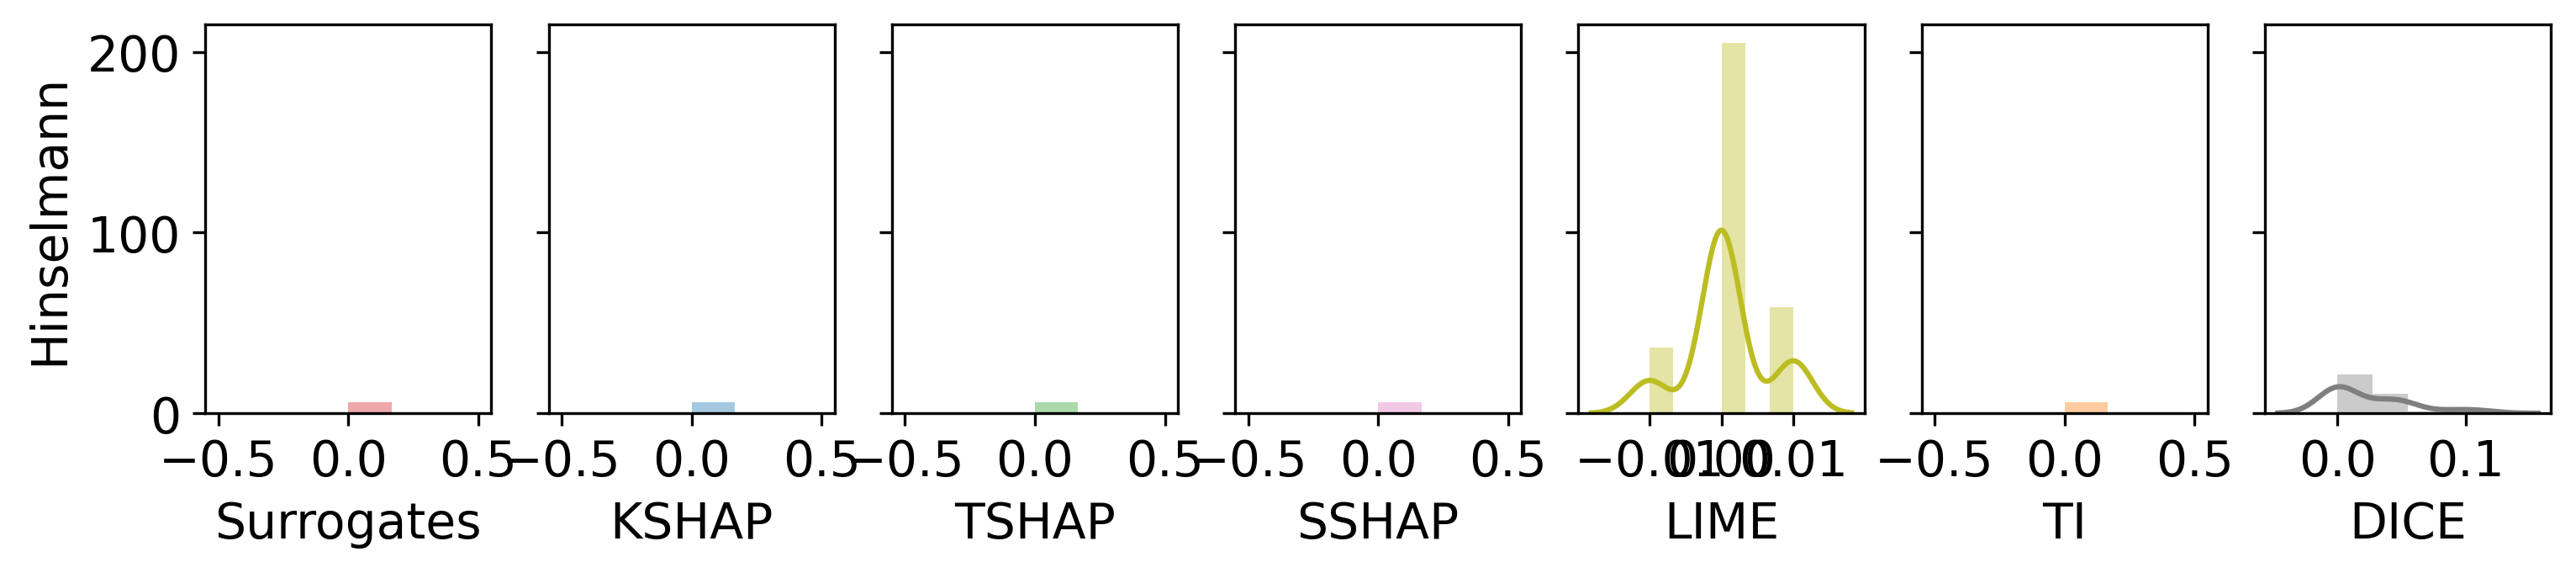

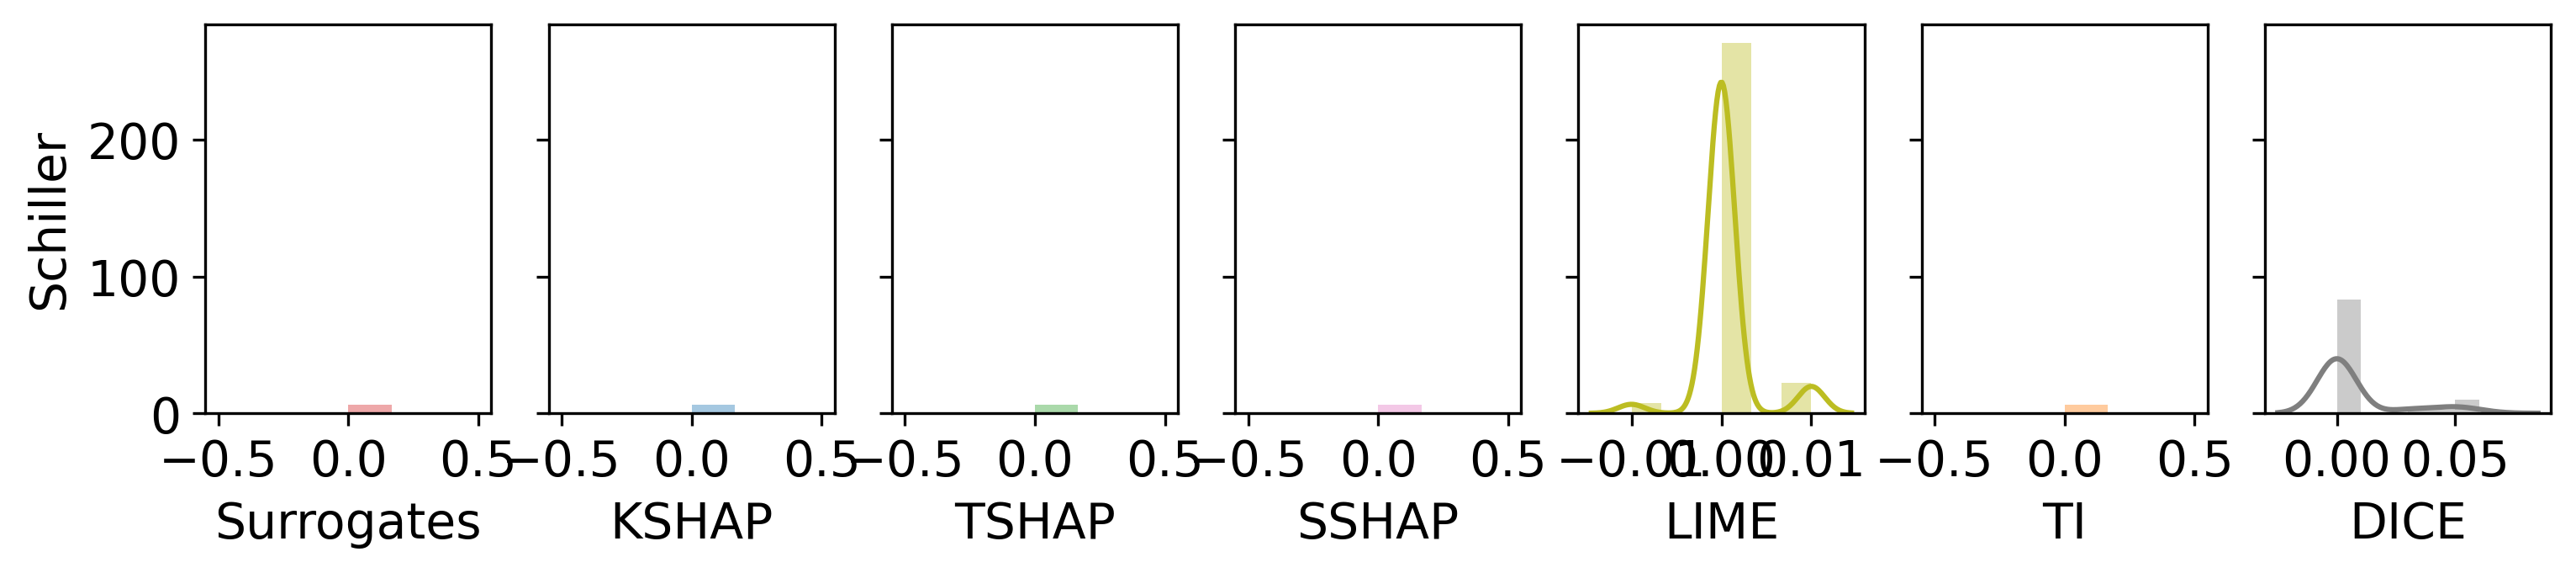

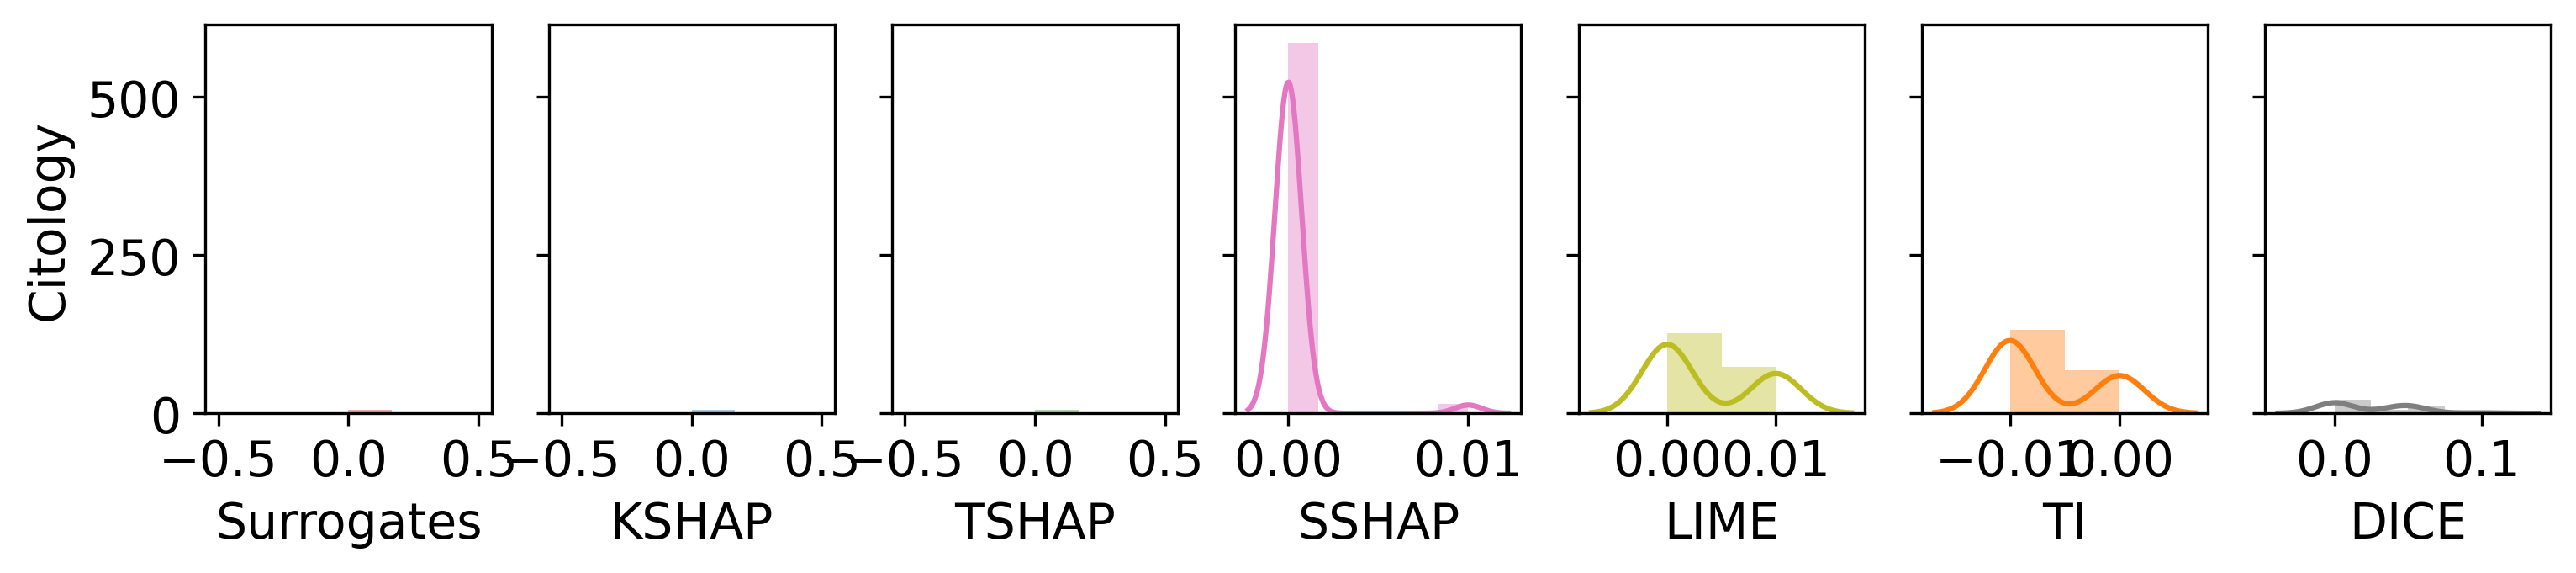

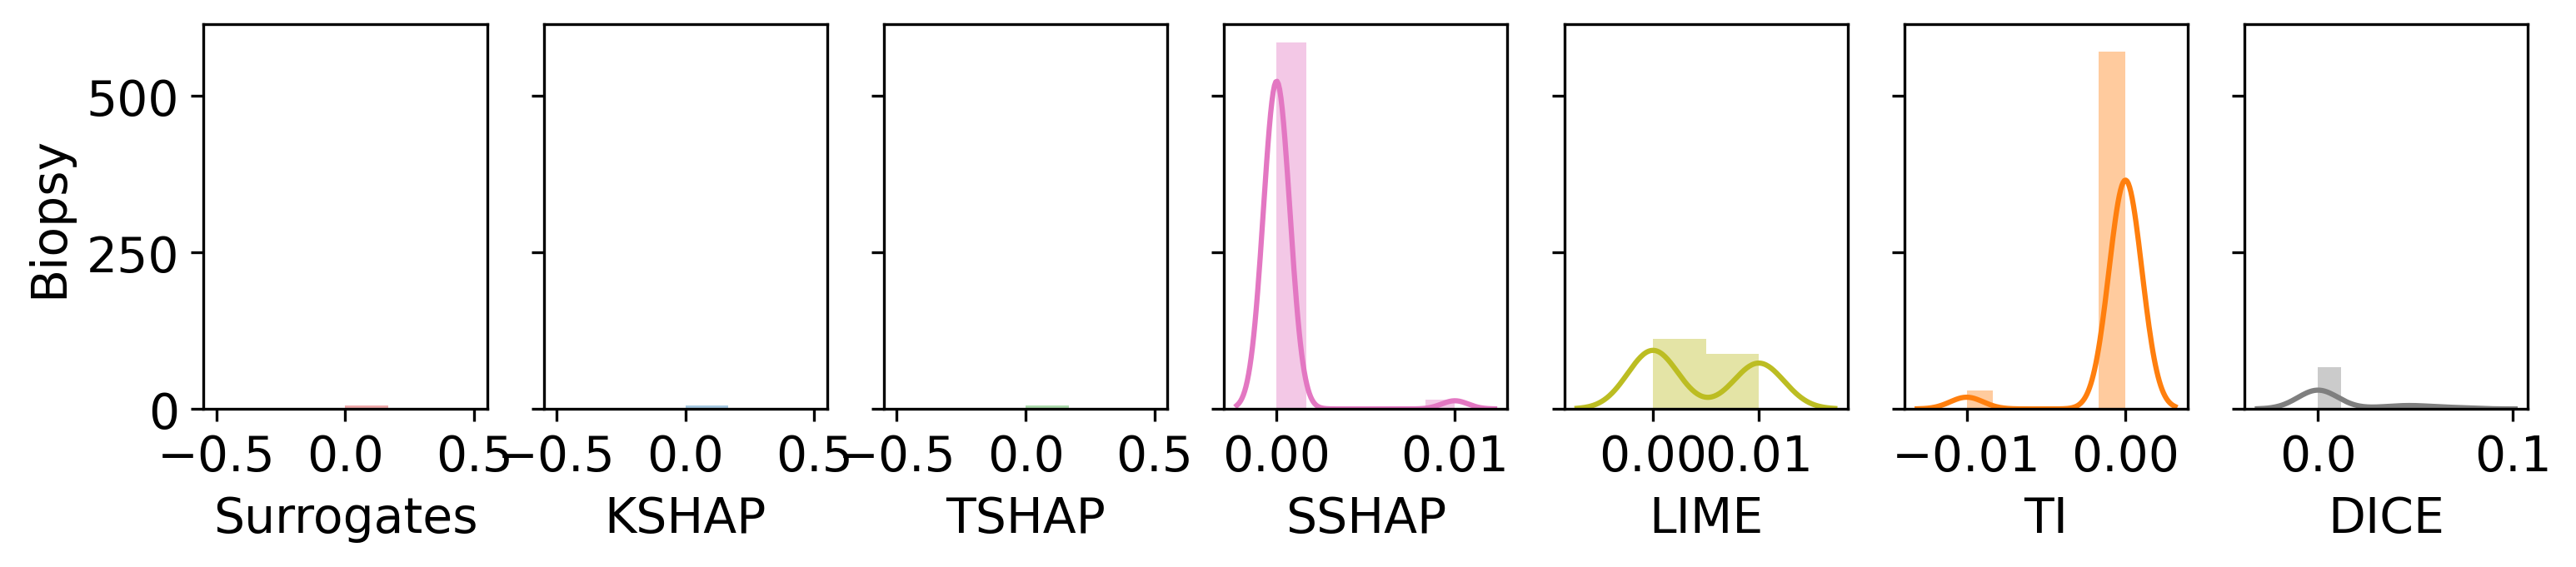

In [181]:
# colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive',  'tab:orange',  'tab:gray']

# for j in range(len(features)):
#   fig, axes = plt.subplots(1, 7, figsize=(12, 2), sharey=True, dpi=100)
#   t=0

#   for fg, fs in enumerate(frames):
#     am=[]

#     for i in range(len(fs['norm_shap'])):
#       am.append(round(fs['norm_shap'][i][j], 2)) # i INSCTANCE j Feature
#     sns.distplot(am, ax=axes[fg], color=colors[t], axlabel=methods[t])
#     t=t+1
#     axes[fg].set_ylabel(features[j])
#   # plt.savefig(root+'/'+str(var)+str(instance)+str(features[j])[:10]+'.png', bbox_inches='tight', dpi=300)
#   plt.show()
for j in range(len(features)):
  im = Image.open(root+'/'+str(var)+str(instance)+str(features[j])[:10].replace(':','_')+'.png')
  display(im)

### Multiple Instances

In [182]:
features=X_test.columns

In [183]:
# #compute_features_compacity(case="classification", contributions=weight, selection=list(range(0, len(x_test))), distance=0.9, nb_features=5)
# frames=[]
# for weight in weights:
#   fs= compute_features_stability (case="classification", x=X_test, selection=list(range(0, len(X_test))), contributions=weight)
#   #fs= compute_features_stability (case="classification", x=X_test, selection=[1,4], contributions=weight)
#   frames.append(fs)

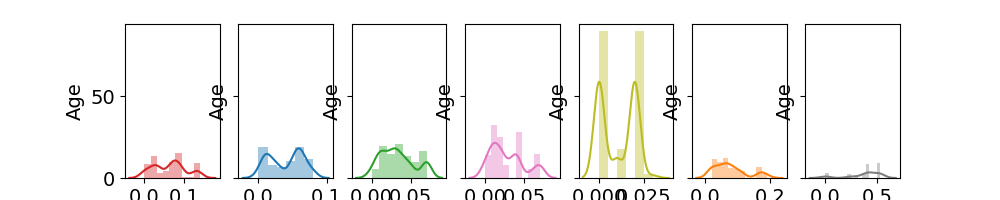

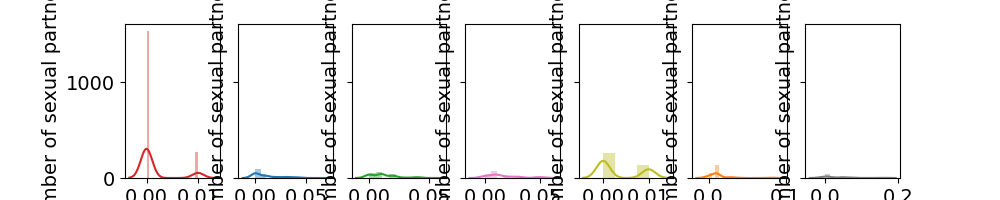

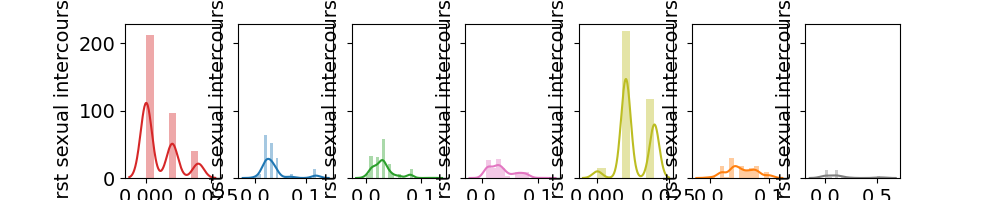

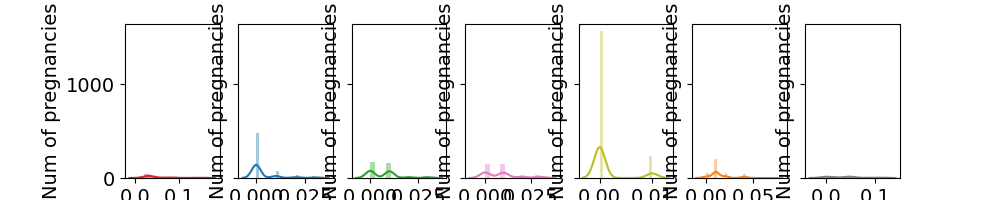

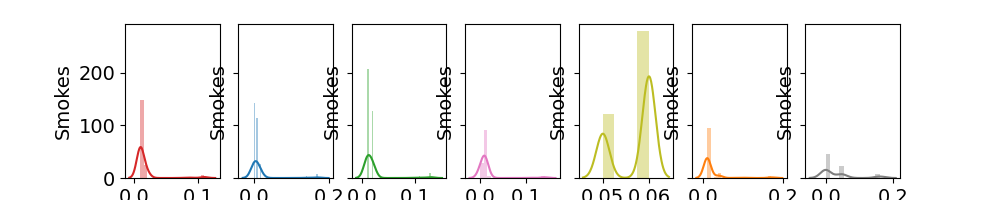

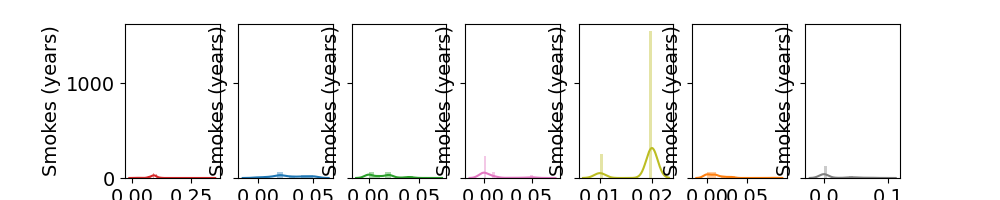

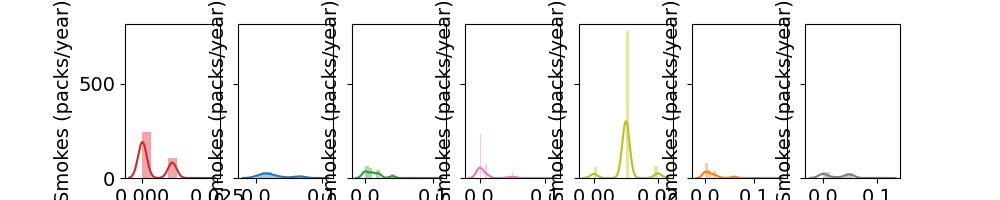

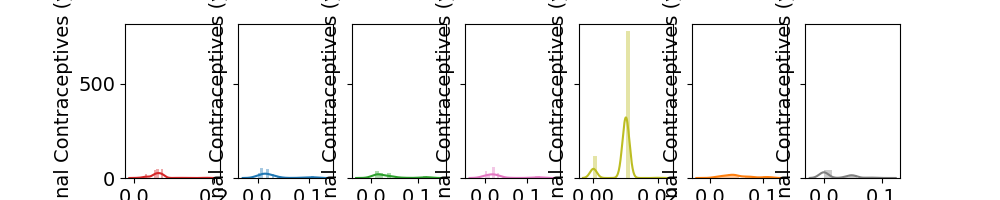

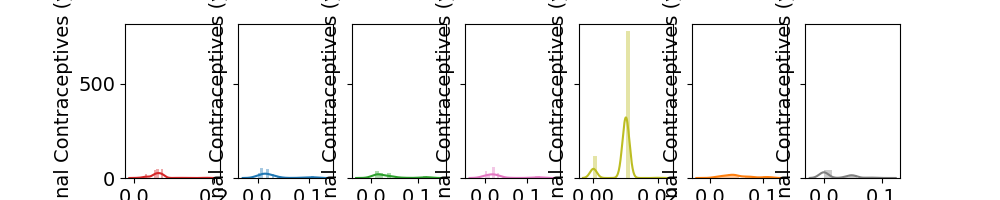

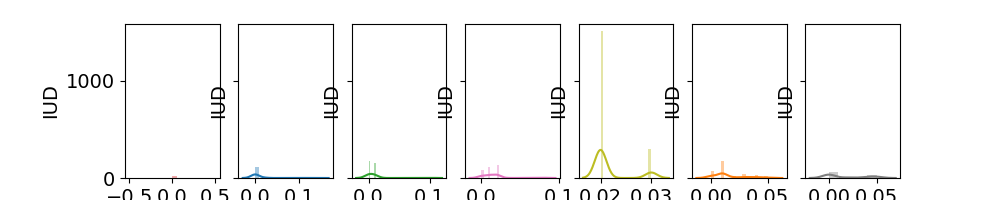

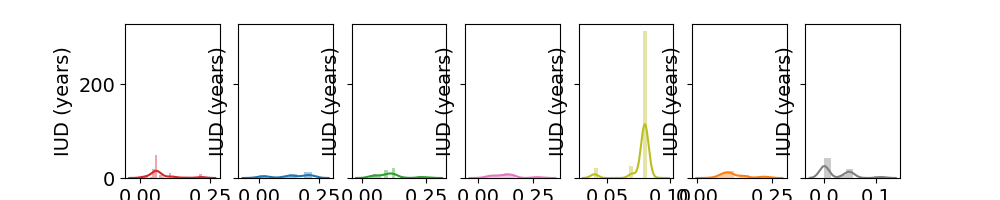

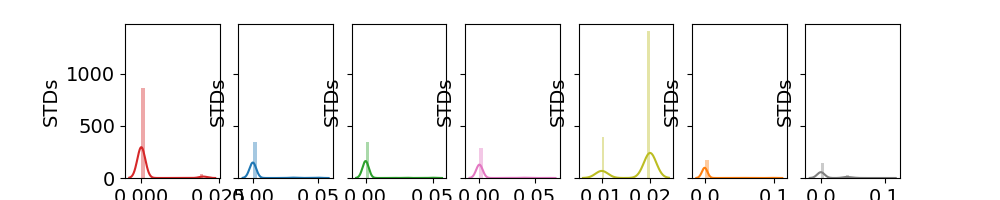

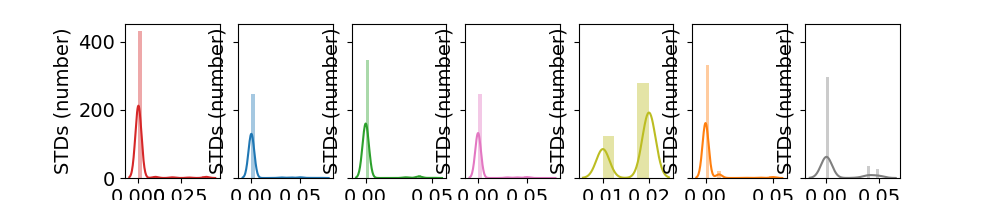

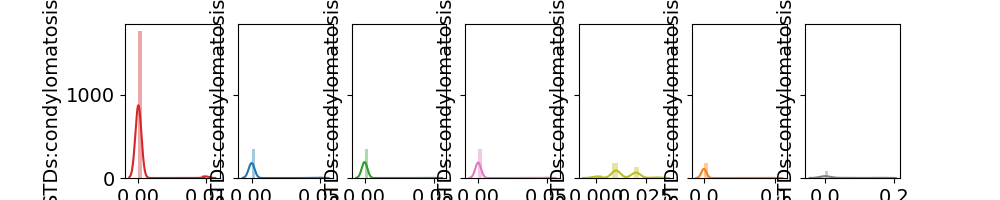

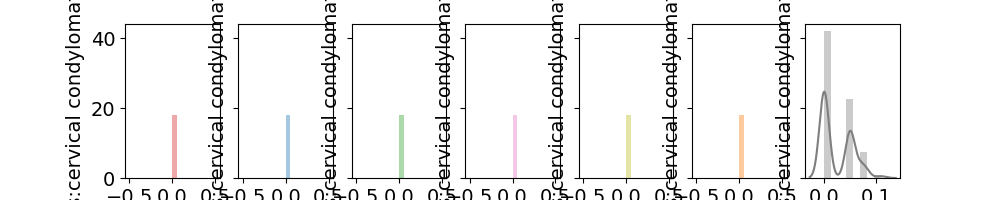

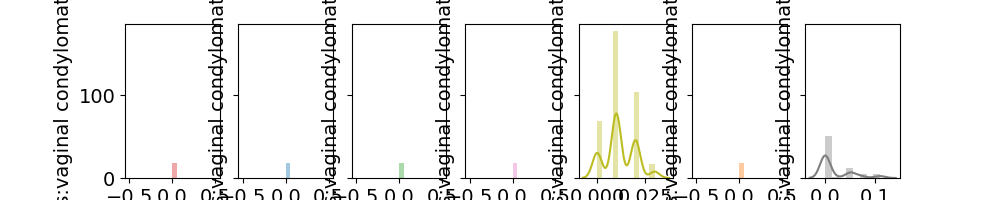

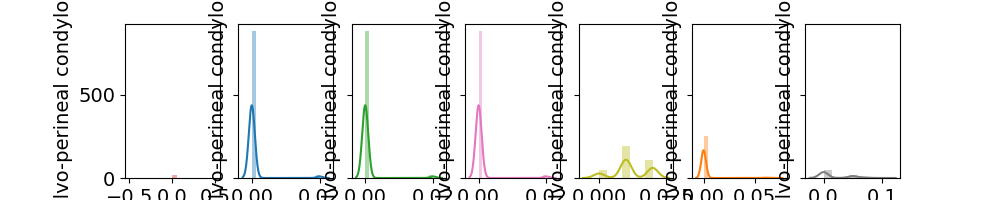

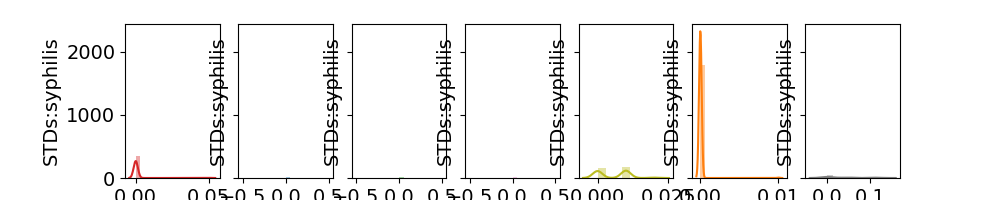

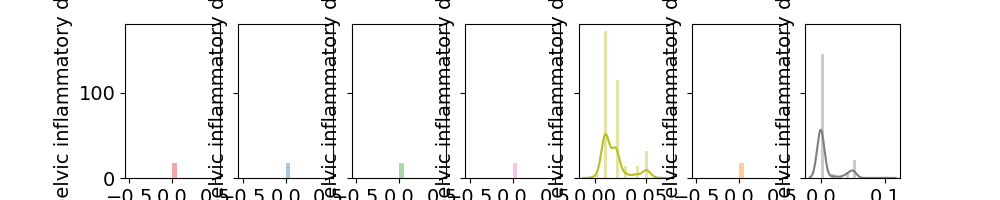

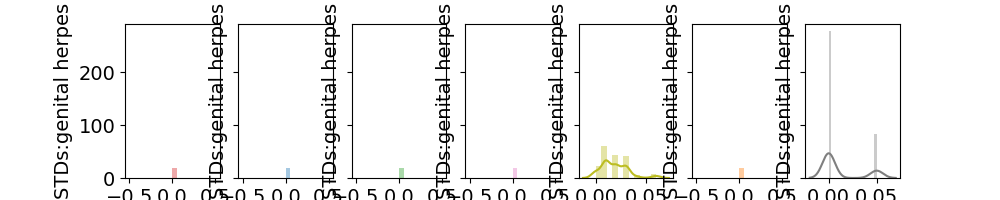

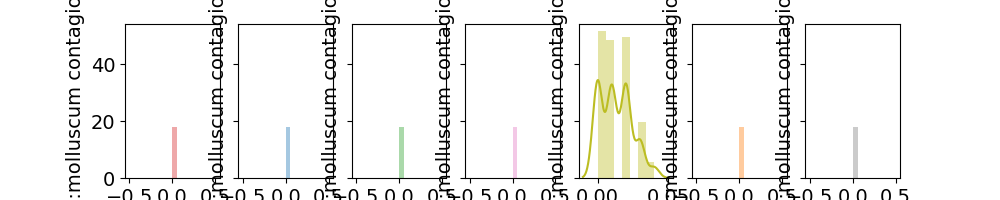

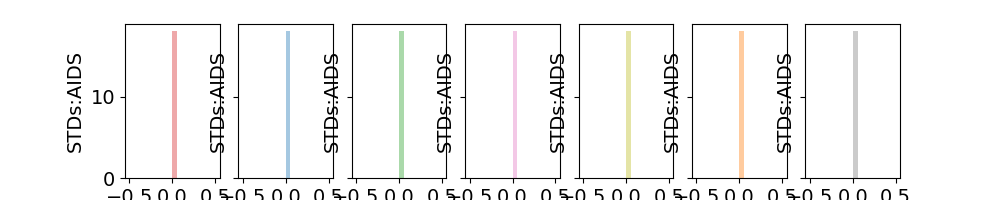

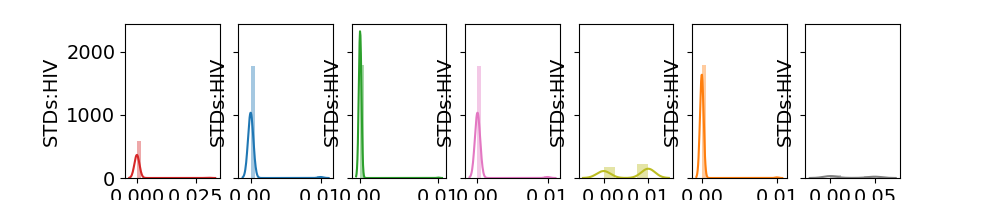

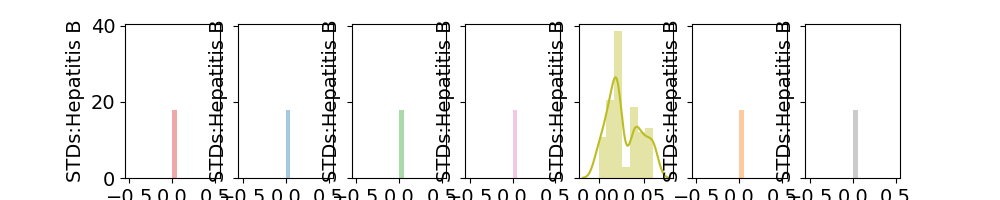

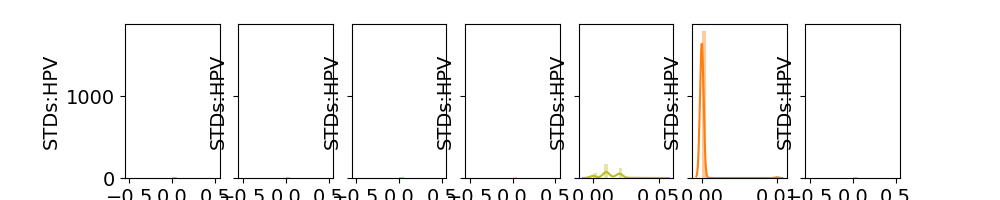

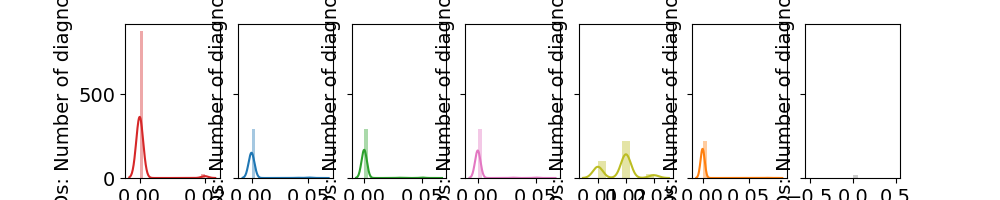

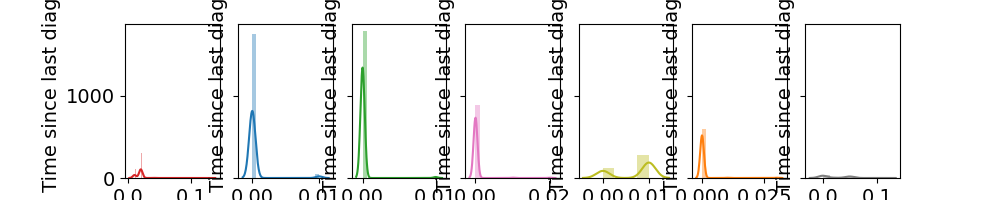

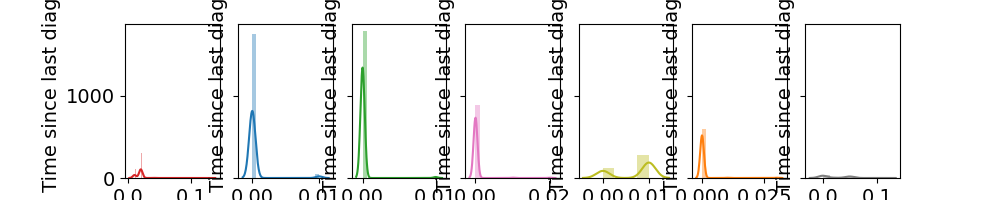

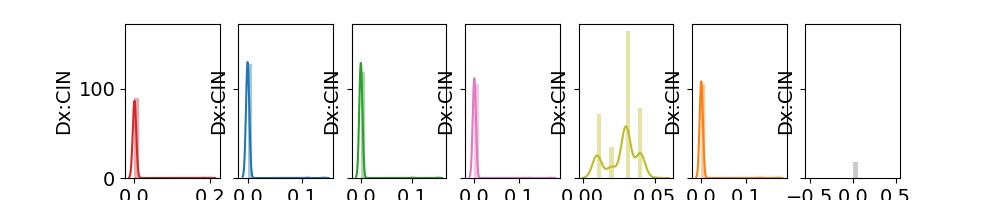

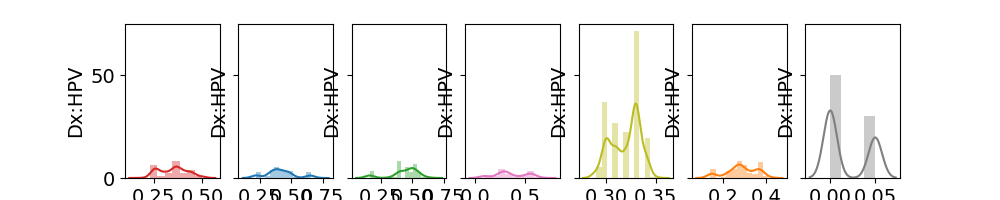

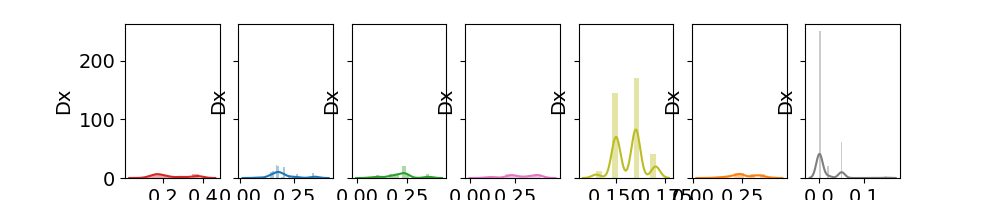

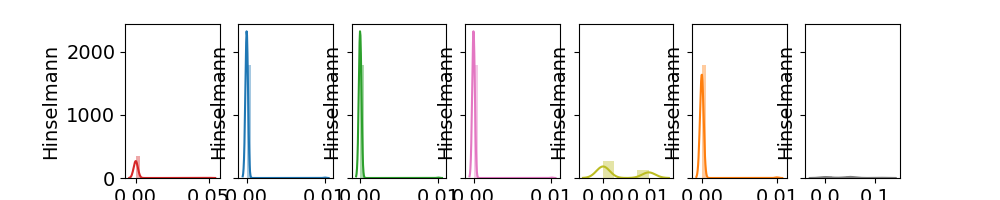

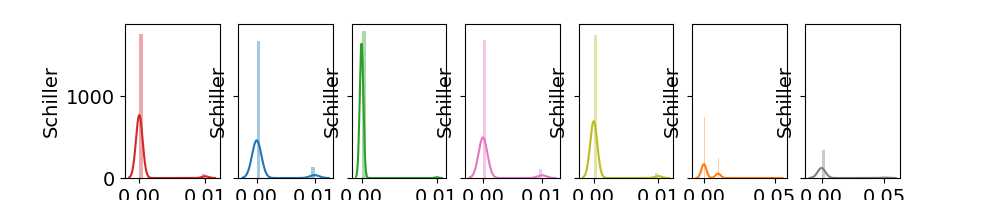

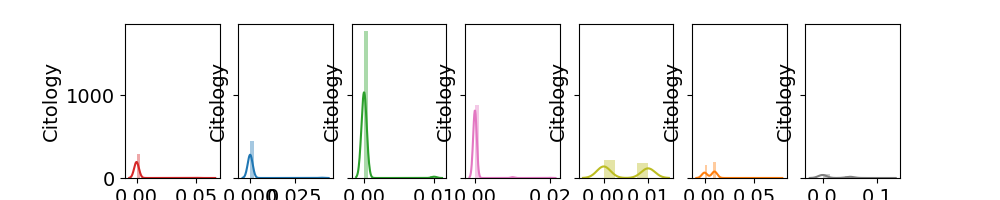

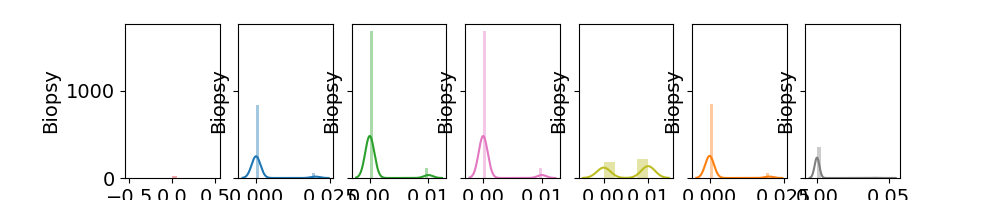

In [184]:
# colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive',  'tab:orange',  'tab:gray']

# for j in range(len(features)):
#   fig, axes = plt.subplots(1, 7, figsize=(10, 2), sharey=True, dpi=100)
#   t=0
#   for fg, fs in enumerate(frames):
#     vr=[]
#     am=[]
#     for i in range(len(fs['variability'])):
#       vr.append(round(fs['variability'][i][j], 2)) # i INSCTANCE j Feature
#       am.append(round(fs['amplitude'][i][j], 2))
#     axes[fg].set_ylabel(features[j])
#     sns.distplot(am, ax=axes[fg], color=colors[t], axlabel=methods[t])
#     t=t+1
#     #print('VR', vr)

#   # plt.savefig(root+'/'+str(var)+str(features[j])[:10]+'.png')
#   plt.show()
for j in range(len(features)):
  im = Image.open(root+'/'+str(var)+str(features[j])[:10].replace(':','_')+'.png')
  display(im)

In [185]:
# t=0
# for fg, fs in enumerate(frames):
#   vr=[]
#   am=[]
#   for j in range(len(features)):
#     vr.append(np.mean(fs['variability'][j])) # i INSCTANCE j Feature
#     am.append(np.std(fs['variability'][j]))
#   print(methods[t], round(np.mean(vr),2))
#   print(methods[t], round(np.std(am),2))
#   t+=1

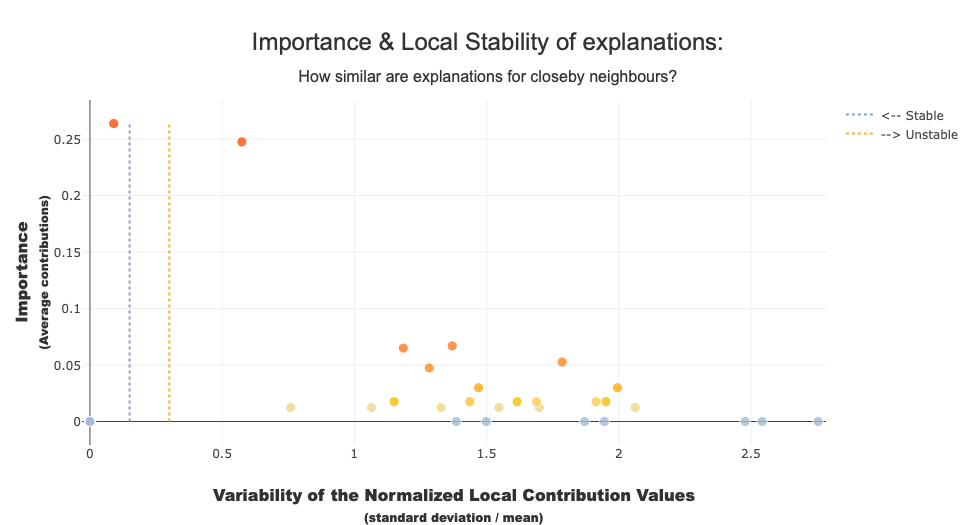

In [186]:
# xpl.plot.stability_plot(selection=[0, 1, 3])
im = Image.open(root+'/stabplot2.png')
im

In [187]:
# fig_image=xpl.plot.stability_plot()
#plt.xlabel("Local Surrogates")
# plt.savefig(root + '/stabplot.png')


In [188]:
# for w in weights:
#   xpl = SmartExplainer(model=model)
#   w = w[X_test.columns]
#   xpl.compile(x=X_test,contributions=w)
#   xpl.plot.stability_plot()

## Feature and Rank Disagreement

In [189]:
# from scipy.stats import spearmanr
# import numpy as np
# import itertools

# def intersection(r1, r2):
#     return list(set(r1) & set(r2))

# def check_size(r1, r2):
#     assert len(r1) == len(r2), 'Both rankings should be the same size'

# def feature_agreement(r1, r2):
#     """
#     Measures the fraction of common features between the
#     sets of top-k features of the two rankings.

#     From Krishna et al. (2022), The Disagreement Problem in
#     Explainable Machine Learning: A Practitioner’s Perspective

#     Parameters
#     ---------------
#     r1, r2 : list
#         Two feature rankings of identical shape
#     """
#     check_size(r1, r2)
#     k = len(r1)

#     return len(intersection(r1, r2)) / k

# def rank_agreement(r1, r2):
#     """
#     Stricter than feature agreement, rank agreement checks
#     that the feature order is comparable between the two rankings.

#     From Krishna et al. (2022), The Disagreement Problem in
#     Explainable Machine Learning: A Practitioner’s Perspective

#     Parameters
#     ---------------
#     r1, r2 : list
#         Two feature rankings of identical shape
#     """
#     check_size(r1, r2)
#     k = len(r1)

#     return np.sum([True if x==y else False for x,y in zip(r1,r2)]) / k

# def weak_rank_agreement(r1, r2):
#     """
#     Check if the rank is approximately close (within one rank).
#     """
#     check_size(r1, r2)
#     k = len(r1)
#     window_size=1

#     rank_agree=[]
#     for i, v in enumerate(r1):
#         if i == 0:
#             if v in r2[i:i+window_size+1]:
#                 rank_agree.append(True)
#             else:
#                 rank_agree.append(False)
#         else:
#             if v in r2[i-window_size:i+window_size+1]:
#                 rank_agree.append(True)
#             else:
#                 rank_agree.append(False)

#     return np.sum(rank_agree)/k


# def rank_correlation(r1, r2):
#     return spearmanr(r1, r2)


# def to_rankings(df, instance):
#     """
#     Convert feature attributions to a list of top features.
#     """
#     contrib_features = df.columns


#     vals = df[contrib_features].values[instance,:]
#     rankings = np.argsort(np.absolute(vals))[::-1]
#     features = vals[rankings]


#     return rankings


# def compute_matrices(weights, instance):
#     n_rankings = len(methods)

#     feature_agree = np.zeros((n_rankings, n_rankings))
#     rank_agree = np.zeros((n_rankings, n_rankings))
#     corr = np.zeros((n_rankings, n_rankings))


#     for i, j in itertools.product(range(n_rankings), range(n_rankings)):
#         r1 = to_rankings(weights[i], instance)[:10]
#         r2 = to_rankings(weights[j], instance)[:10]
#         feature_agree[i,j] = feature_agreement(r1, r2)
#         rank_agree[i,j] = rank_agreement(r1, r2)

#     return feature_agree, rank_agree

In [190]:
# feature_agree, rank_agree = compute_matrices(weights, instance)

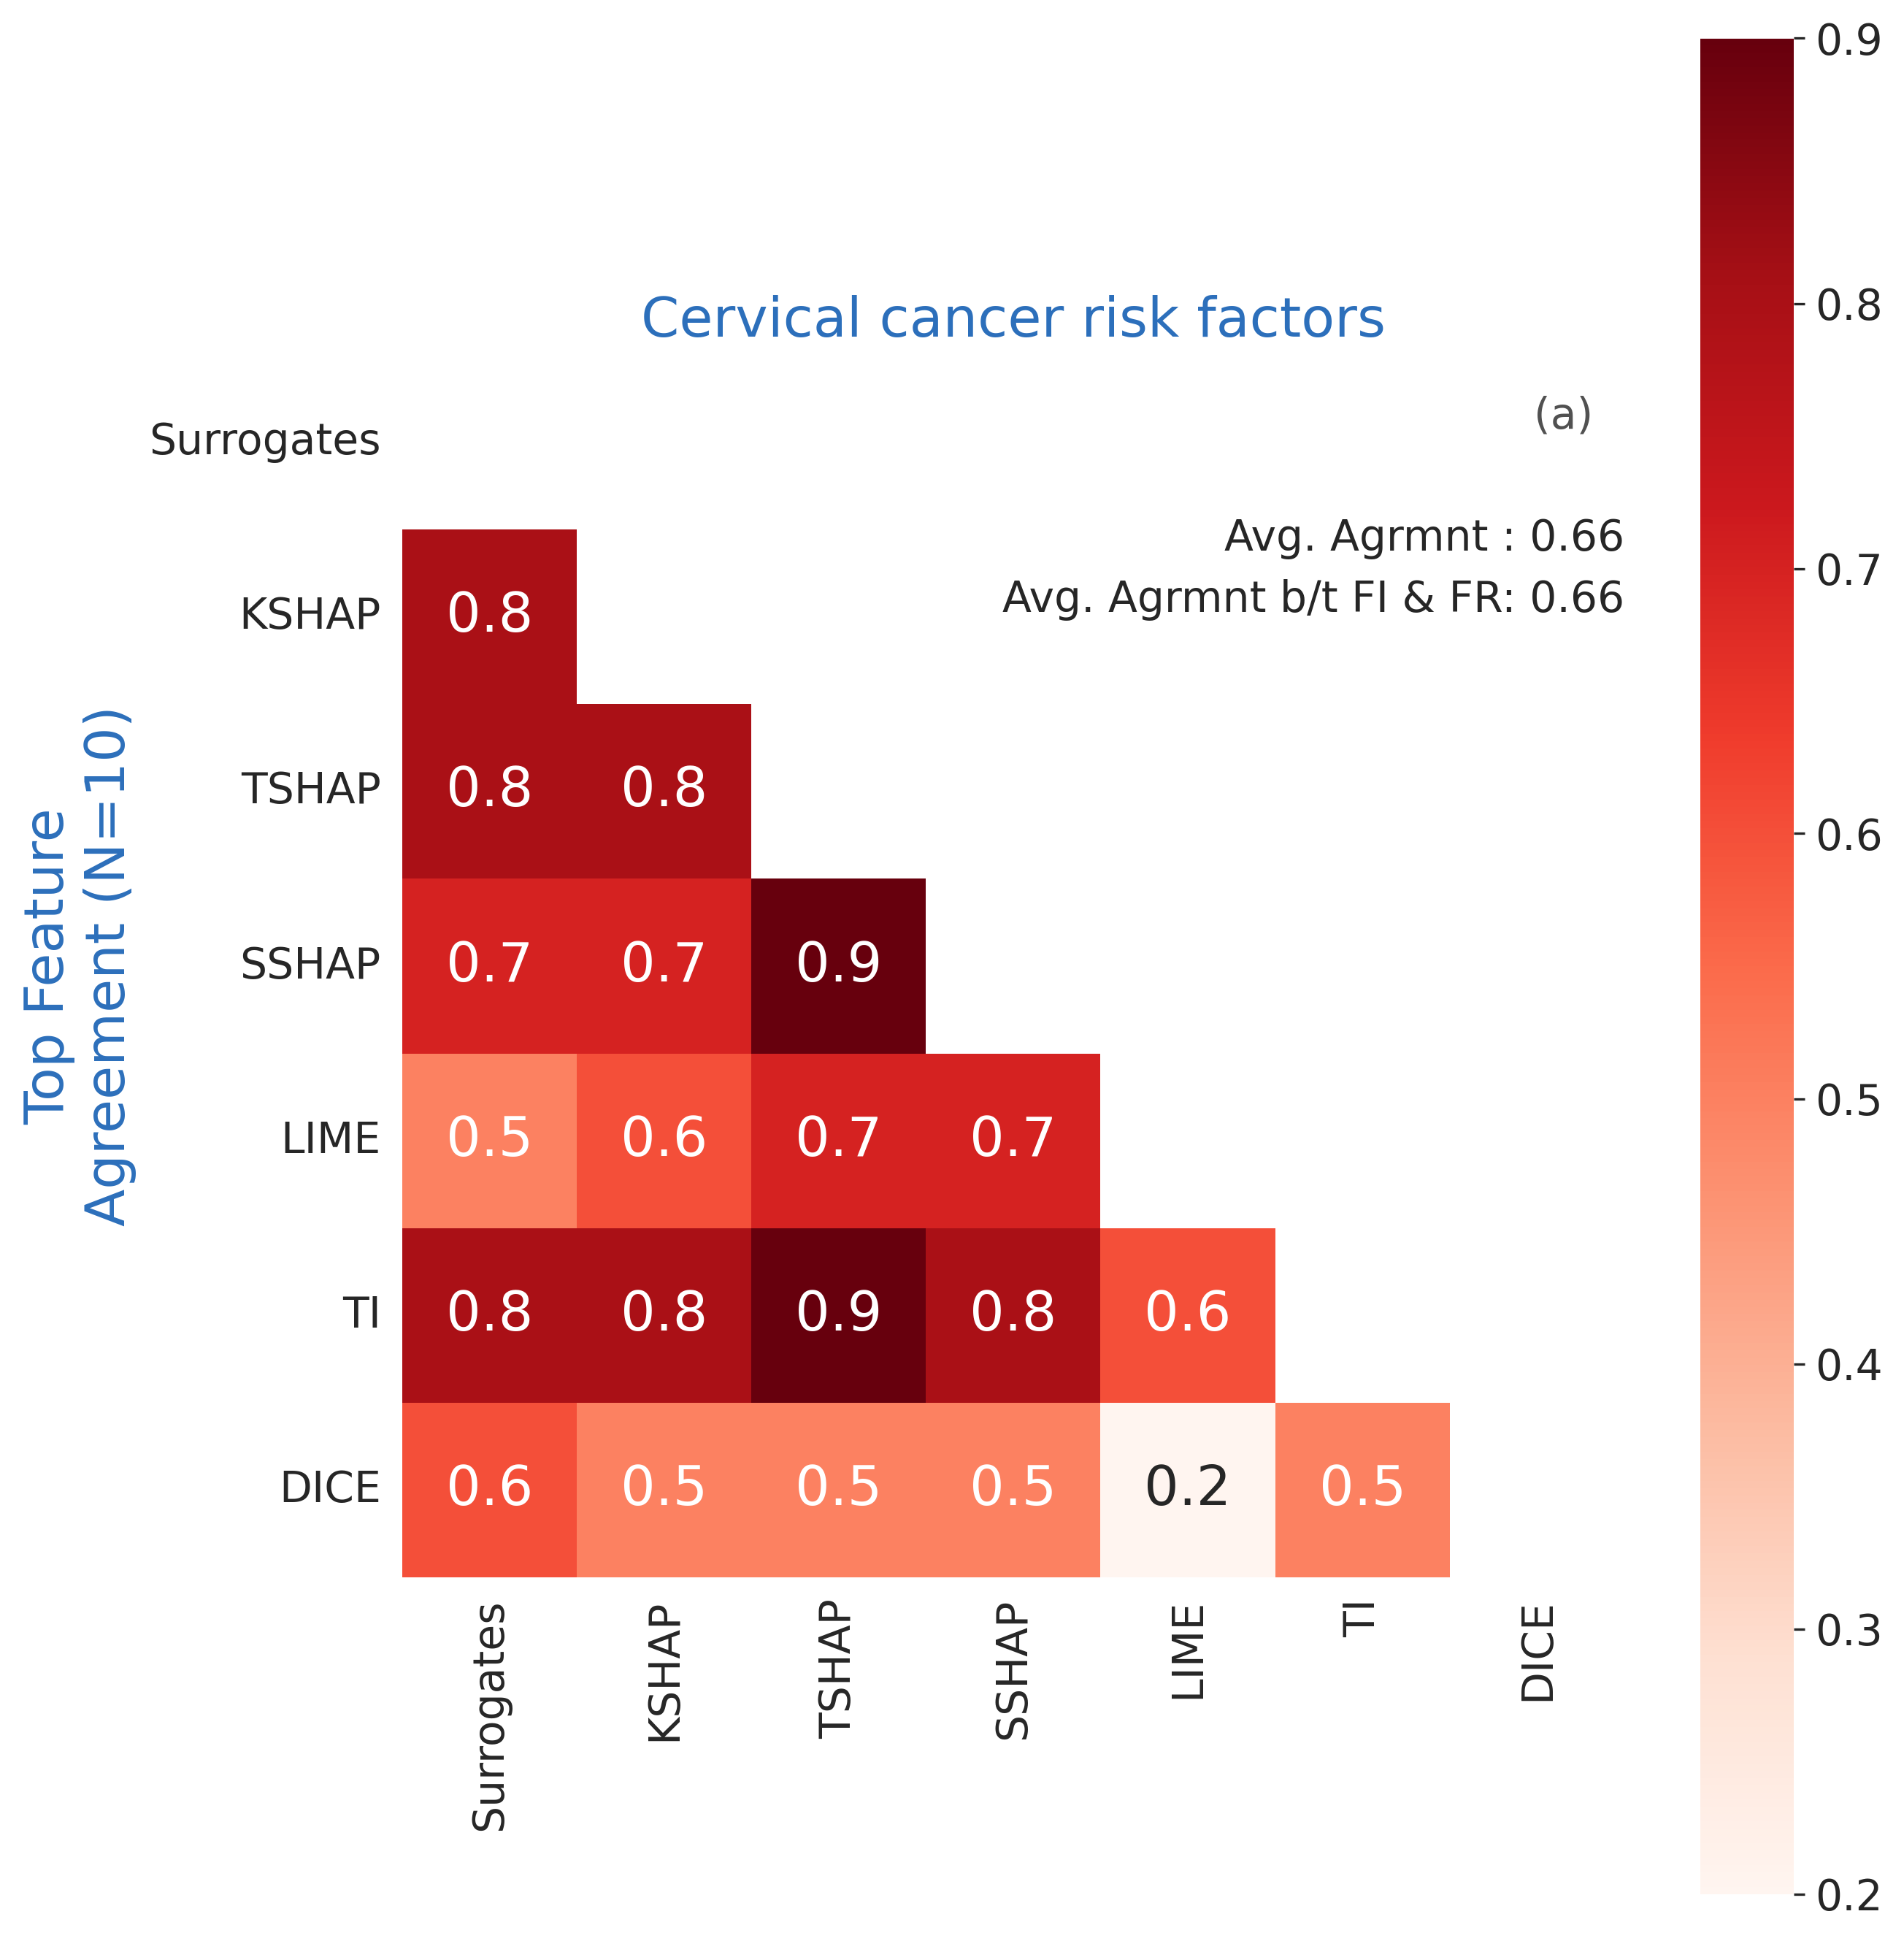

In [191]:
# corr = feature_agree
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# fig = plt.figure(figsize=(9, 11))
# with sns.axes_style("white"):

#     ax = sns.heatmap(corr, mask=mask, square=True,annot=True, annot_kws={'fontsize': 18},
#                 xticklabels=methods, yticklabels=methods, cmap="Reds", cbar=True)
#     ax.set_title("Cervical cancer risk factors", color='xkcd:medium blue', fontsize=18)
#     ax.set_ylabel('Top Feature\nAgreement (N=10)', color='xkcd:medium blue', fontsize=18)
#     ax.text(0.95,
#                 0.95,
#                 f"(a)",
#                 fontsize=14,
#                 alpha=0.8,
#                 ha="center",
#                 va="center",
#                 transform=ax.transAxes,
#             )
#     data=corr
#     avg = np.mean(data[mask==0])
#     text = f'Avg. Agrmnt : {avg:.2f}'
#     ax.annotate(text, (1.0, 0.84), xycoords='axes fraction', fontsize=14, ha='right')

#     avg = np.mean(data[4:, :4])
#     text = f'Avg. Agrmnt b/t FI & FR: {avg:.2f}'
#     ax.annotate(text, (1.0, 0.79), xycoords='axes fraction', fontsize=14, ha='right')




#     plt.show()
im = Image.open(root+'/featagrem'+str(instance)+'.png')
im

In [192]:
# fig.savefig(root + '/featagrem'+str(instance)+'.png', bbox_inches='tight', dpi=300)

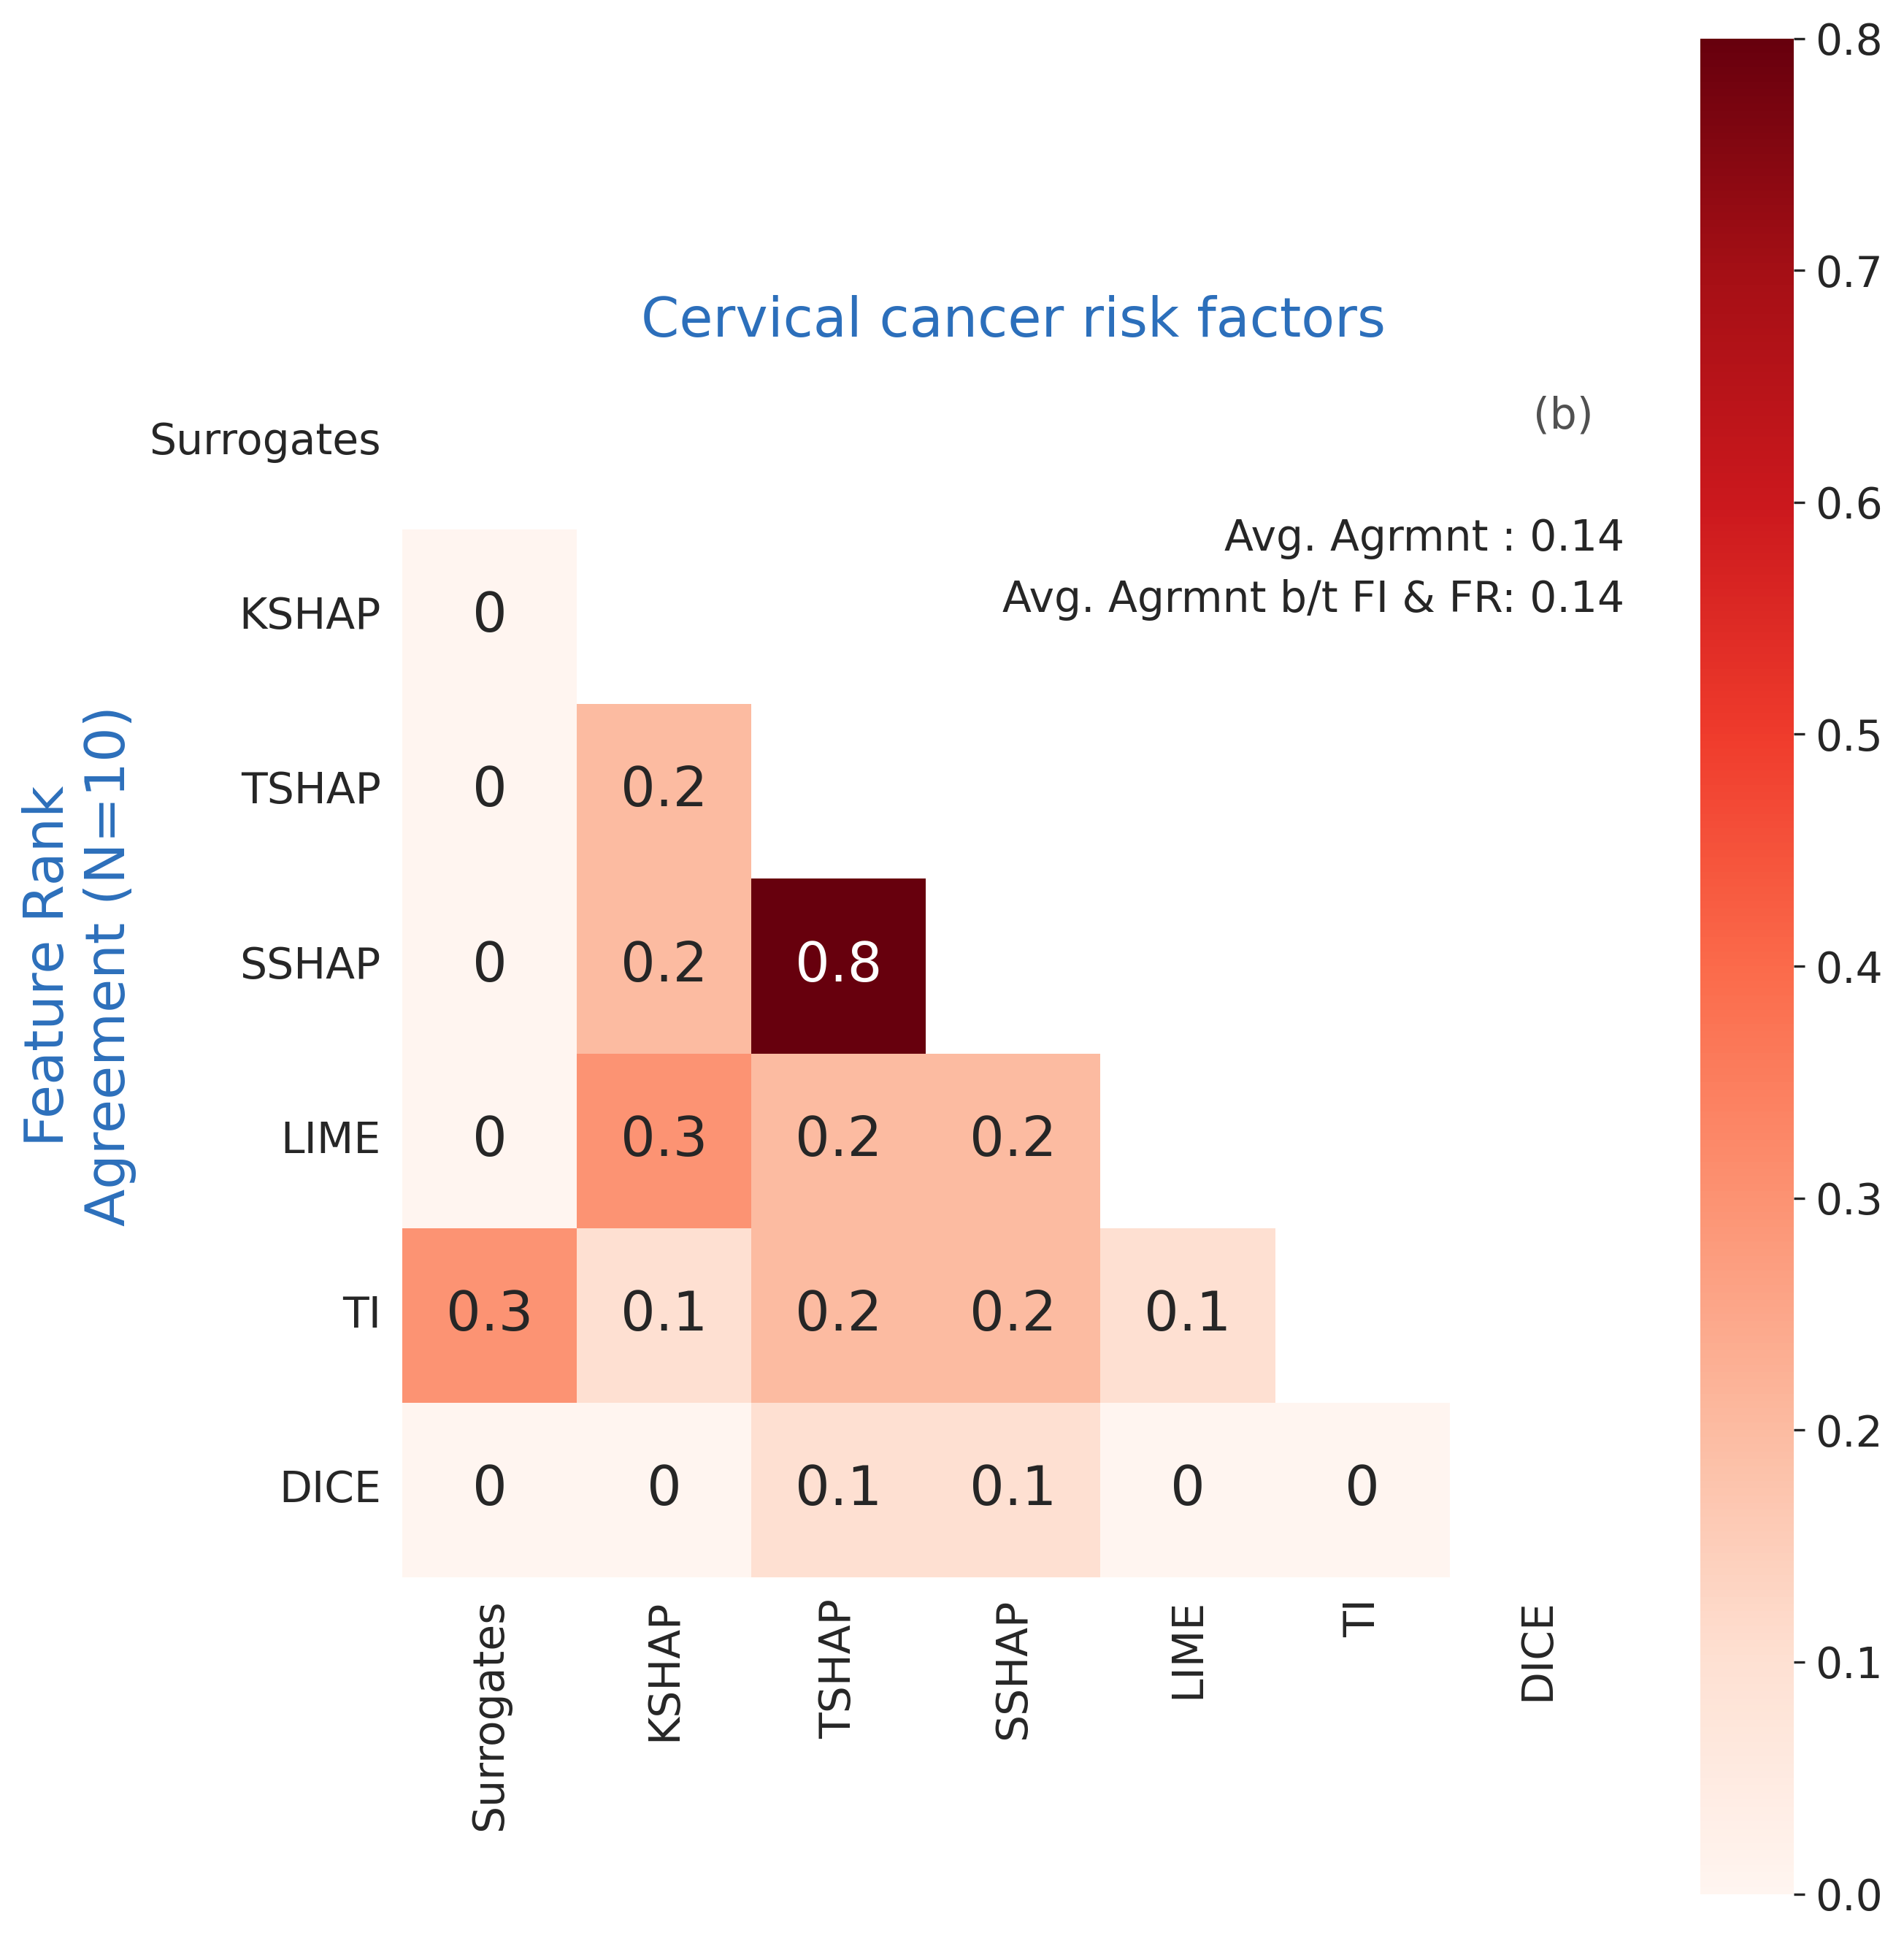

In [193]:
# corr = rank_agree
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# fig = plt.figure(figsize=(9, 11))
# with sns.axes_style("white"):

#     ax = sns.heatmap(corr, mask=mask, square=True,annot=True, annot_kws={'fontsize': 18},
#                 xticklabels=methods, yticklabels=methods, cmap="Reds")
#     ax.set_title("Cervical cancer risk factors", color='xkcd:medium blue', fontsize=18)
#     ax.set_ylabel('Feature Rank\nAgreement (N=10)', color='xkcd:medium blue',fontsize=18 )

#     ax.text(0.95,
#                 0.95,
#                 f"(b)",
#                 fontsize=14,
#                 alpha=0.8,
#                 ha="center",
#                 va="center",
#                 transform=ax.transAxes,
#             )
#     data=corr
#     avg = np.mean(data[mask==0])
#     text = f'Avg. Agrmnt : {avg:.2f}'
#     ax.annotate(text, (1.0, 0.84), xycoords='axes fraction', fontsize=14, ha='right')

#     avg = np.mean(data[4:, :4])
#     text = f'Avg. Agrmnt b/t FI & FR: {avg:.2f}'
#     ax.annotate(text, (1.0, 0.79), xycoords='axes fraction', fontsize=14, ha='right')



#     plt.show()
im = Image.open(root+'/rankagrem'+str(instance)+'.png')
im

In [194]:
# fig.savefig(root + '/rankagrem'+str(instance)+'.png', bbox_inches='tight', dpi=300)

# Discussion & Results






###Results

In our reproduction of the hypothesis that the Random Forest Classifier is the best model with the highest ROC, we were able to reproduct the results almost exaclty (as seen in section Model Execution - Balanced Evalutation). The results varied at bit from the original results (reasonings as to why in the discussion section below), but the Random Forest Classifier model was tied for the second best AUC score, just behind the Logistic Regression. We determined would be most RandomForestClassifier would still be the most reliable model to continue the reproduction with because of its high accuracy as well it's compatibility with later models used in the explainability study (some of which are only compatibile with tree models). We figured that logistic Regression was overfitting, but honestly it appears that way from all of the models.


In our ablation using an unbalanced dataset, we produced vary similar results to the original study. We found that the all of the models resulted in the same AUC score (1.0), except for the KNNClassifier. Using these results, we could determine that the RandomForestClassifier is a strong model to continue testing with (as seen in section "Model Execution"), agreeing with the original paper's determination.



Secondly, in our testing of the  hypothesis of LIME being the most faithful explanation, we did find that this was the correct result as the LIME had the highest accuracy with the removal of features, while the other interpretability methods decreased in accuracy with the remove of features (as seen in section Checkpoint ROAR). In our ROAR testing, there was a larger dip in accuracy at 70% removed features, showing marginally less robustness that the original claim. but still verifying that LIME is the most faithful model. LIME helps use other variable to explain a cancer diagnosis.

Overall, we were able to reproduce and verify the claims made by the orgiinal paper, even with the inclusion of our ablations. With more time, we would like to run the tests on that entire dataset, in order to verify the claims.






In [195]:
unbalanced_summary_df

Classifier Name  Accuracy Score  Precision Score  \
0       UnbalancedLogisticRegression        1.000000         1.000000   
1   UnbalancedRandomForestClassifier        1.000000         1.000000   
2     UnbalancedKNeighborsClassifier        0.994186         0.988406   
3  UnbalancedSupportVectorClassifier        1.000000         1.000000   
4            UnbalancedMLPClassifier        1.000000         1.000000   

   Recall Score  F1 Score  AUROC  
0      1.000000  1.000000    1.0  
1      1.000000  1.000000    1.0  
2      0.994186  0.991288    0.5  
3      1.000000  1.000000    1.0  
4      1.000000  1.000000    1.0

In [196]:
summary_df

Classifier Name  Accuracy Score  Precision Score  Recall Score  \
0       LogisticRegression        1.000000         1.000000      1.000000   
1   RandomForestClassifier        1.000000         1.000000      1.000000   
2     KNeighborsClassifier        0.961310         0.964200      0.961310   
3  SupportVectorClassifier        0.997024         0.997042      0.997024   
4            MLPClassifier        1.000000         1.000000      1.000000   

   F1 Score     AUROC  
0  1.000000  1.000000  
1  1.000000  1.000000  
2  0.961314  0.962857  
3  0.997024  0.997143  
4  1.000000  1.000000

### Discussion
**Reproducabilty and Results Deviations:**

We were able to acquire, process, and visualize the data, and run the 5 models and ablations against the data with common Python libraries and minimal confusion. The paper we chose has shown to be reproducible to an extent. We were able to replicate the experiments proposed in the paper as well as our ablations, but our results varied. One major reason for this was likely due to the sampling methods we introduced, as we reduced the size of our training data sets in order to be able to train our models in a suitable amount of time for this project.

We noticed that our dataset was not as diverse as we might have hoped, thus the need for the ADASYN ablation. The models overfit very well because of the nearly 1:1 correlation with a diagnosis of HPV and Cancer. The ROAR ablation does well to show what happens if we remove these obviously correlated features. It would be nice to run these models on a better dataset, as the ratings were negative on the UCI repository.

Other discepencies were likely because in the original author's Github model, they chose to continue their local explainability experiments with the Neural Network model, even though the Random Forest Classifier performed better. We corrected this in our reproduction. Additionally, we we were able to display the TI contribution, which was unsuccessful in the source code. We ran only a set of the results against a subset of the source data variations, as we believe this is suitable to compare.


During the reproduction, moving the data to adapt to our local enviroments in a shareable format was initially difficult, but ultimateley possible. Processsing data was also hard, as the data set needed reformatting to work correctly with some models.
Transferring the code and adding ablations was successful because of the heavily commented and organized code that could be split into many sections. Descriptions for the 4 types of train/test data sets would have been helpful in understanding the training function and levels. In addition, in order to make this paper more easy to reproduce, we would suggest adding checkpoints to the program as well as providing more documentation regarding data cleaning.


# References

[1] Ayad, W., Bonnier, T., Bosch, B., Read, J., & Parbhoo, S. (2023). Which Explanation Makes Sense? A Critical Evaluation of Local Explanations for Assessing Cervical Cancer Risk Factors. Ecole polytechnique, 1-50.

[2] Fernandes,Kelwin, Cardoso,Jaime, and Fernandes,Jessica. (2017). Cervical cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

[3] https://github.com/cwayad/Local-Explanations-for-Cervical-Cancer

